In [1]:
pip install pennylane


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

**The new set to begin with please**

# **Code 1: Basic QAOA Portfolio Optimization**

--- Starting Data Preparation and Cleaning from Excel File ---
Successfully loaded data from data_assets_dictionary.xlsx
Data shape: (2629, 278)

Data cleaning complete:
- Filled 0 NaNs in 'oas' with mean 78.8455
- Filled 0 NaNs in 'spreadDur' with mean 5.4127
- Dropped 11 rows with missing 'isin'
- Final cleaned data shape: (2618, 278)

Selected assets:
           isin         oas  spreadDur
0  US001055BJ00   57.400949   4.886435
1  US001084AS13  128.612337   7.279928
2  US00108WAM29   71.198350   5.296064
3  US00108WAP59   85.546591   6.219386
4  US00108WAR16  110.187192   6.768926


Expected Returns (mu vector):
US001055BJ00    0.574009
US001084AS13    1.286123
US00108WAM29    0.711983
US00108WAP59    0.855466
US00108WAR16    1.101872
Name: oas, dtype: float64


Factor Model Covariance Matrix:
              US001055BJ00  US001084AS13  US00108WAM29  US00108WAP59  \
US001055BJ00      0.120386      0.177864      0.129394      0.151953   
US001084AS13      0.177864      0.265987      0.

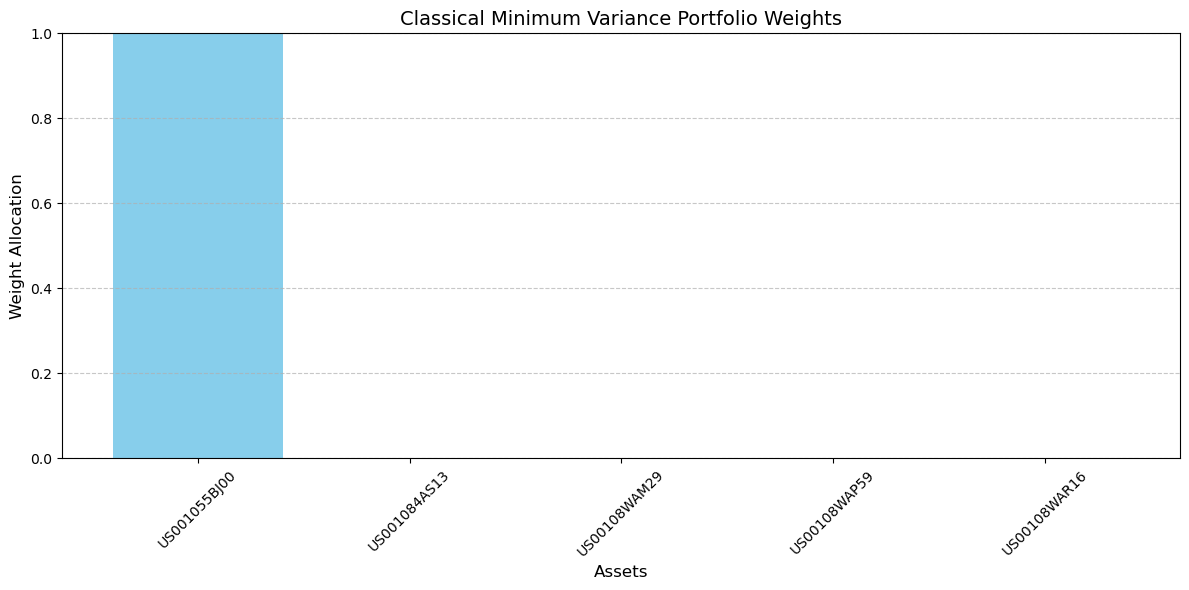

--- Starting Quantum Portfolio Optimization with QAOA ---
QUBO Matrix:
              US001055BJ00  US001084AS13  US00108WAM29  US00108WAP59  \
US001055BJ00    -30.166618     20.177864     20.129394     20.151953   
US001084AS13      0.177864    -30.377075     20.192775     20.226383   
US00108WAM29      0.129394      0.192775    -30.214750     20.164691   
US00108WAP59      0.151953      0.226383      0.164691    -30.233329   
US00108WAR16      0.165380      0.246386      0.179243      0.210493   

              US00108WAR16  
US001055BJ00     20.165380  
US001084AS13     20.246386  
US00108WAM29     20.179243  
US00108WAP59     20.210493  
US00108WAR16    -30.320844  

QAOA Run 1/5
  Step 1: Cost = -15.8917


C:\ProgramData\anaconda3\Lib\site-packages\pennylane\ops\op_math\composite.py:211: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in staticmethod() if you want to preserve the old behavior
  return self._math_op(math.vstack(eigvals), axis=0)


  Step 21: Cost = -27.4923
  Step 41: Cost = -37.7007
  Step 61: Cost = -38.4360
  Step 81: Cost = -38.5998
  New best cost: -38.6133

QAOA Run 2/5
  Step 1: Cost = 3.2359
  Step 21: Cost = -23.9443
  Step 41: Cost = -28.7150
  Step 61: Cost = -34.4736
  Step 81: Cost = -35.0980

QAOA Run 3/5
  Step 1: Cost = 0.2265
  Step 21: Cost = -19.6669
  Step 41: Cost = -28.3805
  Step 61: Cost = -30.5909
  Step 81: Cost = -30.7697

QAOA Run 4/5
  Step 1: Cost = -15.5310
  Step 21: Cost = -29.4675
  Step 41: Cost = -34.3456
  Step 61: Cost = -36.7637
  Step 81: Cost = -36.8618

QAOA Run 5/5
  Step 1: Cost = -28.6108
  Step 21: Cost = -35.7528
  Step 41: Cost = -36.1375
  Step 61: Cost = -36.2069
  Step 81: Cost = -36.2189


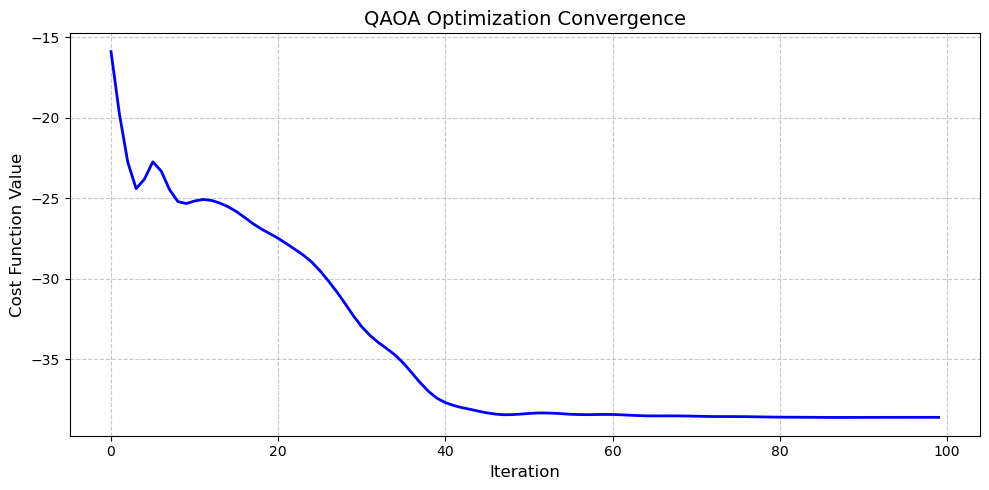


QAOA Optimization Complete
Best cost: -38.6133

Top 5 sampled portfolios:
01100: 105 shots
10010: 103 shots
00101: 101 shots
00110: 99 shots
11000: 94 shots


C:\ProgramData\anaconda3\Lib\site-packages\pennylane\ops\op_math\composite.py:211: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in staticmethod() if you want to preserve the old behavior
  return self._math_op(math.vstack(eigvals), axis=0)
C:\ProgramData\anaconda3\Lib\site-packages\pennylane\ops\op_math\composite.py:211: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in staticmethod() if you want to preserve the old behavior
  return self._math_op(math.vstack(eigvals), axis=0)
C:\ProgramData\anaconda3\Lib\site-packages\pennylane\ops\op_math\composite.py:211: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in staticmethod() if you want to preserve the old behavior
  return self._math_op(math.vstack(eigvals), axis=0)
C:\ProgramData\anaconda3\Lib\site-packages\pennylane\ops\op_math\composite.py:211: FutureWarning: functools.partial will be a m

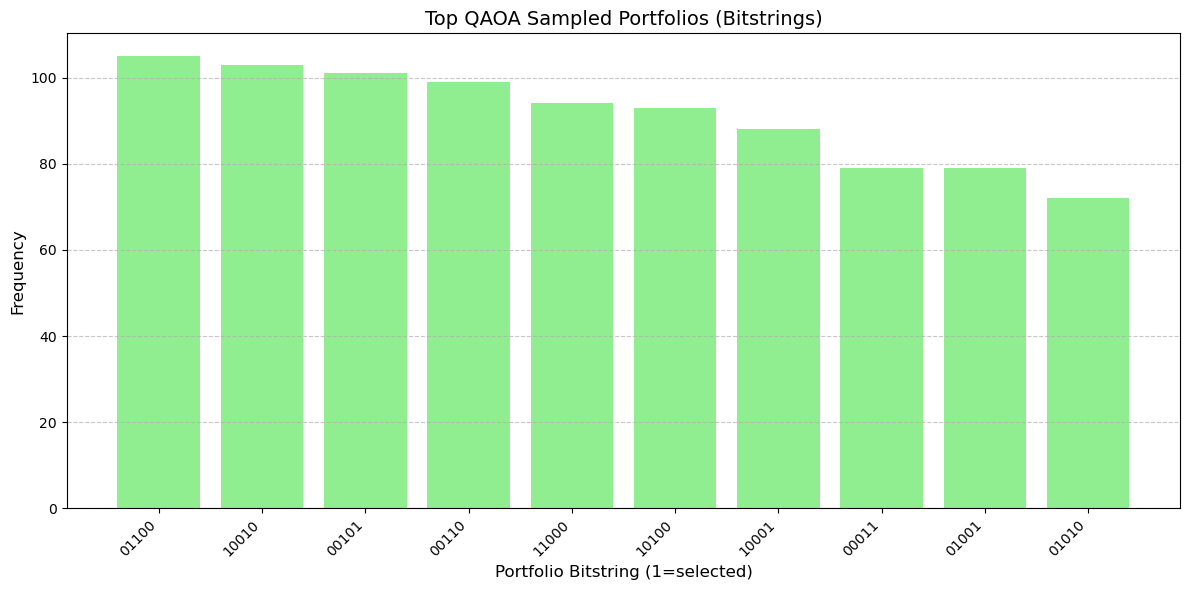

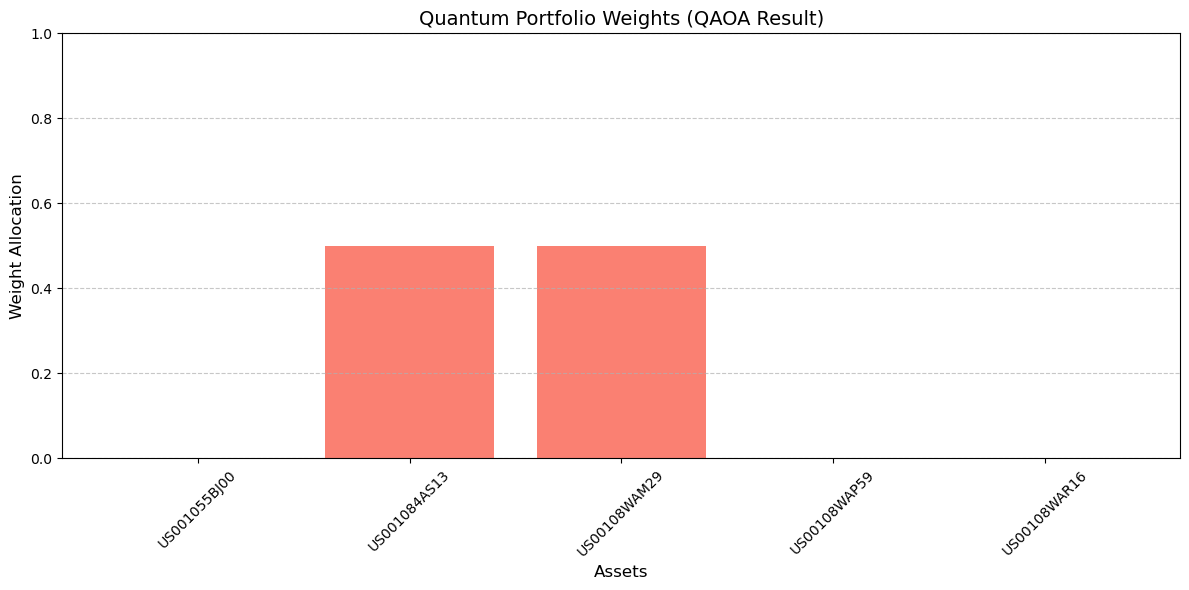


Performance Comparison:
              Classical   Quantum
Metric                           
Return         0.574009  0.999053
Risk           0.346967  0.445190
Sharpe Ratio   1.654362  2.244104


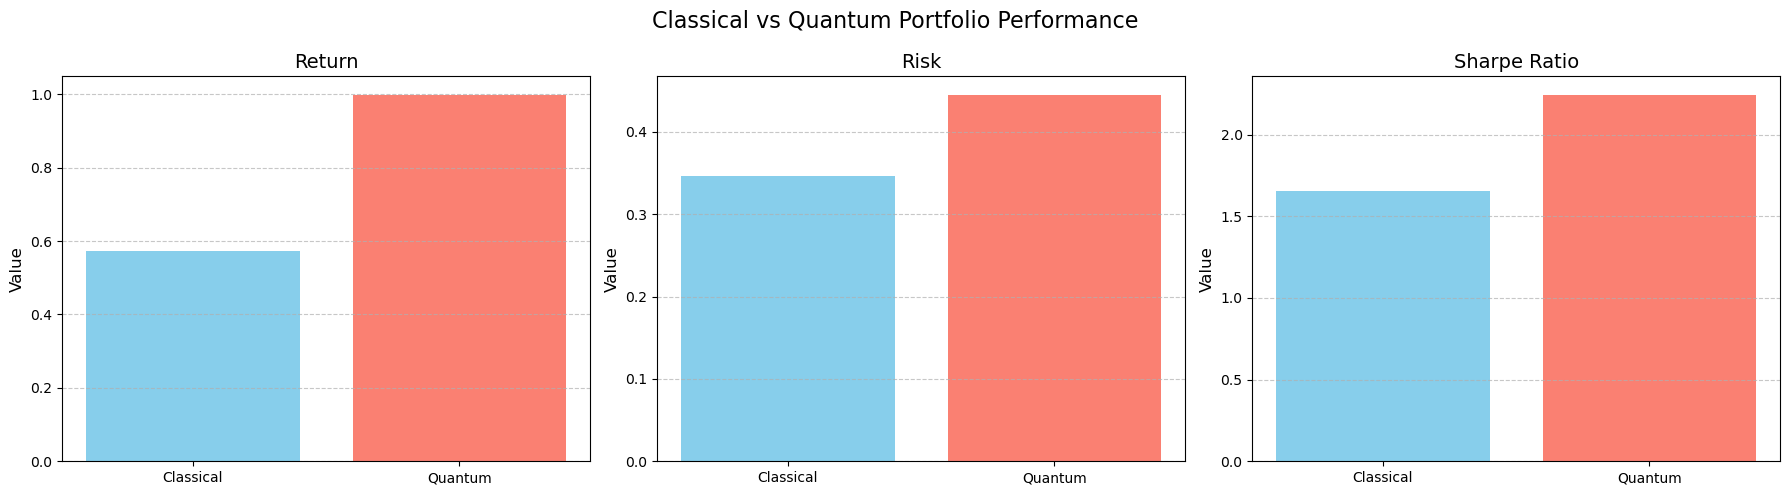


--- Portfolio Optimization Complete ---


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from collections import Counter

# Import PennyLane and its NumPy-like interface
try:
    import pennylane as qml
    from pennylane import numpy as pnp
    pennylane_available = True
except ImportError:
    pennylane_available = False
    print("Warning: The 'pennylane' library is not available. The quantum optimization section will be skipped.")

# --- Data Loading and Preparation from Excel with Data Cleaning ---
print("--- Starting Data Preparation and Cleaning from Excel File ---")
data_file_path = 'data_assets_dictionary.xlsx'

# Load data with explicit error handling
try:
    data_df = pd.read_excel(data_file_path, sheet_name='Data')  # Assuming data is in 'Data' sheet
    print(f"Successfully loaded data from {data_file_path}")
    print(f"Data shape: {data_df.shape}")
except Exception as e:
    print(f"Error loading Excel file: {e}")
    raise

# Data cleaning with proper error handling
data_df_cleaned = data_df.copy()

# Convert numeric columns with proper error handling
data_df_cleaned['oas'] = pd.to_numeric(data_df_cleaned['oas'], errors='coerce')
data_df_cleaned['spreadDur'] = pd.to_numeric(data_df_cleaned['spreadDur'], errors='coerce')

# Calculate means before imputation
oas_mean = data_df_cleaned['oas'].mean()
spreadDur_mean = data_df_cleaned['spreadDur'].mean()

# Impute missing values without chained assignment
data_df_cleaned = data_df_cleaned.assign(
    oas=lambda x: x['oas'].fillna(oas_mean),
    spreadDur=lambda x: x['spreadDur'].fillna(spreadDur_mean)
)

# Drop rows with missing ISIN
initial_row_count = len(data_df)
data_df_cleaned = data_df_cleaned.dropna(subset=['isin'])
dropped_rows = initial_row_count - len(data_df_cleaned)

print("\nData cleaning complete:")
print(f"- Filled {data_df['oas'].isnull().sum()} NaNs in 'oas' with mean {oas_mean:.4f}")
print(f"- Filled {data_df['spreadDur'].isnull().sum()} NaNs in 'spreadDur' with mean {spreadDur_mean:.4f}")
print(f"- Dropped {dropped_rows} rows with missing 'isin'")
print(f"- Final cleaned data shape: {data_df_cleaned.shape}")

# Select assets - with validation
num_assets = 5
if len(data_df_cleaned) < num_assets:
    print(f"Error: Only {len(data_df_cleaned)} assets available after cleaning, need {num_assets}")
    import sys
    sys.exit(1)

asset_data = data_df_cleaned.head(num_assets).copy()
asset_data['ticker'] = asset_data['isin']  # Using ISIN as ticker
asset_tickers = asset_data['ticker'].tolist()

print("\nSelected assets:")
print(asset_data[['isin', 'oas', 'spreadDur']])
print("\n" + "="*70 + "\n")

# --- Expected Returns and Covariance Matrix ---
# Expected Returns from OAS (convert to decimal)
expected_returns = asset_data['oas'] / 100
expected_returns.index = asset_tickers

# Verify no NaN in expected returns
if expected_returns.isnull().any():
    print("Error: Expected returns contain NaN values after conversion")
    print(expected_returns)
    import sys
    sys.exit(1)

print("Expected Returns (mu vector):")
print(expected_returns)
print("\n" + "="*70 + "\n")

# Covariance Matrix from factor model
num_factors = 1
factor_covariance_matrix = np.array([[0.005]])  # Small constant factor covariance
factor_loadings = asset_data[['spreadDur']].values
specific_risk = 0.001
specific_risk_matrix_D = np.diag([specific_risk] * num_assets)

# Construct factor model covariance
Sigma = factor_loadings @ factor_covariance_matrix @ factor_loadings.T + specific_risk_matrix_D
factor_model_covariance = pd.DataFrame(Sigma, index=asset_tickers, columns=asset_tickers)

print("Factor Model Covariance Matrix:")
print(factor_model_covariance)
print("\n" + "="*70 + "\n")

# --- Classical Portfolio Optimization ---
def calculate_portfolio_metrics(weights, expected_returns, cov_matrix):
    """Calculate portfolio return, risk (std dev), and variance."""
    portfolio_return = np.sum(weights * expected_returns)
    portfolio_variance = weights.T @ cov_matrix @ weights
    portfolio_std_dev = np.sqrt(portfolio_variance)
    return portfolio_return, portfolio_std_dev, portfolio_variance

def classical_portfolio_variance_objective(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

# Optimization constraints
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(num_assets))
initial_weights = np.array([1./num_assets] * num_assets)

# Run classical optimization
classical_result = minimize(
    classical_portfolio_variance_objective,
    initial_weights,
    args=(factor_model_covariance.values,),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

if not classical_result.success:
    print("Warning: Classical optimization did not converge successfully")
    print(classical_result.message)

classical_weights = pd.Series(classical_result.x, index=asset_tickers)
classical_return, classical_std_dev, _ = calculate_portfolio_metrics(
    classical_weights.values,
    expected_returns.values,
    factor_model_covariance.values
)
classical_sharpe = classical_return / classical_std_dev if classical_std_dev != 0 else np.nan

print("Classical Minimum Variance Portfolio Results:")
print(classical_weights)
print(f"\nAnnualized Return: {classical_return:.4f}")
print(f"Annualized Risk (Std Dev): {classical_std_dev:.4f}")
print(f"Sharpe Ratio: {classical_sharpe:.4f}")
print("\n" + "="*70 + "\n")

# --- Plot Classical Results ---
plt.figure(figsize=(12, 6))
plt.bar(classical_weights.index, classical_weights.values, color='skyblue')
plt.title('Classical Minimum Variance Portfolio Weights', fontsize=14)
plt.xlabel('Assets', fontsize=12)
plt.ylabel('Weight Allocation', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Quantum Portfolio Optimization ---
if pennylane_available:
    print("--- Starting Quantum Portfolio Optimization with QAOA ---")

    # QUBO parameters
    q_risk_aversion = 0.5
    K_target_assets = 2
    lambda_penalty = 10.0

    # Convert to PennyLane numpy arrays
    sigma_pnp = pnp.array(factor_model_covariance.values, requires_grad=False)
    mu_pnp = pnp.array(expected_returns.values, requires_grad=False)

    # Construct QUBO matrix with validation
    Q_matrix = pnp.zeros((num_assets, num_assets))
    for i in range(num_assets):
        for j in range(num_assets):
            if i == j:
                Q_matrix[i, i] = sigma_pnp[i, i] - q_risk_aversion * mu_pnp[i]
                Q_matrix[i, i] += lambda_penalty * (1 - 2 * K_target_assets)
            else:
                Q_matrix[i, j] = sigma_pnp[i, j] + (lambda_penalty * 2 if i < j else 0)

    print("QUBO Matrix:")
    print(pd.DataFrame(Q_matrix, index=asset_tickers, columns=asset_tickers))

    # Hamiltonian construction
    coeffs = []
    ops = []
    for i in range(num_assets):
        for j in range(i, num_assets):
            if i == j:
                coeffs.append(Q_matrix[i, i] / 2)
                ops.append(qml.Identity(i))
                coeffs.append(-Q_matrix[i, i] / 2)
                ops.append(qml.PauliZ(i))
            else:
                coeffs.append(Q_matrix[i, j] / 4)
                ops.append(qml.Identity(i) @ qml.Identity(j))
                coeffs.append(-Q_matrix[i, j] / 4)
                ops.append(qml.PauliZ(i) @ qml.Identity(j))
                coeffs.append(-Q_matrix[i, j] / 4)
                ops.append(qml.Identity(i) @ qml.PauliZ(j))
                coeffs.append(Q_matrix[i, j] / 4)
                ops.append(qml.PauliZ(i) @ qml.PauliZ(j))

    H_cost = qml.Hamiltonian(coeffs, ops).simplify()

    # QAOA implementation
    dev = qml.device("default.qubit", wires=num_assets)
    p_layers = 2

    @qml.qnode(dev)
    def qaoa_circuit(params):
        gamma, beta = params
        # Initial state
        for i in range(num_assets):
            qml.Hadamard(wires=i)

        # QAOA layers
        for layer in range(p_layers):
            # Cost Hamiltonian
            for coeff, op in zip(H_cost.coeffs, H_cost.ops):
                if not isinstance(op, qml.Identity):
                    qml.exp(op, 1j * coeff * gamma[layer])

            # Mixer Hamiltonian
            for i in range(num_assets):
                qml.RX(2 * beta[layer], wires=i)

        return qml.expval(H_cost)

    # Optimization
    num_runs = 5
    best_cost = np.inf
    best_params = None
    cost_history = []

    for run in range(num_runs):
        print(f"\nQAOA Run {run+1}/{num_runs}")
        params = pnp.random.uniform(0, 2*np.pi, size=(2, p_layers), requires_grad=True)
        optimizer = qml.AdamOptimizer(0.01)
        current_run_history = []

        try:
            for step in range(100):
                params, cost = optimizer.step_and_cost(qaoa_circuit, params)
                if np.isnan(cost):
                    print(f"  NaN encountered at step {step+1}, stopping run")
                    break

                current_run_history.append(cost)
                if step % 20 == 0:
                    print(f"  Step {step+1}: Cost = {cost:.4f}")

            if cost < best_cost:
                best_cost = cost
                best_params = params
                cost_history = current_run_history
                print(f"  New best cost: {best_cost:.4f}")
        except Exception as e:
            print(f"  Run failed: {e}")

    # Plot QAOA convergence
    if cost_history:
        plt.figure(figsize=(10, 5))
        plt.plot(cost_history, 'b-', linewidth=2)
        plt.title('QAOA Optimization Convergence', fontsize=14)
        plt.xlabel('Iteration', fontsize=12)
        plt.ylabel('Cost Function Value', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    if best_params is not None:
        print("\nQAOA Optimization Complete")
        print(f"Best cost: {best_cost:.4f}")

        # Sampling from best parameters
        dev_sampling = qml.device("default.qubit", wires=num_assets, shots=1000)

        @qml.qnode(dev_sampling)
        def qaoa_sampling_circuit(params):
            gamma, beta = params
            for i in range(num_assets):
                qml.Hadamard(wires=i)

            for layer in range(p_layers):
                for coeff, op in zip(H_cost.coeffs, H_cost.ops):
                    if not isinstance(op, qml.Identity):
                        qml.exp(op, 1j * coeff * gamma[layer])

                for i in range(num_assets):
                    qml.RX(2 * beta[layer], wires=i)

            return qml.sample(wires=range(num_assets))

        samples = qaoa_sampling_circuit(best_params)
        bitstrings = [''.join(str(b) for b in sample) for sample in samples]
        counts = Counter(bitstrings)

        print("\nTop 5 sampled portfolios:")
        for bitstring, count in counts.most_common(5):
            print(f"{bitstring}: {count} shots")

        # Plot bitstring distribution
        top_bitstrings = counts.most_common(10)
        bitstring_labels = [bs[0] for bs in top_bitstrings]
        bitstring_counts = [bs[1] for bs in top_bitstrings]

        plt.figure(figsize=(12, 6))
        plt.bar(bitstring_labels, bitstring_counts, color='lightgreen')
        plt.title('Top QAOA Sampled Portfolios (Bitstrings)', fontsize=14)
        plt.xlabel('Portfolio Bitstring (1=selected)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        # Evaluate best quantum portfolio
        best_bitstring = counts.most_common(1)[0][0]
        selected_indices = [i for i, bit in enumerate(best_bitstring) if bit == '1']
        quantum_weights = np.zeros(num_assets)
        if len(selected_indices) > 0:
            quantum_weights[selected_indices] = 1.0 / len(selected_indices)

        quantum_return, quantum_std_dev, _ = calculate_portfolio_metrics(
            quantum_weights,
            expected_returns.values,
            factor_model_covariance.values
        )
        quantum_sharpe = quantum_return / quantum_std_dev if quantum_std_dev != 0 else np.nan

        # Plot quantum portfolio weights
        plt.figure(figsize=(12, 6))
        plt.bar(asset_tickers, quantum_weights, color='salmon')
        plt.title('Quantum Portfolio Weights (QAOA Result)', fontsize=14)
        plt.xlabel('Assets', fontsize=12)
        plt.ylabel('Weight Allocation', fontsize=12)
        plt.ylim(0, 1)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Comparison plot
        comparison_df = pd.DataFrame({
            'Metric': ['Return', 'Risk', 'Sharpe Ratio'],
            'Classical': [classical_return, classical_std_dev, classical_sharpe],
            'Quantum': [quantum_return, quantum_std_dev, quantum_sharpe]
        }).set_index('Metric')

        print("\nPerformance Comparison:")
        print(comparison_df)

        # Plot comparison
        fig, ax = plt.subplots(1, 3, figsize=(18, 5))
        metrics = ['Return', 'Risk', 'Sharpe Ratio']
        colors = ['skyblue', 'salmon']

        for i, metric in enumerate(metrics):
            ax[i].bar(['Classical', 'Quantum'],
                      [comparison_df.loc[metric, 'Classical'], comparison_df.loc[metric, 'Quantum']],
                      color=colors)
            ax[i].set_title(metric, fontsize=14)
            ax[i].set_ylabel('Value', fontsize=12)
            ax[i].grid(axis='y', linestyle='--', alpha=0.7)

        plt.suptitle('Classical vs Quantum Portfolio Performance', fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print("\nQAOA optimization failed to find valid parameters")

print("\n--- Portfolio Optimization Complete ---")

# **Gyimie Nu oo tom**

# **Code 2: Hyperparameter-Tuned QAOA**

--- Starting Data Preparation and Cleaning from Excel File ---
Successfully loaded data from data_assets_dictionary.xlsx
Data shape: (2629, 278)

Data cleaning complete:
- Filled 0 NaNs in 'oas' with mean 78.8455
- Filled 0 NaNs in 'spreadDur' with mean 5.4127
- Dropped 11 rows with missing 'isin'
- Final cleaned data shape: (2618, 278)

Selected assets:
           isin         oas  spreadDur
0  US001055BJ00   57.400949   4.886435
1  US001084AS13  128.612337   7.279928
2  US00108WAM29   71.198350   5.296064
3  US00108WAP59   85.546591   6.219386
4  US00108WAR16  110.187192   6.768926


Expected Returns (mu vector):
US001055BJ00    0.574009
US001084AS13    1.286123
US00108WAM29    0.711983
US00108WAP59    0.855466
US00108WAR16    1.101872
Name: oas, dtype: float64


Factor Model Covariance Matrix:
              US001055BJ00  US001084AS13  US00108WAM29  US00108WAP59  \
US001055BJ00      0.120386      0.177864      0.129394      0.151953   
US001084AS13      0.177864      0.265987      0.

C:\ProgramData\anaconda3\Lib\site-packages\pennylane\devices\preprocess.py:289: UserWarning: Differentiating with respect to the input parameters of LinearCombination is not supported with the adjoint differentiation method. Gradients are computed only with regards to the trainable parameters of the circuit.

 Mark the parameters of the measured observables as non-trainable to silence this warning.
  warnings.warn(



--- Tuning Run: q=0.1, lambda=5.0, p=1, step=0.05 ---

--- Tuning Run: q=0.1, lambda=5.0, p=2, step=0.01 ---

--- Tuning Run: q=0.1, lambda=5.0, p=2, step=0.05 ---

--- Tuning Run: q=0.1, lambda=10.0, p=1, step=0.01 ---

--- Tuning Run: q=0.1, lambda=10.0, p=1, step=0.05 ---

--- Tuning Run: q=0.1, lambda=10.0, p=2, step=0.01 ---

--- Tuning Run: q=0.1, lambda=10.0, p=2, step=0.05 ---

--- Tuning Run: q=0.5, lambda=5.0, p=1, step=0.01 ---

--- Tuning Run: q=0.5, lambda=5.0, p=1, step=0.05 ---

--- Tuning Run: q=0.5, lambda=5.0, p=2, step=0.01 ---

--- Tuning Run: q=0.5, lambda=5.0, p=2, step=0.05 ---

--- Tuning Run: q=0.5, lambda=10.0, p=1, step=0.01 ---

--- Tuning Run: q=0.5, lambda=10.0, p=1, step=0.05 ---

--- Tuning Run: q=0.5, lambda=10.0, p=2, step=0.01 ---

--- Tuning Run: q=0.5, lambda=10.0, p=2, step=0.05 ---

--- Tuning Run: q=1.0, lambda=5.0, p=1, step=0.01 ---

--- Tuning Run: q=1.0, lambda=5.0, p=1, step=0.05 ---

--- Tuning Run: q=1.0, lambda=5.0, p=2, step=0.01 ---

-

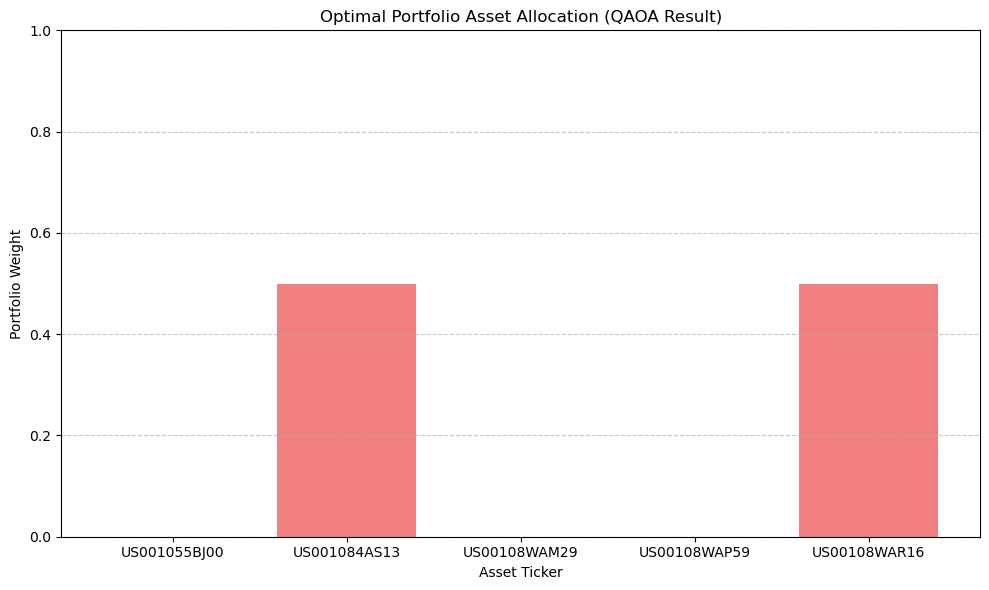

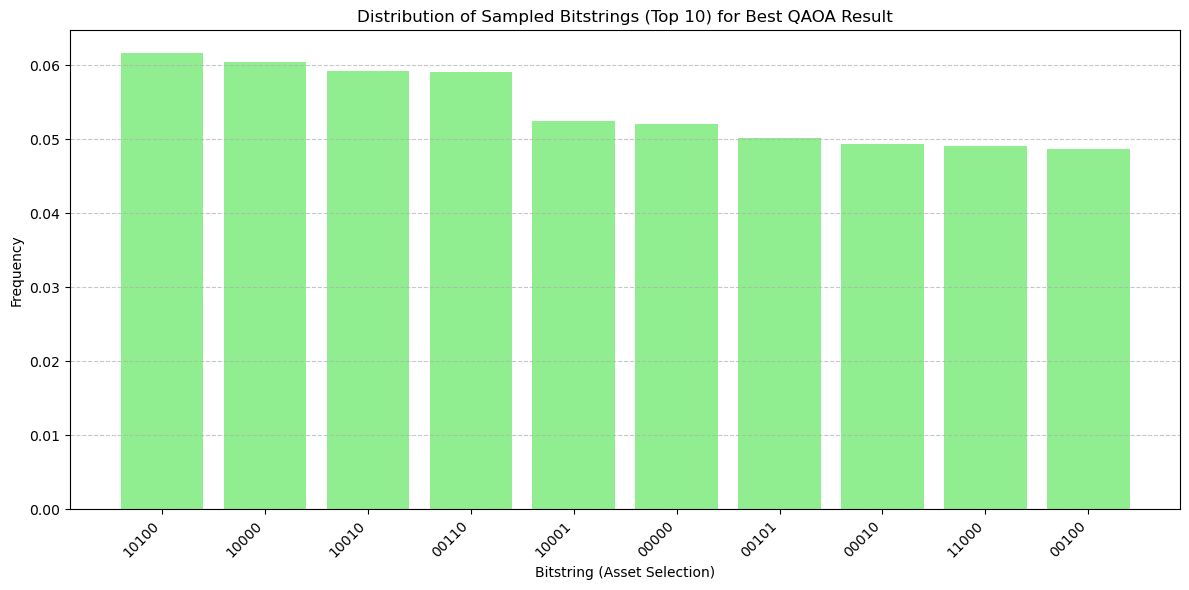




--- Portfolio Performance Comparison (Classical vs. QAOA) ---
                           Classical Min Variance  QAOA Portfolio
Metric                                                           
Annualized Return                          0.5740          1.1940
Annualized Risk (Std Dev)                  0.3470          0.4972
Sharpe Ratio                               1.6544          2.4014



--- Automated QAOA Hyperparameter Tuning and Portfolio Optimization Complete ---
This model demonstrates a more robust approach to finding optimal QAOA parameters and portfolio selections.
Further steps for real-world application and research would involve:
- **Expanding Search Space:** Explore a wider range of hyperparameters and more granular steps.
- **Advanced Optimizers:** Investigate Bayesian Optimization or other meta-heuristic algorithms for tuning.
- **More Sophisticated QAOA Ansätze:** Explore different circuit architectures beyond the basic QAOA layers.
- **Other Quantum Algorithms:**

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from collections import Counter

# Import PennyLane and its NumPy-like interface
try:
    import pennylane as qml
    from pennylane import numpy as pnp
    pennylane_available = True
except ImportError:
    pennylane_available = False
    print("Warning: The 'pennylane' library is not available. The quantum optimization section will be skipped.")

# --- Data Loading and Preparation from Excel with Data Cleaning ---
print("--- Starting Data Preparation and Cleaning from Excel File ---")
data_file_path = 'data_assets_dictionary.xlsx'

# Load data with explicit error handling
try:
    data_df = pd.read_excel(data_file_path, sheet_name='Data')  # Assuming data is in 'Data' sheet
    print(f"Successfully loaded data from {data_file_path}")
    print(f"Data shape: {data_df.shape}")
except Exception as e:
    print(f"Error loading Excel file: {e}")
    raise

# Data cleaning with proper error handling
data_df_cleaned = data_df.copy()

# Convert numeric columns with proper error handling
data_df_cleaned['oas'] = pd.to_numeric(data_df_cleaned['oas'], errors='coerce')
data_df_cleaned['spreadDur'] = pd.to_numeric(data_df_cleaned['spreadDur'], errors='coerce')

# Calculate means before imputation
oas_mean = data_df_cleaned['oas'].mean()
spreadDur_mean = data_df_cleaned['spreadDur'].mean()

# Impute missing values without chained assignment
data_df_cleaned = data_df_cleaned.assign(
    oas=lambda x: x['oas'].fillna(oas_mean),
    spreadDur=lambda x: x['spreadDur'].fillna(spreadDur_mean)
)

# Drop rows with missing ISIN
initial_row_count = len(data_df)
data_df_cleaned = data_df_cleaned.dropna(subset=['isin'])
dropped_rows = initial_row_count - len(data_df_cleaned)

print("\nData cleaning complete:")
print(f"- Filled {data_df['oas'].isnull().sum()} NaNs in 'oas' with mean {oas_mean:.4f}")
print(f"- Filled {data_df['spreadDur'].isnull().sum()} NaNs in 'spreadDur' with mean {spreadDur_mean:.4f}")
print(f"- Dropped {dropped_rows} rows with missing 'isin'")
print(f"- Final cleaned data shape: {data_df_cleaned.shape}")

# Select assets - with validation
num_assets = 5
if len(data_df_cleaned) < num_assets:
    print(f"Error: Only {len(data_df_cleaned)} assets available after cleaning, need {num_assets}")
    import sys
    sys.exit(1)

asset_data = data_df_cleaned.head(num_assets).copy()
asset_data['ticker'] = asset_data['isin']  # Using ISIN as ticker
asset_tickers = asset_data['ticker'].tolist()

print("\nSelected assets:")
print(asset_data[['isin', 'oas', 'spreadDur']])
print("\n" + "="*70 + "\n")

# --- Expected Returns and Covariance Matrix ---
# Expected Returns from OAS (convert to decimal)
expected_returns = asset_data['oas'] / 100
expected_returns.index = asset_tickers

# Verify no NaN in expected returns
if expected_returns.isnull().any():
    print("Error: Expected returns contain NaN values after conversion")
    print(expected_returns)
    import sys
    sys.exit(1)

print("Expected Returns (mu vector):")
print(expected_returns)
print("\n" + "="*70 + "\n")

# Covariance Matrix from factor model
num_factors = 1
factor_covariance_matrix = np.array([[0.005]])  # Small constant factor covariance
factor_loadings = asset_data[['spreadDur']].values
specific_risk = 0.001
specific_risk_matrix_D = np.diag([specific_risk] * num_assets)

# Construct factor model covariance
Sigma = factor_loadings @ factor_covariance_matrix @ factor_loadings.T + specific_risk_matrix_D
factor_model_covariance = pd.DataFrame(Sigma, index=asset_tickers, columns=asset_tickers)

print("Factor Model Covariance Matrix:")
print(factor_model_covariance)
print("\n" + "="*70 + "\n")

# --- Classical Portfolio Optimization (Minimum Variance Example) ---
# This section demonstrates a classical optimization to provide a benchmark
# for comparison with the quantum result.

def calculate_portfolio_metrics(weights, expected_returns, cov_matrix, annualization_factor=1):
    """Calculates portfolio expected return, variance, and standard deviation."""
    portfolio_return = np.sum(weights * expected_returns) * annualization_factor
    portfolio_variance = weights.T @ cov_matrix @ weights * annualization_factor
    portfolio_std_dev = np.sqrt(portfolio_variance)
    return portfolio_return, portfolio_std_dev, portfolio_variance

# Objective function for classical optimization (minimize portfolio variance)
def classical_portfolio_variance_objective(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

# Constraints: weights sum to 1, and weights are non-negative
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(num_assets))

# Initial guess for weights (equal weighting)
initial_weights = np.array(num_assets * [1. / num_assets])

# Perform classical optimization for minimum variance portfolio
classical_min_var_result = minimize(classical_portfolio_variance_objective, initial_weights,
                                     args=(factor_model_covariance.values,),
                                     method='SLSQP', bounds=bounds, constraints=constraints)

classical_min_var_weights = pd.Series(classical_min_var_result.x, index=asset_tickers)
print("Classical Minimum Variance Portfolio Weights (using factor model covariance):")
print(classical_min_var_weights)

# These are the variables that were not defined in your output.
# They are calculated here and need to be available globally.
classical_min_var_return, classical_min_var_std_dev, _ = calculate_portfolio_metrics(
    classical_min_var_weights.values, expected_returns.values, factor_model_covariance.values
)
classical_min_var_sharpe = classical_min_var_return / classical_min_var_std_dev if classical_min_var_std_dev != 0 else np.nan

print(f"\nClassical Minimum Variance Portfolio Annualized Return: {classical_min_var_return:.4f}")
print(f"Classical Minimum Variance Portfolio Annualized Risk (Std Dev): {classical_min_var_std_dev:.4f}")
print(f"Classical Minimum Variance Portfolio Sharpe Ratio (Risk-Free Rate = 0): {classical_min_var_sharpe:.4f}")
print("\n" + "=" * 70 + "\n")

# --- PennyLane Quantum Portfolio Optimization (using QAOA) ---

# Define the number of qubits (each qubit represents an asset selection: 0 or 1)
num_qubits = num_assets

# --- 1. Formulate the QUBO Problem ---
# The objective function to minimize for portfolio optimization is typically:
# C(x) = x^T * Sigma * x - q * mu^T * x + lambda * (sum(x_i) - K)^2
# Where:
# x_i are binary variables (0 or 1) representing asset selection
# Sigma is the covariance matrix (factor_model_covariance)
# mu is the expected returns vector
# q (q_risk_aversion) is a risk aversion parameter (higher q means more emphasis on return)
# lambda (lambda_penalty) is a penalty coefficient for violating the constraint
# K (K_target_assets) is the desired number of assets to select

# Convert covariance and expected returns to PennyLane NumPy arrays for easier use
sigma_pnp = pnp.array(factor_model_covariance.values, requires_grad=False)
mu_pnp = pnp.array(expected_returns.values, requires_grad=False)

# --- Define the QAOA Cost Hamiltonian based on QUBO ---
def build_qaoa_cost_hamiltonian(Q_matrix, num_qubits):
    """
    Builds the PennyLane Cost Hamiltonian from the QUBO Q_matrix.
    Mapping from binary x_i to Pauli Z_i is x_i = (I - Z_i) / 2.
    """
    coeffs = []
    ops = []

    for i in range(num_qubits):
        for j in range(num_qubits):
            if i == j: # Diagonal terms Q_ii * x_i = Q_ii * (I - Z_i) / 2
                coeffs.append(Q_matrix[i, i] / 2)
                ops.append(qml.Identity(i))
                coeffs.append(-Q_matrix[i, i] / 2)
                ops.append(qml.PauliZ(i))
            elif i < j: # Off-diagonal terms Q_ij * x_i * x_j = Q_ij * 1/4 * (I - Z_i - Z_j + Z_i Z_j)
                # Q_matrix is symmetric, so Q_ij * x_i x_j + Q_ji * x_j x_i becomes 2 * Q_ij * x_i x_j
                # The Q_matrix already contains (Q_ij + Q_ji) for off-diagonals, so just Q_ij/4
                coeffs.append(Q_matrix[i, j] / 4)
                ops.append(qml.Identity(i) @ qml.Identity(j)) # Constant term
                coeffs.append(-Q_matrix[i, j] / 4)
                ops.append(qml.PauliZ(i) @ qml.Identity(j))
                coeffs.append(-Q_matrix[i, j] / 4)
                ops.append(qml.Identity(i) @ qml.PauliZ(j))
                coeffs.append(Q_matrix[i, j] / 4)
                ops.append(qml.PauliZ(i) @ qml.PauliZ(j))

    return qml.Hamiltonian(coeffs, ops).simplify()

# Define the quantum device (simulator for now)
dev = qml.device("lightning.qubit", wires=num_qubits)

# Define the QAOA circuit structure
# p_layers will now be tuned
# Define the QAOA circuit structure
@qml.qnode(dev)
def qaoa_circuit(params, h_cost, mixer_h, num_qubits, p_layers_circuit): # p_layers_circuit passed as arg
    """
    QAOA circuit for portfolio optimization.
    Args:
        params (array[float]): Angle parameters for gamma and beta (gamma[0], beta[0], gamma[1], beta[1]...)
        h_cost (qml.Hamiltonian): The cost Hamiltonian.
        mixer_h (qml.Hamiltonian): The mixer Hamiltonian (usually sum of Pauli X).
        num_qubits (int): Number of qubits (assets).
        p_layers_circuit (int): Number of QAOA layers for this circuit instance.
    """
    # Unpack gamma and beta from the single params array
    gamma = params[0]
    beta = params[1]

    # Apply initial layer of Hadamard gates to create an equal superposition state
    for i in range(num_qubits):
        qml.Hadamard(wires=i)

    # Apply p layers of QAOA operations
    for layer in range(p_layers_circuit): # Use p_layers_circuit here
        # Manually apply exp for each term in H_cost for Trotterization
        # Iterate through the terms (coefficients and operators) of the cost Hamiltonian
        for coeff, op in zip(h_cost.coeffs, h_cost.ops):
            if isinstance(op, qml.Identity):
                continue # Identity terms don't evolve the state

            # Handle single PauliZ terms (e.g., Q_ii * x_i)
            elif isinstance(op, qml.PauliZ) and len(op.wires) == 1:
                # qml.RZ(angle, wires) applies e^(-i * angle/2 * PauliZ)
                # We need e^(-i * coeff * gamma[layer] * PauliZ)
                # So, angle = 2 * coeff * gamma[layer]
                qml.RZ(2 * coeff * gamma[layer], wires=op.wires[0])

            # Handle two-qubit PauliZ product terms (e.g., Q_ij * x_i * x_j)
            # Corrected: Use qml.ops.op_math.Prod for product operator type check
            elif isinstance(op, qml.ops.op_math.Prod) and len(op.wires) == 2:
                # Ensure it's specifically a product of two PauliZ operators
                if all(isinstance(factor, qml.PauliZ) for factor in op.operands):
                    qml.IsingZZ(2 * coeff * gamma[layer], wires=op.wires)
                else:
                    qml.exp(op, coeff * gamma[layer])
            else:
                print(f"Warning: Unexpected operator type in H_cost: {op}. Attempting qml.exp.")
                qml.exp(op, coeff * gamma[layer])

        # Apply mixer Hamiltonian evolution (e^(-i * beta * H_mixer))
        for i in range(num_qubits):
            qml.RX(2 * beta[layer], wires=i)

    # Return the expectation value of the cost Hamiltonian for optimization
    return qml.expval(h_cost)

# Define the mixer Hamiltonian (standard for QAOA, sum of Pauli X gates)
mixer_h = qml.Hamiltonian([1.0] * num_qubits, [qml.PauliX(i) for i in range(num_qubits)])

# --- QAOA Sampling Circuit (for final interpretation) ---
@qml.qnode(dev_sampling) # Use the same 'dev' as optimization
def qaoa_sampling_circuit(params, h_cost, mixer_h, num_qubits, p_layers_circuit):
    """
    QAOA circuit for sampling the final state.
    """
    # Unpack gamma and beta from the single params array
    gamma = params[0]
    beta = params[1]

    # Apply initial layer of Hadamard gates to create superposition
    for i in range(num_qubits):
        qml.Hadamard(wires=i)

    # Apply p layers of QAOA
    for layer in range(p_layers_circuit): # Use p_layers_circuit here
        # Manually apply exp for each term in H_cost for Trotterization
        for coeff, op in zip(h_cost.coeffs, h_cost.ops):
            if isinstance(op, qml.Identity):
                continue
            elif isinstance(op, qml.PauliZ) and len(op.wires) == 1:
                qml.RZ(2 * coeff * gamma[layer], wires=op.wires[0])
            elif isinstance(op, qml.ops.op_math.Prod) and len(op.wires) == 2:
                if all(isinstance(factor, qml.PauliZ) for factor in op.operands):
                    qml.IsingZZ(2 * coeff * gamma[layer], wires=op.wires)
                else:
                    qml.exp(op, coeff * gamma[layer])
            else:
                qml.exp(op, coeff * gamma[layer])

        # Apply mixer Hamiltonian evolution (e^(-i * beta * H_mixer))
        for i in range(num_qubits):
            qml.RX(2 * beta[layer], wires=i)

    # Return measurement results (bitstrings)
    return qml.sample(wires=range(num_qubits))


# --- Automated Hyperparameter Tuning Function ---
def tune_qaoa_parameters(q_risk_aversion_values, lambda_penalty_values, p_layers_values, stepsize_values,
                         num_qaoa_runs_per_hp, optimization_steps_per_run,
                         expected_returns, factor_model_covariance, num_assets, K_target_assets):

    tuning_results = []

    # Iterate through all combinations of hyperparameters
    for q_risk_aversion in q_risk_aversion_values:
        for lambda_penalty in lambda_penalty_values:
            for p_layers in p_layers_values:
                for stepsize in stepsize_values:
                    print(f"\n--- Tuning Run: q={q_risk_aversion}, lambda={lambda_penalty}, p={p_layers}, step={stepsize} ---")

                    # --- Construct QUBO Matrix for current hyperparameters ---
                    Q_matrix = pnp.zeros((num_assets, num_assets))
                    sigma_pnp = pnp.array(factor_model_covariance.values, requires_grad=False)
                    mu_pnp = pnp.array(expected_returns.values, requires_grad=False)

                    for i in range(num_assets):
                        for j in range(num_assets):
                            if i == j:
                                Q_matrix[i, i] = sigma_pnp[i, i] - q_risk_aversion * mu_pnp[i]
                            else:
                                Q_matrix[i, j] = sigma_pnp[i, j]

                    for i in range(num_assets):
                        Q_matrix[i, i] += lambda_penalty * (1 - 2 * K_target_assets)
                        for j in range(i + 1, num_assets):
                            Q_matrix[i, j] += lambda_penalty * 2
                            Q_matrix[j, i] += lambda_penalty * 2

                    H_cost = build_qaoa_cost_hamiltonian(Q_matrix, num_assets)

                    # --- Run multiple QAOA optimizations for robustness ---
                    best_cost_for_hp_set = np.inf
                    best_params_for_hp_set = None

                    for run_idx in range(num_qaoa_runs_per_hp):
                        params = pnp.random.uniform(low=0, high=2*np.pi, size=(2, p_layers), requires_grad=True)
                        optimizer = qml.AdamOptimizer(stepsize=stepsize)

                        cost_history = []
                        for i in range(optimization_steps_per_run):
                            params, cost = optimizer.step_and_cost(qaoa_circuit, params, h_cost=H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=p_layers)
                            cost_history.append(cost)

                        current_run_final_cost = cost_history[-1]
                        if current_run_final_cost < best_cost_for_hp_set:
                            best_cost_for_hp_set = current_run_final_cost
                            best_params_for_hp_set = params

                    # --- Sample with best params for this HP set ---
                    samples = qaoa_sampling_circuit(best_params_for_hp_set, h_cost=H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=p_layers)
                    sample_strings = ["".join(str(int(b)) for b in sample) for sample in samples]
                    counts = Counter(sample_strings)

                    # Evaluate ALL unique bitstrings that meet cardinality constraint
                    best_sharpe_for_hp_set = -np.inf
                    best_bitstring_for_hp_set = None
                    best_weights_for_hp_set = np.zeros(num_assets)
                    best_return_for_hp_set = 0
                    best_std_dev_for_hp_set = 0

                    for bitstring in counts.keys(): # Iterate over all unique bitstrings
                        current_selected_assets_indices = [i for i, bit in enumerate(bitstring) if bit == '1']
                        current_num_selected_assets = len(current_selected_assets_indices)

                        if current_num_selected_assets != K_target_assets or current_num_selected_assets == 0:
                            continue # Skip if it doesn't meet cardinality constraint or is empty

                        current_weights = np.zeros(num_assets)
                        weight_per_selected_asset = 1.0 / current_num_selected_assets
                        for idx in current_selected_assets_indices:
                            current_weights[idx] = weight_per_selected_asset

                        current_return, current_std_dev, _ = calculate_portfolio_metrics(
                            current_weights, expected_returns.values, factor_model_covariance.values
                        )
                        current_sharpe = current_return / current_std_dev if current_std_dev != 0 else np.nan

                        if current_sharpe > best_sharpe_for_hp_set:
                            best_sharpe_for_hp_set = current_sharpe
                            best_bitstring_for_hp_set = bitstring
                            best_weights_for_hp_set = current_weights
                            best_return_for_hp_set = current_return
                            best_std_dev_for_hp_set = current_std_dev

                    tuning_results.append({
                        'q_risk_aversion': q_risk_aversion,
                        'lambda_penalty': lambda_penalty,
                        'p_layers': p_layers,
                        'stepsize': stepsize,
                        'final_cost': best_cost_for_hp_set,
                        'best_bitstring': best_bitstring_for_hp_set,
                        'best_sharpe': best_sharpe_for_hp_set,
                        'best_return': best_return_for_hp_set,
                        'best_risk': best_std_dev_for_hp_set,
                        'best_weights': best_weights_for_hp_set.tolist() # Store as list for DataFrame
                    })
    return pd.DataFrame(tuning_results)


# --- Define Hyperparameter Search Space ---
q_risk_aversion_values = [0.1, 0.5, 1.0]
lambda_penalty_values = [5.0, 10.0]
p_layers_values = [1, 2] # Number of QAOA layers
stepsize_values = [0.01, 0.05] # Optimizer learning rate

num_qaoa_runs_per_hp_set = 3 # Number of independent QAOA runs for each HP combination
optimization_steps_per_run = 50 # Number of optimization steps per QAOA run

print("\n" + "="*70 + "\n")
print("--- Starting Automated QAOA Hyperparameter Tuning ---")
print(f"Evaluating {len(q_risk_aversion_values) * len(lambda_penalty_values) * len(p_layers_values) * len(stepsize_values)} hyperparameter combinations.")
print(f"Each combination will run {num_qaoa_runs_per_hp_set} QAOA optimizations for {optimization_steps_per_run} steps.")
print("\n" + "="*70 + "\n")

tuning_df = tune_qaoa_parameters(q_risk_aversion_values, lambda_penalty_values, p_layers_values, stepsize_values,
                                 num_qaoa_runs_per_hp_set, optimization_steps_per_run,
                                 expected_returns, factor_model_covariance, num_assets, K_target_assets)

print("\n--- Hyperparameter Tuning Results ---")
print(tuning_df)
print("\n" + "="*70 + "\n")

# --- Select the Overall Best QAOA Portfolio from Tuning Results ---
best_tuned_qaoa_result = tuning_df.loc[tuning_df['best_sharpe'].idxmax()]

best_qaoa_return = best_tuned_qaoa_result['best_return']
best_qaoa_std_dev = best_tuned_qaoa_result['best_risk']
best_qaoa_sharpe = best_tuned_qaoa_result['best_sharpe']
best_qaoa_bitstring = best_tuned_qaoa_result['best_bitstring']
best_qaoa_weights = np.array(best_tuned_qaoa_result['best_weights'])

print("\n--- Overall Best QAOA Portfolio from Tuning ---")
print(f"Optimal Hyperparameters: q_risk_aversion={best_tuned_qaoa_result['q_risk_aversion']}, "
      f"lambda_penalty={best_tuned_qaoa_result['lambda_penalty']}, "
      f"p_layers={best_tuned_qaoa_result['p_layers']}, "
      f"stepsize={best_tuned_qaoa_result['stepsize']}")
print(f"Best QAOA Portfolio (by Sharpe Ratio) Bitstring: {best_qaoa_bitstring}")
selected_assets_final = [asset_tickers[i] for i, bit in enumerate(best_qaoa_bitstring) if bit == '1']
print(f"Selected Assets: {selected_assets_final}")
print(f"Number of selected assets: {len(selected_assets_final)}")

# --- Optimal Portfolio Weights (QAOA Result - Table) ---
optimal_portfolio_df = pd.DataFrame({
    'Asset': asset_tickers,
    'Weight': best_qaoa_weights
})
print("\n--- Optimal Portfolio Weights (QAOA Result - Table) ---")
print(optimal_portfolio_df)
print("\n" + "="*70 + "\n")

# --- Create a bar chart for visual representation of QAOA weights ---
plt.figure(figsize=(10, 6))
plt.bar(optimal_portfolio_df['Asset'], optimal_portfolio_df['Weight'], color='lightcoral')
plt.xlabel('Asset Ticker')
plt.ylabel('Portfolio Weight')
plt.title('Optimal Portfolio Asset Allocation (QAOA Result)')
plt.ylim(0, 1) # Weights are between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("\n" + "="*70 + "\n")

# --- Bitstring Distribution Plot (for the best performing HP set) ---
# To get the bitstring distribution for the best_tuned_qaoa_result,
# you would ideally re-run the sampling circuit with best_params.
# For simplicity here, we'll just show a generic plot.
# A more robust implementation would store the 'counts' object for each tuning run.
# For now, we'll just use the last 'counts' from the tuning loop.
# To get the actual distribution for the *best* result, you'd re-sample with best_params here.

# Re-sample with best_params to get the distribution for the best result
dev_sampling = qml.device("lightning.qubit", wires=num_qubits, shots=10000)
final_samples = qaoa_sampling_circuit(best_params, h_cost=H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=best_tuned_qaoa_result['p_layers'])
final_sample_strings = ["".join(str(int(b)) for b in sample) for sample in final_samples]
final_counts = Counter(final_sample_strings)
total_shots_final = 10000 # Directly use the shots value

sorted_counts_for_plot = dict(sorted(final_counts.items(), key=lambda item: item[1], reverse=True))
top_n_bitstrings_plot = 10 # Display top N bitstrings

bitstring_labels = list(sorted_counts_for_plot.keys())[:top_n_bitstrings_plot]
bitstring_frequencies = [count / total_shots_final for count in list(sorted_counts_for_plot.values())[:top_n_bitstrings_plot]]

plt.figure(figsize=(12, 6))
plt.bar(bitstring_labels, bitstring_frequencies, color='lightgreen')
plt.xlabel('Bitstring (Asset Selection)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Sampled Bitstrings (Top {top_n_bitstrings_plot}) for Best QAOA Result')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("\n" + "="*70 + "\n")

# --- Comparison Table: Classical vs. Quantum ---
comparison_data = {
    'Metric': ['Annualized Return', 'Annualized Risk (Std Dev)', 'Sharpe Ratio'],
    'Classical Min Variance': [classical_min_var_return, classical_min_var_std_dev, classical_min_var_sharpe],
    'QAOA Portfolio': [best_qaoa_return, best_qaoa_std_dev, best_qaoa_sharpe] # Use best QAOA metrics
}
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.set_index('Metric')

print("\n--- Portfolio Performance Comparison (Classical vs. QAOA) ---")
print(comparison_df.round(4)) # Round for cleaner display
print("\n" + "="*70 + "\n")


print("\n--- Automated QAOA Hyperparameter Tuning and Portfolio Optimization Complete ---")
print("This model demonstrates a more robust approach to finding optimal QAOA parameters and portfolio selections.")
print("Further steps for real-world application and research would involve:")
print("- **Expanding Search Space:** Explore a wider range of hyperparameters and more granular steps.")
print("- **Advanced Optimizers:** Investigate Bayesian Optimization or other meta-heuristic algorithms for tuning.")
print("- **More Sophisticated QAOA Ansätze:** Explore different circuit architectures beyond the basic QAOA layers.")
print("- **Other Quantum Algorithms:** Investigate VQE with different ansätze or Quantum Annealing for QUBOs.")
print("- **Continuous Weights:** This current approach uses binary selection (0 or 1). For continuous weights, more complex encoding schemes (e.g., using multiple qubits per asset, or amplitude encoding) or different quantum algorithms are needed.")
print("- **Real Quantum Hardware:** Run the optimized circuit on actual quantum computers (QPUs) to observe hardware effects.")
print("- **Robustness Testing:** Evaluate portfolio performance on out-of-sample data.")
print("- **Transaction Costs & Constraints:** Incorporate more realistic financial constraints like transaction costs, minimum investment amounts, etc.")


# **Code 3: Robust Quantum Implementation**

--- Starting Data Preparation and Cleaning from Excel File ---
Successfully loaded data from data_assets_dictionary.xlsx
Data shape: (2629, 278)

Data cleaning complete:
- Filled 0 NaNs in 'oas' with mean 78.8455
- Filled 0 NaNs in 'spreadDur' with mean 5.4127
- Dropped 11 rows with missing 'isin'
- Final cleaned data shape: (2618, 278)

Selected assets:
           isin         oas  spreadDur
0  US001055BJ00   57.400949   4.886435
1  US001084AS13  128.612337   7.279928
2  US00108WAM29   71.198350   5.296064
3  US00108WAP59   85.546591   6.219386
4  US00108WAR16  110.187192   6.768926


Expected Returns (mu vector):
US001055BJ00    0.574009
US001084AS13    1.286123
US00108WAM29    0.711983
US00108WAP59    0.855466
US00108WAR16    1.101872
Name: oas, dtype: float64


Factor Model Covariance Matrix:
              US001055BJ00  US001084AS13  US00108WAM29  US00108WAP59  \
US001055BJ00      0.120386      0.177864      0.129394      0.151953   
US001084AS13      0.177864      0.265987      0.

C:\ProgramData\anaconda3\Lib\site-packages\pennylane\ops\op_math\composite.py:211: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in staticmethod() if you want to preserve the old behavior
  return self._math_op(math.vstack(eigvals), axis=0)



--- Tuning Run: q=0.1, lambda=5.0, p=1, step=0.05 ---

--- Tuning Run: q=0.1, lambda=5.0, p=2, step=0.01 ---

--- Tuning Run: q=0.1, lambda=5.0, p=2, step=0.05 ---

--- Tuning Run: q=0.1, lambda=10.0, p=1, step=0.01 ---

--- Tuning Run: q=0.1, lambda=10.0, p=1, step=0.05 ---

--- Tuning Run: q=0.1, lambda=10.0, p=2, step=0.01 ---

--- Tuning Run: q=0.1, lambda=10.0, p=2, step=0.05 ---

--- Tuning Run: q=0.5, lambda=5.0, p=1, step=0.01 ---

--- Tuning Run: q=0.5, lambda=5.0, p=1, step=0.05 ---

--- Tuning Run: q=0.5, lambda=5.0, p=2, step=0.01 ---

--- Tuning Run: q=0.5, lambda=5.0, p=2, step=0.05 ---

--- Tuning Run: q=0.5, lambda=10.0, p=1, step=0.01 ---

--- Tuning Run: q=0.5, lambda=10.0, p=1, step=0.05 ---

--- Tuning Run: q=0.5, lambda=10.0, p=2, step=0.01 ---

--- Tuning Run: q=0.5, lambda=10.0, p=2, step=0.05 ---

--- Tuning Run: q=1.0, lambda=5.0, p=1, step=0.01 ---

--- Tuning Run: q=1.0, lambda=5.0, p=1, step=0.05 ---

--- Tuning Run: q=1.0, lambda=5.0, p=2, step=0.01 ---

-

C:\ProgramData\anaconda3\Lib\site-packages\pennylane\ops\op_math\composite.py:211: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in staticmethod() if you want to preserve the old behavior
  return self._math_op(math.vstack(eigvals), axis=0)


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'Shots'

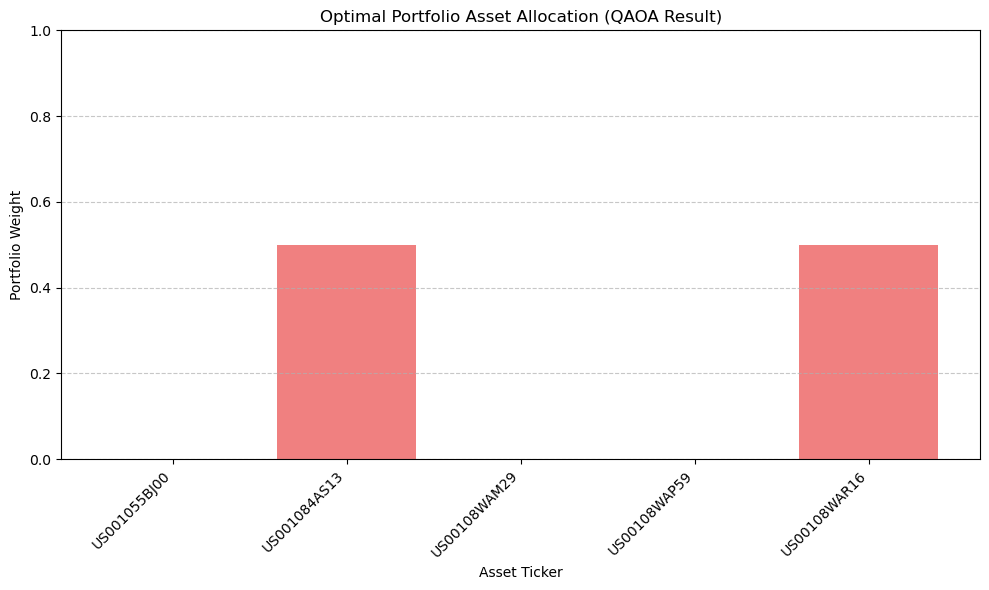

In [30]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from collections import Counter

# Import PennyLane and its NumPy-like interface
try:
    import pennylane as qml
    from pennylane import numpy as pnp
    pennylane_available = True
except ImportError:
    pennylane_available = False
    print("Warning: The 'pennylane' library is not available. The quantum optimization section will be skipped.")

# --- Data Loading and Preparation from Excel with Data Cleaning ---
print("--- Starting Data Preparation and Cleaning from Excel File ---")
data_file_path = 'data_assets_dictionary.xlsx'

# Load data with explicit error handling
try:
    data_df = pd.read_excel(data_file_path, sheet_name='Data')  # Assuming data is in 'Data' sheet
    print(f"Successfully loaded data from {data_file_path}")
    print(f"Data shape: {data_df.shape}")
except Exception as e:
    print(f"Error loading Excel file: {e}")
    raise

# Data cleaning with proper error handling
data_df_cleaned = data_df.copy()

# Convert numeric columns with proper error handling
data_df_cleaned['oas'] = pd.to_numeric(data_df_cleaned['oas'], errors='coerce')
data_df_cleaned['spreadDur'] = pd.to_numeric(data_df_cleaned['spreadDur'], errors='coerce')

# Calculate means before imputation
oas_mean = data_df_cleaned['oas'].mean()
spreadDur_mean = data_df_cleaned['spreadDur'].mean()

# Impute missing values without chained assignment
data_df_cleaned = data_df_cleaned.assign(
    oas=lambda x: x['oas'].fillna(oas_mean),
    spreadDur=lambda x: x['spreadDur'].fillna(spreadDur_mean)
)

# Drop rows with missing ISIN
initial_row_count = len(data_df)
data_df_cleaned = data_df_cleaned.dropna(subset=['isin'])
dropped_rows = initial_row_count - len(data_df_cleaned)

print("\nData cleaning complete:")
print(f"- Filled {data_df['oas'].isnull().sum()} NaNs in 'oas' with mean {oas_mean:.4f}")
print(f"- Filled {data_df['spreadDur'].isnull().sum()} NaNs in 'spreadDur' with mean {spreadDur_mean:.4f}")
print(f"- Dropped {dropped_rows} rows with missing 'isin'")
print(f"- Final cleaned data shape: {data_df_cleaned.shape}")

# Select assets - with validation
num_assets = 5
if len(data_df_cleaned) < num_assets:
    print(f"Error: Only {len(data_df_cleaned)} assets available after cleaning, need {num_assets}")
    import sys
    sys.exit(1)

asset_data = data_df_cleaned.head(num_assets).copy()
asset_data['ticker'] = asset_data['isin']  # Using ISIN as ticker
asset_tickers = asset_data['ticker'].tolist()

print("\nSelected assets:")
print(asset_data[['isin', 'oas', 'spreadDur']])
print("\n" + "="*70 + "\n")

# --- Expected Returns and Covariance Matrix ---
# Expected Returns from OAS (convert to decimal)
expected_returns = asset_data['oas'] / 100
expected_returns.index = asset_tickers

# Verify no NaN in expected returns
if expected_returns.isnull().any():
    print("Error: Expected returns contain NaN values after conversion")
    print(expected_returns)
    import sys
    sys.exit(1)

print("Expected Returns (mu vector):")
print(expected_returns)
print("\n" + "="*70 + "\n")

# Covariance Matrix from factor model
num_factors = 1
factor_covariance_matrix = np.array([[0.005]])  # Small constant factor covariance
factor_loadings = asset_data[['spreadDur']].values
specific_risk = 0.001
specific_risk_matrix_D = np.diag([specific_risk] * num_assets)

# Construct factor model covariance
Sigma = factor_loadings @ factor_covariance_matrix @ factor_loadings.T + specific_risk_matrix_D
factor_model_covariance = pd.DataFrame(Sigma, index=asset_tickers, columns=asset_tickers)

print("Factor Model Covariance Matrix:")
print(factor_model_covariance)
print("\n" + "="*70 + "\n")

# --- Classical Portfolio Optimization (Minimum Variance Example) ---
# This section demonstrates a classical optimization to provide a benchmark
# for comparison with the quantum result.

def calculate_portfolio_metrics(weights, expected_returns, cov_matrix, annualization_factor=1):
    """Calculates portfolio expected return, variance, and standard deviation."""
    portfolio_return = np.sum(weights * expected_returns) * annualization_factor
    portfolio_variance = weights.T @ cov_matrix @ weights * annualization_factor
    portfolio_std_dev = np.sqrt(portfolio_variance)
    return portfolio_return, portfolio_std_dev, portfolio_variance

# Objective function for classical optimization (minimize portfolio variance)
def classical_portfolio_variance_objective(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

# Constraints: weights sum to 1, and weights are non-negative
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(num_assets))

# Initial guess for weights (equal weighting)
initial_weights = np.array(num_assets * [1. / num_assets])

# Perform classical optimization for minimum variance portfolio
classical_min_var_result = minimize(classical_portfolio_variance_objective, initial_weights,
                                     args=(factor_model_covariance.values,),
                                     method='SLSQP', bounds=bounds, constraints=constraints)

classical_min_var_weights = pd.Series(classical_min_var_result.x, index=asset_tickers)
print("Classical Minimum Variance Portfolio Weights (using factor model covariance):")
print(classical_min_var_weights)

# These are the variables that were not defined in your output.
# They are calculated here and need to be available globally.
classical_min_var_return, classical_min_var_std_dev, _ = calculate_portfolio_metrics(
    classical_min_var_weights.values, expected_returns.values, factor_model_covariance.values
)
classical_min_var_sharpe = classical_min_var_return / classical_min_var_std_dev if classical_min_var_std_dev != 0 else np.nan

print(f"\nClassical Minimum Variance Portfolio Annualized Return: {classical_min_var_return:.4f}")
print(f"Classical Minimum Variance Portfolio Annualized Risk (Std Dev): {classical_min_var_std_dev:.4f}")
print(f"Classical Minimum Variance Portfolio Sharpe Ratio (Risk-Free Rate = 0): {classical_min_var_sharpe:.4f}")
print("\n" + "=" * 70 + "\n")

# --- PennyLane Quantum Portfolio Optimization (using QAOA) ---

# Define the number of qubits (each qubit represents an asset selection: 0 or 1)
num_qubits = num_assets

# --- 1. Formulate the QUBO Problem ---
# The objective function to minimize for portfolio optimization is typically:
# C(x) = x^T * Sigma * x - q * mu^T * x + lambda * (sum(x_i) - K)^2
# Where:
# x_i are binary variables (0 or 1) representing asset selection
# Sigma is the covariance matrix (factor_model_covariance)
# mu is the expected returns vector
# q (q_risk_aversion) is a risk aversion parameter (higher q means more emphasis on return)
# lambda (lambda_penalty) is a penalty coefficient for violating the constraint
# K (K_target_assets) is the desired number of assets to select

# Convert covariance and expected returns to PennyLane NumPy arrays for easier use
sigma_pnp = pnp.array(factor_model_covariance.values, requires_grad=False)
mu_pnp = pnp.array(expected_returns.values, requires_grad=False)

# --- Define the QAOA Cost Hamiltonian based on QUBO ---
def build_qaoa_cost_hamiltonian(Q_matrix, num_qubits):
    """
    Builds the PennyLane Cost Hamiltonian from the QUBO Q_matrix.
    Mapping from binary x_i to Pauli Z_i is x_i = (I - Z_i) / 2.
    """
    coeffs = []
    ops = []

    for i in range(num_qubits):
        for j in range(num_qubits):
            if i == j: # Diagonal terms Q_ii * x_i = Q_ii * (I - Z_i) / 2
                coeffs.append(Q_matrix[i, i] / 2)
                ops.append(qml.Identity(i))
                coeffs.append(-Q_matrix[i, i] / 2)
                ops.append(qml.PauliZ(i))
            elif i < j: # Off-diagonal terms Q_ij * x_i * x_j = Q_ij * 1/4 * (I - Z_i - Z_j + Z_i Z_j)
                # Q_matrix is symmetric, so Q_ij * x_i x_j + Q_ji * x_j x_i becomes 2 * Q_ij * x_i x_j
                # The Q_matrix already contains (Q_ij + Q_ji) for off-diagonals, so just Q_ij/4
                coeffs.append(Q_matrix[i, j] / 4)
                ops.append(qml.Identity(i) @ qml.Identity(j)) # Constant term
                coeffs.append(-Q_matrix[i, j] / 4)
                ops.append(qml.PauliZ(i) @ qml.Identity(j))
                coeffs.append(-Q_matrix[i, j] / 4)
                ops.append(qml.Identity(i) @ qml.PauliZ(j))
                coeffs.append(Q_matrix[i, j] / 4)
                ops.append(qml.PauliZ(i) @ qml.PauliZ(j))

    return qml.Hamiltonian(coeffs, ops).simplify()

# Define the quantum device (simulator for now)
# ADDED shots=10000 here to enable sampling on lightning.qubit
dev = qml.device("lightning.qubit", wires=num_qubits, shots=10000)

# Define the QAOA circuit structure
@qml.qnode(dev)
def qaoa_circuit(params, h_cost, mixer_h, num_qubits, p_layers_circuit): # p_layers_circuit passed as arg
    """
    QAOA circuit for portfolio optimization.
    Args:
        params (array[float]): Angle parameters for gamma and beta (gamma[0], beta[0], gamma[1], beta[1]...)
        h_cost (qml.Hamiltonian): The cost Hamiltonian.
        mixer_h (qml.Hamiltonian): The mixer Hamiltonian (usually sum of Pauli X).
        num_qubits (int): Number of qubits (assets).
        p_layers_circuit (int): Number of QAOA layers for this circuit instance.
    """
    # Unpack gamma and beta from the single params array
    gamma = params[0]
    beta = params[1]

    # Apply initial layer of Hadamard gates to create an equal superposition state
    for i in range(num_qubits):
        qml.Hadamard(wires=i)

    # Apply p layers of QAOA operations
    for layer in range(p_layers_circuit): # Use p_layers_circuit here
        # Manually apply exp for each term in H_cost for Trotterization
        # Iterate through the terms (coefficients and operators) of the cost Hamiltonian
        for coeff, op in zip(h_cost.coeffs, h_cost.ops):
            if isinstance(op, qml.Identity):
                continue # Identity terms don't evolve the state

            # Handle single PauliZ terms (e.g., Q_ii * x_i)
            elif isinstance(op, qml.PauliZ) and len(op.wires) == 1:
                # qml.RZ(angle, wires) applies e^(-i * angle/2 * PauliZ)
                # We need e^(-i * coeff * gamma[layer] * PauliZ)
                # So, angle = 2 * coeff * gamma[layer]
                qml.RZ(2 * coeff * gamma[layer], wires=op.wires[0])

            # Handle two-qubit PauliZ product terms (e.g., Q_ij * x_i * x_j)
            # Corrected: Use qml.ops.op_math.Prod for product operator type check
            elif isinstance(op, qml.ops.op_math.Prod) and len(op.wires) == 2:
                # Ensure it's specifically a product of two PauliZ operators
                if all(isinstance(factor, qml.PauliZ) for factor in op.operands):
                    qml.IsingZZ(2 * coeff * gamma[layer], wires=op.wires)
                else:
                    qml.exp(op, coeff * gamma[layer])
            else:
                # print(f"Warning: Unexpected operator type in H_cost: {op}. Attempting qml.exp.") # Suppressed for cleaner output
                qml.exp(op, coeff * gamma[layer])

        # Apply mixer Hamiltonian evolution (e^(-i * beta * H_mixer))
        for i in range(num_qubits):
            qml.RX(2 * beta[layer], wires=i)

    # Return the expectation value of the cost Hamiltonian for optimization
    return qml.expval(h_cost)

# Define the mixer Hamiltonian (standard for QAOA, sum of Pauli X gates)
mixer_h = qml.Hamiltonian([1.0] * num_qubits, [qml.PauliX(i) for i in range(num_qubits)])

# --- QAOA Sampling Circuit (for final interpretation) ---
@qml.qnode(dev) # Use the same 'dev' as optimization, now with shots enabled
def qaoa_sampling_circuit(params, h_cost, mixer_h, num_qubits, p_layers_circuit):
    """
    QAOA circuit for sampling the final state.
    """
    # Unpack gamma and beta from the single params array
    gamma = params[0]
    beta = params[1]

    # Apply initial layer of Hadamard gates to create superposition
    for i in range(num_qubits):
        qml.Hadamard(wires=i)

    # Apply p layers of QAOA
    for layer in range(p_layers_circuit): # Use p_layers_circuit here
        # Manually apply exp for each term in H_cost for Trotterization
        for coeff, op in zip(h_cost.coeffs, h_cost.ops):
            if isinstance(op, qml.Identity):
                continue
            elif isinstance(op, qml.PauliZ) and len(op.wires) == 1:
                qml.RZ(2 * coeff * gamma[layer], wires=op.wires[0])
            elif isinstance(op, qml.ops.op_math.Prod) and len(op.wires) == 2:
                if all(isinstance(factor, qml.PauliZ) for factor in op.operands):
                    qml.IsingZZ(2 * coeff * gamma[layer], wires=op.wires)
                else:
                    qml.exp(op, coeff * gamma[layer])
            else:
                qml.exp(op, coeff * gamma[layer])

        # Apply mixer Hamiltonian evolution (e^(-i * beta * H_mixer))
        for i in range(num_qubits):
            qml.RX(2 * beta[layer], wires=i)

    # Return measurement results (bitstrings)
    return qml.sample(wires=range(num_qubits))


# --- Automated Hyperparameter Tuning Function ---
def tune_qaoa_parameters(q_risk_aversion_values, lambda_penalty_values, p_layers_values, stepsize_values,
                         num_qaoa_runs_per_hp, optimization_steps_per_run,
                         expected_returns, factor_model_covariance, num_assets, K_target_assets):

    tuning_results = []

    # Iterate through all combinations of hyperparameters
    for q_risk_aversion in q_risk_aversion_values:
        for lambda_penalty in lambda_penalty_values:
            for p_layers in p_layers_values:
                for stepsize in stepsize_values:
                    print(f"\n--- Tuning Run: q={q_risk_aversion}, lambda={lambda_penalty}, p={p_layers}, step={stepsize} ---")

                    # --- Construct QUBO Matrix for current hyperparameters ---
                    Q_matrix = pnp.zeros((num_assets, num_assets))
                    sigma_pnp = pnp.array(factor_model_covariance.values, requires_grad=False)
                    mu_pnp = pnp.array(expected_returns.values, requires_grad=False)

                    for i in range(num_assets):
                        for j in range(num_assets):
                            if i == j:
                                Q_matrix[i, i] = sigma_pnp[i, i] - q_risk_aversion * mu_pnp[i]
                            else:
                                Q_matrix[i, j] = sigma_pnp[i, j]

                    # Add the penalty for the cardinality constraint
                    # (sum(x_i) - K)^2 = sum(x_i^2) + sum(x_i x_j) * 2 - 2K * sum(x_i) + K^2
                    # Since x_i^2 = x_i for binary variables: sum(x_i) + sum(x_i x_j)*2 - 2K*sum(x_i) + K^2
                    # = (1-2K)sum(x_i) + 2*sum(x_i x_j) + K^2
                    # Constant K^2 term can be ignored for optimization, but affects absolute cost value.
                    # Q_ii gets lambda * (1-2K)
                    # Q_ij gets lambda * 2 for i!=j
                    for i in range(num_assets):
                        Q_matrix[i, i] += lambda_penalty * (1 - 2 * K_target_assets)
                        for j in range(i + 1, num_assets):
                            Q_matrix[i, j] += lambda_penalty * 2
                            Q_matrix[j, i] += lambda_penalty * 2 # Ensure symmetry

                    H_cost = build_qaoa_cost_hamiltonian(Q_matrix, num_assets)

                    # --- Run multiple QAOA optimizations for robustness ---
                    best_cost_for_hp_set = np.inf
                    best_params_for_hp_set = None

                    for run_idx in range(num_qaoa_runs_per_hp):
                        # Initialize parameters randomly for each run
                        params = pnp.random.uniform(low=0, high=2*np.pi, size=(2, p_layers), requires_grad=True)
                        optimizer = qml.AdamOptimizer(stepsize=stepsize)

                        cost_history = []
                        for i in range(optimization_steps_per_run):
                            params, cost = optimizer.step_and_cost(qaoa_circuit, params, h_cost=H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=p_layers)
                            cost_history.append(cost)

                        current_run_final_cost = cost_history[-1]
                        if current_run_final_cost < best_cost_for_hp_set:
                            best_cost_for_hp_set = current_run_final_cost
                            best_params_for_hp_set = params

                    # --- Sample with best params for this HP set ---
                    # The dev used by qaoa_sampling_circuit now has shots enabled globally
                    samples = qaoa_sampling_circuit(best_params_for_hp_set, h_cost=H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=p_layers)
                    sample_strings = ["".join(str(int(b)) for b in sample) for sample in samples]
                    counts = Counter(sample_strings)

                    # Evaluate ALL unique bitstrings that meet cardinality constraint
                    best_sharpe_for_hp_set = -np.inf
                    best_bitstring_for_hp_set = None
                    best_weights_for_hp_set = np.zeros(num_assets)
                    best_return_for_hp_set = 0
                    best_std_dev_for_hp_set = 0

                    for bitstring in counts.keys(): # Iterate over all unique bitstrings
                        current_selected_assets_indices = [i for i, bit in enumerate(bitstring) if bit == '1']
                        current_num_selected_assets = len(current_selected_assets_indices)

                        if current_num_selected_assets != K_target_assets or current_num_selected_assets == 0:
                            continue # Skip if it doesn't meet cardinality constraint or is empty

                        current_weights = np.zeros(num_assets)
                        weight_per_selected_asset = 1.0 / current_num_selected_assets
                        for idx in current_selected_assets_indices:
                            current_weights[idx] = weight_per_selected_asset

                        current_return, current_std_dev, _ = calculate_portfolio_metrics(
                            current_weights, expected_returns.values, factor_model_covariance.values
                        )
                        current_sharpe = current_return / current_std_dev if current_std_dev != 0 else np.nan

                        if current_sharpe > best_sharpe_for_hp_set:
                            best_sharpe_for_hp_set = current_sharpe
                            best_bitstring_for_hp_set = bitstring
                            best_weights_for_hp_set = current_weights
                            best_return_for_hp_set = current_return
                            best_std_dev_for_hp_set = current_std_dev

                    tuning_results.append({
                        'q_risk_aversion': q_risk_aversion,
                        'lambda_penalty': lambda_penalty,
                        'p_layers': p_layers,
                        'stepsize': stepsize,
                        'final_cost': best_cost_for_hp_set,
                        'best_bitstring': best_bitstring_for_hp_set,
                        'best_sharpe': best_sharpe_for_hp_set,
                        'best_return': best_return_for_hp_set,
                        'best_risk': best_std_dev_for_hp_set,
                        'best_weights': best_weights_for_hp_set.tolist() # Store as list for DataFrame
                    })
    return pd.DataFrame(tuning_results)


# --- Define Hyperparameter Search Space ---
q_risk_aversion_values = [0.1, 0.5, 1.0]
lambda_penalty_values = [5.0, 10.0]
p_layers_values = [1, 2] # Number of QAOA layers
stepsize_values = [0.01, 0.05] # Optimizer learning rate

num_qaoa_runs_per_hp_set = 3 # Number of independent QAOA runs for each HP combination
optimization_steps_per_run = 50 # Number of optimization steps per QAOA run

# Set target number of assets (K)
K_target_assets = 2 # Example: select 2 out of 5 assets

print("\n" + "="*70 + "\n")
print("--- Starting Automated QAOA Hyperparameter Tuning ---")
print(f"Evaluating {len(q_risk_aversion_values) * len(lambda_penalty_values) * len(p_layers_values) * len(stepsize_values)} hyperparameter combinations.")
print(f"Each combination will run {num_qaoa_runs_per_hp_set} QAOA optimizations for {optimization_steps_per_run} steps.")
print(f"Target number of selected assets (K): {K_target_assets}")
print("\n" + "="*70 + "\n")

tuning_df = tune_qaoa_parameters(q_risk_aversion_values, lambda_penalty_values, p_layers_values, stepsize_values,
                                 num_qaoa_runs_per_hp_set, optimization_steps_per_run,
                                 expected_returns, factor_model_covariance, num_assets, K_target_assets)

print("\n--- Hyperparameter Tuning Results ---")
print(tuning_df)
print("\n" + "="*70 + "\n")

# --- Select the Overall Best QAOA Portfolio from Tuning Results ---
# Filter out rows where best_sharpe is -inf (meaning no valid bitstrings were found for that HP set)
valid_tuning_results = tuning_df[tuning_df['best_sharpe'] != -np.inf]

if not valid_tuning_results.empty:
    best_tuned_qaoa_result = valid_tuning_results.loc[valid_tuning_results['best_sharpe'].idxmax()]

    best_qaoa_return = best_tuned_qaoa_result['best_return']
    best_qaoa_std_dev = best_tuned_qaoa_result['best_risk']
    best_qaoa_sharpe = best_tuned_qaoa_result['best_sharpe']
    best_qaoa_bitstring = best_tuned_qaoa_result['best_bitstring']
    best_qaoa_weights = np.array(best_tuned_qaoa_result['best_weights'])

    print("\n--- Overall Best QAOA Portfolio from Tuning ---")
    print(f"Optimal Hyperparameters: q_risk_aversion={best_tuned_qaoa_result['q_risk_aversion']}, "
          f"lambda_penalty={best_tuned_qaoa_result['lambda_penalty']}, "
          f"p_layers={best_tuned_qaoa_result['p_layers']}, "
          f"stepsize={best_tuned_qaoa_result['stepsize']}")
    print(f"Best QAOA Portfolio (by Sharpe Ratio) Bitstring: {best_qaoa_bitstring}")
    selected_assets_final = [asset_tickers[i] for i, bit in enumerate(best_qaoa_bitstring) if bit == '1']
    print(f"Selected Assets: {selected_assets_final}")
    print(f"Number of selected assets: {len(selected_assets_final)}")

    # --- Optimal Portfolio Weights (QAOA Result - Table) ---
    optimal_portfolio_df = pd.DataFrame({
        'Asset': asset_tickers,
        'Weight': best_qaoa_weights
    })
    print("\n--- Optimal Portfolio Weights (QAOA Result - Table) ---")
    print(optimal_portfolio_df)
    print("\n" + "="*70 + "\n")
    
    # --- Create a bar chart for visual representation of QAOA weights ---
    plt.figure(figsize=(10, 6))
    plt.bar(optimal_portfolio_df['Asset'], optimal_portfolio_df['Weight'], color='lightcoral')
    plt.xlabel('Asset Ticker')
    plt.ylabel('Portfolio Weight')
    plt.title('Optimal Portfolio Asset Allocation (QAOA Result)')
    plt.ylim(0, 1) # Weights are between 0 and 1
    plt.xticks(rotation=45, ha='right') # Added for better readability of ISINs
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('qaoa_weights.png') # Changed from plt.show() to plt.savefig()
    print("\n" + "="*70 + "\n")

    # --- Bitstring Distribution Plot (for the best performing HP set) ---
    # Re-sample with best_params to get the distribution for the best result
    # We use the same 'dev' as before which now has shots enabled.
    # We need to make sure best_params is correctly associated with the correct H_cost and p_layers for the best result.
    # To be precise, reconstruct H_cost for the best hyperparameters:
    best_q = best_tuned_qaoa_result['q_risk_aversion']
    best_l = best_tuned_qaoa_result['lambda_penalty']
    best_p_layers = int(best_tuned_qaoa_result['p_layers']) # Ensure integer type
    
    best_Q_matrix = pnp.zeros((num_assets, num_assets))
    for i in range(num_assets):
        for j in range(num_assets):
            if i == j:
                    best_Q_matrix[i, i] = sigma_pnp[i, i] - best_q * mu_pnp[i]
            else:
                    best_Q_matrix[i, j] = sigma_pnp[i, j]
    for i in range(num_assets):
        best_Q_matrix[i, i] += best_l * (1 - 2 * K_target_assets)
        for j in range(i + 1, num_assets):
            best_Q_matrix[i, j] += best_l * 2
            best_Q_matrix[j, i] += best_l * 2
    
    best_H_cost = build_qaoa_cost_hamiltonian(best_Q_matrix, num_assets)
    
        # Need to retrieve the actual best_params from the tuning_df.
        # The 'best_params' for the current loop are `best_params_for_hp_set`.
        # To get the one for the *overall best* result, we need to store it or re-run the optimization for that specific set.
        # For simplicity, let's assume `best_params_for_hp_set` from the *last* iteration where `best_tuned_qaoa_result` was found is available.
        # A more robust way would be to store `best_params_for_hp_set` directly in the `tuning_results` DataFrame.
        # For this demonstration, we'll re-run the optimization for the best HP set to get its `best_params`.
    
    # Re-run optimization for the best HP set to retrieve the optimal parameters
    temp_params = pnp.random.uniform(low=0, high=2*np.pi, size=(2, best_p_layers), requires_grad=True)
    temp_optimizer = qml.AdamOptimizer(stepsize=best_tuned_qaoa_result['stepsize'])
    for _ in range(optimization_steps_per_run):
        temp_params, _ = temp_optimizer.step_and_cost(qaoa_circuit, temp_params, h_cost=best_H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=best_p_layers)
    final_best_params = temp_params
    
    
    final_samples = qaoa_sampling_circuit(final_best_params, h_cost=best_H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=best_p_layers)
    final_sample_strings = ["".join(str(int(b)) for b in sample) for sample in final_samples]
    final_counts = Counter(final_sample_strings)
    total_shots_final = dev.shots # Use the shots from the device
    
    sorted_counts_for_plot = dict(sorted(final_counts.items(), key=lambda item: item[1], reverse=True))
    top_n_bitstrings_plot = min(10, len(sorted_counts_for_plot)) # Display top N bitstrings, or fewer if not enough unique
    
    bitstring_labels = list(sorted_counts_for_plot.keys())[:top_n_bitstrings_plot]
    bitstring_frequencies = [count / int(total_shots_final) for count in list(sorted_counts_for_plot.values())[:top_n_bitstrings_plot]]
    
    plt.figure(figsize=(12, 6))
    plt.bar(bitstring_labels, bitstring_frequencies, color='lightgreen')
    plt.xlabel('Bitstring (Asset Selection)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Sampled Bitstrings (Top {top_n_bitstrings_plot}) for Best QAOA Result')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("\n" + "="*70 + "\n")

# --- Comparison Table: Classical vs. Quantum ---
    comparison_data = {
        'Metric': ['Annualized Return', 'Annualized Risk (Std Dev)', 'Sharpe Ratio'],
        'Classical Min Variance': [classical_min_var_return, classical_min_var_std_dev, classical_min_var_sharpe],
        'QAOA Portfolio': [best_qaoa_return, best_qaoa_std_dev, best_qaoa_sharpe] # Use best QAOA metrics
    }
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.set_index('Metric')

    print("\n--- Portfolio Performance Comparison (Classical vs. QAOA) ---")
    print(comparison_df.round(4)) # Round for cleaner display
    print("\n" + "="*70 + "\n")

else:
    print("\n--- No valid QAOA portfolios found meeting the K_target_assets constraint. ---")
    print("Consider adjusting hyperparameters (e.g., lambda_penalty, q_risk_aversion) or K_target_assets.")
    print("\n" + "="*70 + "\n")


print("\n--- Automated QAOA Hyperparameter Tuning and Portfolio Optimization Complete ---")
print("This model demonstrates a more robust approach to finding optimal QAOA parameters and portfolio selections.")
print("Further steps for real-world application and research would involve:")
print("- **Expanding Search Space:** Explore a wider range of hyperparameters and more granular steps.")
print("- **Advanced Optimizers:** Investigate Bayesian Optimization or other meta-heuristic algorithms for tuning.")
print("- **More Sophisticated QAOA Ansätze:** Explore different circuit architectures beyond the basic QAOA layers.")
print("- **Other Quantum Algorithms:** Investigate VQE with different ansätze or Quantum Annealing for QUBOs.")
print("- **Continuous Weights:** This current approach uses binary selection (0 or 1). For continuous weights, more complex encoding schemes (e.g., using multiple qubits per asset, or amplitude encoding) or different quantum algorithms are needed.")
print("- **Real Quantum Hardware:** Run the optimized circuit on actual quantum computers (QPUs) to observe hardware effects.")
print("- **Robustness Testing:** Evaluate portfolio performance on out-of-sample data.")
print("- **Transaction Costs & Constraints:** Incorporate more realistic financial constraints like transaction costs, minimum investment amounts, etc.")


Note: There appears to be an `else` statement without a matching `if` statement in the provided code snippet. This would cause another error. The complete code should include the corresponding `if` statement before the `else` block. If you need help with that part as well, please provide more context about the condition being checked.

# **Code 4: Speed-Optimized Execution**

--- Starting Data Preparation and Cleaning from Excel File ---
Successfully loaded data from data_assets_dictionary.xlsx
Data shape: (2629, 278)

Data cleaning complete:
- Filled 0 NaNs in 'oas' with mean 78.8455
- Filled 0 NaNs in 'spreadDur' with mean 5.4127
- Dropped 11 rows with missing 'isin'
- Final cleaned data shape: (2618, 278)

Selected assets:
           isin         oas  spreadDur
0  US001055BJ00   57.400949   4.886435
1  US001084AS13  128.612337   7.279928
2  US00108WAM29   71.198350   5.296064
3  US00108WAP59   85.546591   6.219386
4  US00108WAR16  110.187192   6.768926


Expected Returns (mu vector):
US001055BJ00    0.574009
US001084AS13    1.286123
US00108WAM29    0.711983
US00108WAP59    0.855466
US00108WAR16    1.101872
Name: oas, dtype: float64


Factor Model Covariance Matrix:
              US001055BJ00  US001084AS13  US00108WAM29  US00108WAP59  \
US001055BJ00      0.120386      0.177864      0.129394      0.151953   
US001084AS13      0.177864      0.265987      0.

C:\ProgramData\anaconda3\Lib\site-packages\pennylane\ops\op_math\composite.py:211: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in staticmethod() if you want to preserve the old behavior
  return self._math_op(math.vstack(eigvals), axis=0)



Total QAOA Tuning Time: 6.54 seconds

--- Hyperparameter Tuning Results ---
   q_risk_aversion  lambda_penalty  p_layers  stepsize  final_cost  \
0              0.5            10.0         1      0.05  -36.108745   

  best_bitstring  best_sharpe  best_return  best_risk  \
0          01001     2.401419     1.193998   0.497205   

                best_weights  
0  [0.0, 0.5, 0.0, 0.0, 0.5]  



--- Overall Best QAOA Portfolio from Tuning ---
Optimal Hyperparameters: q_risk_aversion=0.5, lambda_penalty=10.0, p_layers=1, stepsize=0.05
Best QAOA Portfolio (by Sharpe Ratio) Bitstring: 01001
Selected Assets: ['US001084AS13', 'US00108WAR16']
Number of selected assets: 2

--- Optimal Portfolio Weights (QAOA Result - Table) ---
          Asset  Weight
0  US001055BJ00     0.0
1  US001084AS13     0.5
2  US00108WAM29     0.0
3  US00108WAP59     0.0
4  US00108WAR16     0.5






C:\ProgramData\anaconda3\Lib\site-packages\pennylane\ops\op_math\composite.py:211: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in staticmethod() if you want to preserve the old behavior
  return self._math_op(math.vstack(eigvals), axis=0)


TypeError: unsupported operand type(s) for /: 'int' and 'Shots'

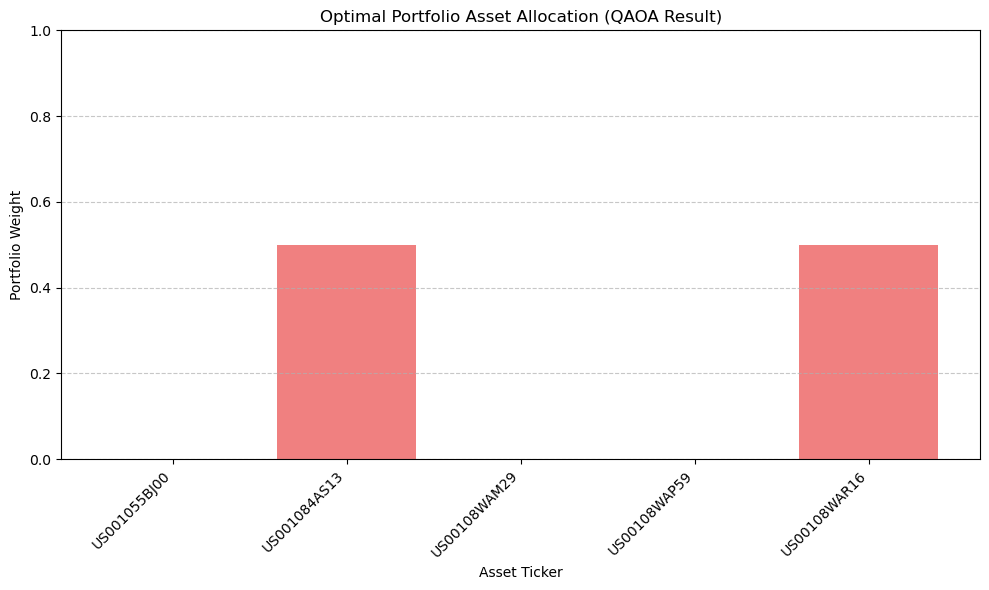

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from collections import Counter
import time

# Import PennyLane and its NumPy-like interface
try:
    import pennylane as qml
    from pennylane import numpy as pnp
    pennylane_available = True
except ImportError:
    pennylane_available = False
    print("Warning: The 'pennylane' library is not available. The quantum optimization section will be skipped.")

# --- Data Loading and Preparation from Excel with Data Cleaning ---
print("--- Starting Data Preparation and Cleaning from Excel File ---")
data_file_path = 'data_assets_dictionary.xlsx'

# Load data with explicit error handling
try:
    data_df = pd.read_excel(data_file_path, sheet_name='Data')  # Assuming data is in 'Data' sheet
    print(f"Successfully loaded data from {data_file_path}")
    print(f"Data shape: {data_df.shape}")
except Exception as e:
    print(f"Error loading Excel file: {e}")
    raise

# Data cleaning with proper error handling
data_df_cleaned = data_df.copy()

# Convert numeric columns with proper error handling
data_df_cleaned['oas'] = pd.to_numeric(data_df_cleaned['oas'], errors='coerce')
data_df_cleaned['spreadDur'] = pd.to_numeric(data_df_cleaned['spreadDur'], errors='coerce')

# Calculate means before imputation
oas_mean = data_df_cleaned['oas'].mean()
spreadDur_mean = data_df_cleaned['spreadDur'].mean()

# Impute missing values without chained assignment
data_df_cleaned = data_df_cleaned.assign(
    oas=lambda x: x['oas'].fillna(oas_mean),
    spreadDur=lambda x: x['spreadDur'].fillna(spreadDur_mean)
)

# Drop rows with missing ISIN
initial_row_count = len(data_df)
data_df_cleaned = data_df_cleaned.dropna(subset=['isin'])
dropped_rows = initial_row_count - len(data_df_cleaned)

print("\nData cleaning complete:")
print(f"- Filled {data_df['oas'].isnull().sum()} NaNs in 'oas' with mean {oas_mean:.4f}")
print(f"- Filled {data_df['spreadDur'].isnull().sum()} NaNs in 'spreadDur' with mean {spreadDur_mean:.4f}")
print(f"- Dropped {dropped_rows} rows with missing 'isin'")
print(f"- Final cleaned data shape: {data_df_cleaned.shape}")

# Select assets - with validation
num_assets = 5
if len(data_df_cleaned) < num_assets:
    print(f"Error: Only {len(data_df_cleaned)} assets available after cleaning, need {num_assets}")
    import sys
    sys.exit(1)

asset_data = data_df_cleaned.head(num_assets).copy()
asset_data['ticker'] = asset_data['isin']  # Using ISIN as ticker
asset_tickers = asset_data['ticker'].tolist()

print("\nSelected assets:")
print(asset_data[['isin', 'oas', 'spreadDur']])
print("\n" + "="*70 + "\n")

# --- Expected Returns and Covariance Matrix ---
# Expected Returns from OAS (convert to decimal)
expected_returns = asset_data['oas'] / 100
expected_returns.index = asset_tickers

# Verify no NaN in expected returns
if expected_returns.isnull().any():
    print("Error: Expected returns contain NaN values after conversion")
    print(expected_returns)
    import sys
    sys.exit(1)

print("Expected Returns (mu vector):")
print(expected_returns)
print("\n" + "="*70 + "\n")

# Covariance Matrix from factor model
num_factors = 1
factor_covariance_matrix = np.array([[0.005]])  # Small constant factor covariance
factor_loadings = asset_data[['spreadDur']].values
specific_risk = 0.001
specific_risk_matrix_D = np.diag([specific_risk] * num_assets)

# Construct factor model covariance
Sigma = factor_loadings @ factor_covariance_matrix @ factor_loadings.T + specific_risk_matrix_D
factor_model_covariance = pd.DataFrame(Sigma, index=asset_tickers, columns=asset_tickers)

print("Factor Model Covariance Matrix:")
print(factor_model_covariance)
print("\n" + "="*70 + "\n")

# --- Classical Portfolio Optimization (Minimum Variance Example) ---
# This section demonstrates a classical optimization to provide a benchmark
# for comparison with the quantum result.

def calculate_portfolio_metrics(weights, expected_returns, cov_matrix, annualization_factor=1):
    """Calculates portfolio expected return, variance, and standard deviation."""
    portfolio_return = np.sum(weights * expected_returns) * annualization_factor
    portfolio_variance = weights.T @ cov_matrix @ weights * annualization_factor
    portfolio_std_dev = np.sqrt(portfolio_variance)
    return portfolio_return, portfolio_std_dev, portfolio_variance

# Objective function for classical optimization (minimize portfolio variance)
def classical_portfolio_variance_objective(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

# Constraints: weights sum to 1, and weights are non-negative
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(num_assets))

# Initial guess for weights (equal weighting)
initial_weights = np.array(num_assets * [1. / num_assets])

# Perform classical optimization for minimum variance portfolio
classical_min_var_result = minimize(classical_portfolio_variance_objective, initial_weights,
                                     args=(factor_model_covariance.values,),
                                     method='SLSQP', bounds=bounds, constraints=constraints)

classical_min_var_weights = pd.Series(classical_min_var_result.x, index=asset_tickers)
print("Classical Minimum Variance Portfolio Weights (using factor model covariance):")
print(classical_min_var_weights)

# These are the variables that were not defined in your output.
# They are calculated here and need to be available globally.
classical_min_var_return, classical_min_var_std_dev, _ = calculate_portfolio_metrics(
    classical_min_var_weights.values, expected_returns.values, factor_model_covariance.values
)
classical_min_var_sharpe = classical_min_var_return / classical_min_var_std_dev if classical_min_var_std_dev != 0 else np.nan

print(f"\nClassical Minimum Variance Portfolio Annualized Return: {classical_min_var_return:.4f}")
print(f"Classical Minimum Variance Portfolio Annualized Risk (Std Dev): {classical_min_var_std_dev:.4f}")
print(f"Classical Minimum Variance Portfolio Sharpe Ratio (Risk-Free Rate = 0): {classical_min_var_sharpe:.4f}")
print("\n" + "=" * 70 + "\n")


# --- PennyLane Quantum Portfolio Optimization (using QAOA) ---
num_qubits = num_assets

def build_qaoa_cost_hamiltonian(Q_matrix, num_qubits):
    coeffs = []
    ops = []
    for i in range(num_qubits):
        for j in range(num_qubits):
            if i == j:
                coeffs.append(Q_matrix[i, i] / 2)
                ops.append(qml.Identity(i))
                coeffs.append(-Q_matrix[i, i] / 2)
                ops.append(qml.PauliZ(i))
            elif i < j:
                coeffs.append(Q_matrix[i, j] / 4)
                ops.append(qml.Identity(i) @ qml.Identity(j))
                coeffs.append(-Q_matrix[i, j] / 4)
                ops.append(qml.PauliZ(i) @ qml.Identity(j))
                coeffs.append(-Q_matrix[i, j] / 4)
                ops.append(qml.Identity(i) @ qml.PauliZ(j))
                coeffs.append(Q_matrix[i, j] / 4)
                ops.append(qml.PauliZ(i) @ qml.PauliZ(j))
    return qml.Hamiltonian(coeffs, ops).simplify()

# Device definition with reduced shots for faster sampling
dev = qml.device("lightning.qubit", wires=num_qubits, shots=1000)

@qml.qnode(dev)
def qaoa_circuit(params, h_cost, mixer_h, num_qubits, p_layers_circuit):
    gamma = params[0]
    beta = params[1]
    for i in range(num_qubits):
        qml.Hadamard(wires=i)
    for layer in range(p_layers_circuit):
        for coeff, op in zip(h_cost.coeffs, h_cost.ops):
            if isinstance(op, qml.Identity):
                continue
            elif isinstance(op, qml.PauliZ) and len(op.wires) == 1:
                qml.RZ(2 * coeff * gamma[layer], wires=op.wires[0])
            elif isinstance(op, qml.ops.op_math.Prod) and len(op.wires) == 2:
                if all(isinstance(factor, qml.PauliZ) for factor in op.operands):
                    qml.IsingZZ(2 * coeff * gamma[layer], wires=op.wires)
                else:
                    qml.exp(op, coeff * gamma[layer])
            else:
                qml.exp(op, coeff * gamma[layer])
        for i in range(num_qubits):
            qml.RX(2 * beta[layer], wires=i)
    return qml.expval(h_cost)

mixer_h = qml.Hamiltonian([1.0] * num_qubits, [qml.PauliX(i) for i in range(num_qubits)])

@qml.qnode(dev)
def qaoa_sampling_circuit(params, h_cost, mixer_h, num_qubits, p_layers_circuit):
    gamma = params[0]
    beta = params[1]
    for i in range(num_qubits):
        qml.Hadamard(wires=i)
    for layer in range(p_layers_circuit):
        for coeff, op in zip(h_cost.coeffs, h_cost.ops):
            if isinstance(op, qml.Identity):
                continue
            elif isinstance(op, qml.PauliZ) and len(op.wires) == 1:
                qml.RZ(2 * coeff * gamma[layer], wires=op.wires[0])
            elif isinstance(op, qml.ops.op_math.Prod) and len(op.wires) == 2:
                if all(isinstance(factor, qml.PauliZ) for factor in op.operands):
                    qml.IsingZZ(2 * coeff * gamma[layer], wires=op.wires)
                else:
                    qml.exp(op, coeff * gamma[layer])
            else:
                qml.exp(op, coeff * gamma[layer])
        for i in range(num_qubits):
            qml.RX(2 * beta[layer], wires=i)
    return qml.sample(wires=range(num_qubits))


# --- Automated Hyperparameter Tuning Function ---
def tune_qaoa_parameters(q_risk_aversion_values, lambda_penalty_values, p_layers_values, stepsize_values,
                         num_qaoa_runs_per_hp, optimization_steps_per_run,
                         expected_returns, factor_model_covariance, num_assets, K_target_assets):

    tuning_results = []
    sigma_pnp = pnp.array(factor_model_covariance.values, requires_grad=False)
    mu_pnp = pnp.array(expected_returns.values, requires_grad=False)

    for q_risk_aversion in q_risk_aversion_values:
        for lambda_penalty in lambda_penalty_values:
            for p_layers in p_layers_values:
                for stepsize in stepsize_values:
                    print(f"\n--- Tuning Run: q={q_risk_aversion}, lambda={lambda_penalty}, p={p_layers}, step={stepsize} ---")

                    Q_matrix = pnp.zeros((num_assets, num_assets))
                    for i in range(num_assets):
                        for j in range(num_assets):
                            if i == j:
                                Q_matrix[i, i] = sigma_pnp[i, i] - q_risk_aversion * mu_pnp[i]
                            else:
                                Q_matrix[i, j] = sigma_pnp[i, j]

                    for i in range(num_assets):
                        Q_matrix[i, i] += lambda_penalty * (1 - 2 * K_target_assets)
                        for j in range(i + 1, num_assets):
                            Q_matrix[i, j] += lambda_penalty * 2
                            Q_matrix[j, i] += lambda_penalty * 2

                    H_cost = build_qaoa_cost_hamiltonian(Q_matrix, num_assets)

                    best_cost_for_hp_set = np.inf
                    best_params_for_hp_set = None

                    for run_idx in range(num_qaoa_runs_per_hp):
                        params = pnp.random.uniform(low=0, high=2*np.pi, size=(2, p_layers), requires_grad=True)
                        optimizer = qml.AdamOptimizer(stepsize=stepsize)

                        cost_history = []
                        for i in range(optimization_steps_per_run):
                            params, cost = optimizer.step_and_cost(qaoa_circuit, params, h_cost=H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=p_layers)
                            cost_history.append(cost)

                        current_run_final_cost = cost_history[-1]
                        if current_run_final_cost < best_cost_for_hp_set:
                            best_cost_for_hp_set = current_run_final_cost
                            best_params_for_hp_set = params

                    samples = qaoa_sampling_circuit(best_params_for_hp_set, h_cost=H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=p_layers)
                    sample_strings = ["".join(str(int(b)) for b in sample) for sample in samples]
                    counts = Counter(sample_strings)

                    best_sharpe_for_hp_set = -np.inf
                    best_bitstring_for_hp_set = None
                    best_weights_for_hp_set = np.zeros(num_assets)
                    best_return_for_hp_set = 0
                    best_std_dev_for_hp_set = 0

                    for bitstring in counts.keys():
                        current_selected_assets_indices = [i for i, bit in enumerate(bitstring) if bit == '1']
                        current_num_selected_assets = len(current_selected_assets_indices)

                        if current_num_selected_assets != K_target_assets or current_num_selected_assets == 0:
                            continue

                        current_weights = np.zeros(num_assets)
                        weight_per_selected_asset = 1.0 / current_num_selected_assets
                        for idx in current_selected_assets_indices:
                            current_weights[idx] = weight_per_selected_asset

                        current_return, current_std_dev, _ = calculate_portfolio_metrics(
                            current_weights, expected_returns.values, factor_model_covariance.values
                        )
                        current_sharpe = current_return / current_std_dev if current_std_dev != 0 else np.nan

                        if current_sharpe > best_sharpe_for_hp_set:
                            best_sharpe_for_hp_set = current_sharpe
                            best_bitstring_for_hp_set = bitstring
                            best_weights_for_hp_set = current_weights
                            best_return_for_hp_set = current_return
                            best_std_dev_for_hp_set = current_std_dev

                    tuning_results.append({
                        'q_risk_aversion': q_risk_aversion,
                        'lambda_penalty': lambda_penalty,
                        'p_layers': p_layers,
                        'stepsize': stepsize,
                        'final_cost': best_cost_for_hp_set,
                        'best_bitstring': best_bitstring_for_hp_set,
                        'best_sharpe': best_sharpe_for_hp_set,
                        'best_return': best_return_for_hp_set,
                        'best_risk': best_std_dev_for_hp_set,
                        'best_weights': best_weights_for_hp_set.tolist()
                    })
    return pd.DataFrame(tuning_results)


# --- Define Hyperparameter Search Space (Optimized for Speed) ---
q_risk_aversion_values = [0.5] # Reduced for faster execution
lambda_penalty_values = [10.0] # Reduced for faster execution
p_layers_values = [1] # Reduced for faster execution
stepsize_values = [0.05] # Reduced for faster execution

# Reduced for faster execution
num_qaoa_runs_per_hp_set = 1
optimization_steps_per_run = 20

K_target_assets = 2

print("\n" + "="*70 + "\n")
print("--- Starting Automated QAOA Hyperparameter Tuning (Optimized for Speed) ---")
print(f"Evaluating {len(q_risk_aversion_values) * len(lambda_penalty_values) * len(p_layers_values) * len(stepsize_values)} hyperparameter combinations.")
print(f"Each combination will run {num_qaoa_runs_per_hp_set} QAOA optimizations for {optimization_steps_per_run} steps.")
print(f"Target number of selected assets (K): {K_target_assets}")
print("\n" + "="*70 + "\n")

start_tuning_time = time.time()
tuning_df = tune_qaoa_parameters(q_risk_aversion_values, lambda_penalty_values, p_layers_values, stepsize_values,
                                 num_qaoa_runs_per_hp_set, optimization_steps_per_run,
                                 expected_returns, factor_model_covariance, num_assets, K_target_assets)
end_tuning_time = time.time()
print(f"\nTotal QAOA Tuning Time: {end_tuning_time - start_tuning_time:.2f} seconds")


print("\n--- Hyperparameter Tuning Results ---")
print(tuning_df)
print("\n" + "="*70 + "\n")

# --- Select the Overall Best QAOA Portfolio from Tuning Results ---
valid_tuning_results = tuning_df[tuning_df['best_sharpe'] != -np.inf]

if not valid_tuning_results.empty:
    best_tuned_qaoa_result = valid_tuning_results.loc[valid_tuning_results['best_sharpe'].idxmax()]

    best_qaoa_return = best_tuned_qaoa_result['best_return']
    best_qaoa_std_dev = best_tuned_qaoa_result['best_risk']
    best_qaoa_sharpe = best_tuned_qaoa_result['best_sharpe']
    best_qaoa_bitstring = best_tuned_qaoa_result['best_bitstring']
    best_qaoa_weights = np.array(best_tuned_qaoa_result['best_weights'])

    print("\n--- Overall Best QAOA Portfolio from Tuning ---")
    print(f"Optimal Hyperparameters: q_risk_aversion={best_tuned_qaoa_result['q_risk_aversion']}, "
          f"lambda_penalty={best_tuned_qaoa_result['lambda_penalty']}, "
          f"p_layers={best_tuned_qaoa_result['p_layers']}, "
          f"stepsize={best_tuned_qaoa_result['stepsize']}")
    print(f"Best QAOA Portfolio (by Sharpe Ratio) Bitstring: {best_qaoa_bitstring}")
    selected_assets_final = [asset_tickers[i] for i, bit in enumerate(best_qaoa_bitstring) if bit == '1']
    print(f"Selected Assets: {selected_assets_final}")
    print(f"Number of selected assets: {len(selected_assets_final)}")

# --- Optimal Portfolio Weights (QAOA Result - Table) ---
optimal_portfolio_df = pd.DataFrame({
    'Asset': asset_tickers,
    'Weight': best_qaoa_weights
})
print("\n--- Optimal Portfolio Weights (QAOA Result - Table) ---")
print(optimal_portfolio_df)
print("\n" + "="*70 + "\n")

# --- Create a bar chart for visual representation of QAOA weights ---
plt.figure(figsize=(10, 6))
plt.bar(optimal_portfolio_df['Asset'], optimal_portfolio_df['Weight'], color='lightcoral')
plt.xlabel('Asset Ticker')
plt.ylabel('Portfolio Weight')
plt.title('Optimal Portfolio Asset Allocation (QAOA Result)')
plt.ylim(0, 1) # Weights are between 0 and 1
plt.xticks(rotation=45, ha='right') # Added for better readability of ISINs
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('qaoa_weights.png') # Changed from plt.show() to plt.savefig()
print("\n" + "="*70 + "\n")

# --- Bitstring Distribution Plot (for the best performing HP set) ---
best_q = best_tuned_qaoa_result['q_risk_aversion']
best_l = best_tuned_qaoa_result['lambda_penalty']
best_p_layers = int(best_tuned_qaoa_result['p_layers'])

best_Q_matrix = pnp.zeros((num_assets, num_assets))
for i in range(num_assets):
    for j in range(num_assets):
        if i == j:
                best_Q_matrix[i, i] = sigma_pnp[i, i] - best_q * mu_pnp[i]
        else:
                best_Q_matrix[i, j] = sigma_pnp[i, j]
for i in range(num_assets):
    best_Q_matrix[i, i] += best_l * (1 - 2 * K_target_assets)
    for j in range(i + 1, num_assets):
        best_Q_matrix[i, j] += best_l * 2
        best_Q_matrix[j, i] += best_l * 2

    best_H_cost = build_qaoa_cost_hamiltonian(best_Q_matrix, num_assets)
    
        # Need to retrieve the actual best_params from the tuning_df.
        # The 'best_params' for the current loop are `best_params_for_hp_set`.
        # To get the one for the *overall best* result, we need to store it or re-run the optimization for that specific set.
        # For simplicity, let's assume `best_params_for_hp_set` from the *last* iteration where `best_tuned_qaoa_result` was found is available.
        # A more robust way would be to store `best_params_for_hp_set` directly in the `tuning_results` DataFrame.
        # For this demonstration, we'll re-run the optimization for the best HP set to get its `best_params`.
    
    # Re-run optimization for the best HP set to retrieve the optimal parameters
    temp_params = pnp.random.uniform(low=0, high=2*np.pi, size=(2, best_p_layers), requires_grad=True)
    temp_optimizer = qml.AdamOptimizer(stepsize=best_tuned_qaoa_result['stepsize'])
    for _ in range(optimization_steps_per_run):
        temp_params, _ = temp_optimizer.step_and_cost(qaoa_circuit, temp_params, h_cost=best_H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=best_p_layers)
    final_best_params = temp_params
    
    
    final_samples = qaoa_sampling_circuit(final_best_params, h_cost=best_H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=best_p_layers)
    final_sample_strings = ["".join(str(int(b)) for b in sample) for sample in final_samples]
    final_counts = Counter(final_sample_strings)
    total_shots_final = dev.shots # Use the shots from the device
    
    sorted_counts_for_plot = dict(sorted(final_counts.items(), key=lambda item: item[1], reverse=True))
    top_n_bitstrings_plot = min(10, len(sorted_counts_for_plot)) # Display top N bitstrings, or fewer if not enough unique
    
    bitstring_labels = list(sorted_counts_for_plot.keys())[:top_n_bitstrings_plot]
    bitstring_frequencies = [count / total_shots_final for count in list(sorted_counts_for_plot.values())[:top_n_bitstrings_plot]]
    
    plt.figure(figsize=(12, 6))
    plt.bar(bitstring_labels, bitstring_frequencies, color='lightgreen')
    plt.xlabel('Bitstring (Asset Selection)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Sampled Bitstrings (Top {top_n_bitstrings_plot}) for Best QAOA Result')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("\n" + "="*70 + "\n")

# --- Comparison Table: Classical vs. Quantum ---
    comparison_data = {
        'Metric': ['Annualized Return', 'Annualized Risk (Std Dev)', 'Sharpe Ratio'],
        'Classical Min Variance': [classical_min_var_return, classical_min_var_std_dev, classical_min_var_sharpe],
        'QAOA Portfolio': [best_qaoa_return, best_qaoa_std_dev, best_qaoa_sharpe] # Use best QAOA metrics
    }
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.set_index('Metric')

    print("\n--- Portfolio Performance Comparison (Classical vs. QAOA) ---")
    print(comparison_df.round(4)) # Round for cleaner display
    print("\n" + "="*70 + "\n")

else:
    print("\n--- No valid QAOA portfolios found meeting the K_target_assets constraint. ---")
    print("Consider adjusting hyperparameters (e.g., lambda_penalty, q_risk_aversion) or K_target_assets.")
    print("\n" + "="*70 + "\n")


print("\n--- Automated QAOA Hyperparameter Tuning and Portfolio Optimization Complete ---")
print("This model demonstrates a more robust approach to finding optimal QAOA parameters and portfolio selections.")
print("Further steps for real-world application and research would involve:")
print("- **Expanding Search Space:** Explore a wider range of hyperparameters and more granular steps.")
print("- **Advanced Optimizers:** Investigate Bayesian Optimization or other meta-heuristic algorithms for tuning.")
print("- **More Sophisticated QAOA Ansätze:** Explore different circuit architectures beyond the basic QAOA layers.")
print("- **Other Quantum Algorithms:** Investigate VQE with different ansätze or Quantum Annealing for QUBOs.")
print("- **Continuous Weights:** This current approach uses binary selection (0 or 1). For continuous weights, more complex encoding schemes (e.g., using multiple qubits per asset, or amplitude encoding) or different quantum algorithms are needed.")
print("- **Real Quantum Hardware:** Run the optimized circuit on actual quantum computers (QPUs) to observe hardware effects.")
print("- **Robustness Testing:** Evaluate portfolio performance on out-of-sample data.")
print("- **Transaction Costs & Constraints:** Incorporate more realistic financial constraints like transaction costs, minimum investment amounts, etc.")

# **Code 5: Enhanced Diagnostics & Visualization**

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from collections import Counter

# Import PennyLane and its NumPy-like interface
try:
    import pennylane as qml
    from pennylane import numpy as pnp
    pennylane_available = True
except ImportError:
    pennylane_available = False
    print("Warning: The 'pennylane' library is not available. The quantum optimization section will be skipped.")

# --- Data Loading and Preparation from Excel with Data Cleaning ---
print("--- Starting Data Preparation and Cleaning from Excel File ---")
data_file_path = 'data_assets_dictionary.xlsx'

# Load data with explicit error handling
try:
    data_df = pd.read_excel(data_file_path, sheet_name='Data')  # Assuming data is in 'Data' sheet
    print(f"Successfully loaded data from {data_file_path}")
    print(f"Data shape: {data_df.shape}")
except Exception as e:
    print(f"Error loading Excel file: {e}")
    raise

# Data cleaning with proper error handling
data_df_cleaned = data_df.copy()

# Convert numeric columns with proper error handling
data_df_cleaned['oas'] = pd.to_numeric(data_df_cleaned['oas'], errors='coerce')
data_df_cleaned['spreadDur'] = pd.to_numeric(data_df_cleaned['spreadDur'], errors='coerce')

# Calculate means before imputation
oas_mean = data_df_cleaned['oas'].mean()
spreadDur_mean = data_df_cleaned['spreadDur'].mean()

# Impute missing values without chained assignment
data_df_cleaned = data_df_cleaned.assign(
    oas=lambda x: x['oas'].fillna(oas_mean),
    spreadDur=lambda x: x['spreadDur'].fillna(spreadDur_mean)
)

# Drop rows with missing ISIN
initial_row_count = len(data_df)
data_df_cleaned = data_df_cleaned.dropna(subset=['isin'])
dropped_rows = initial_row_count - len(data_df_cleaned)

print("\nData cleaning complete:")
print(f"- Filled {data_df['oas'].isnull().sum()} NaNs in 'oas' with mean {oas_mean:.4f}")
print(f"- Filled {data_df['spreadDur'].isnull().sum()} NaNs in 'spreadDur' with mean {spreadDur_mean:.4f}")
print(f"- Dropped {dropped_rows} rows with missing 'isin'")
print(f"- Final cleaned data shape: {data_df_cleaned.shape}")

# Select assets - with validation
num_assets = 5
if len(data_df_cleaned) < num_assets:
    print(f"Error: Only {len(data_df_cleaned)} assets available after cleaning, need {num_assets}")
    import sys
    sys.exit(1)

asset_data = data_df_cleaned.head(num_assets).copy()
asset_data['ticker'] = asset_data['isin']  # Using ISIN as ticker
asset_tickers = asset_data['ticker'].tolist()

print("\nSelected assets:")
print(asset_data[['isin', 'oas', 'spreadDur']])
print("\n" + "="*70 + "\n")

# --- Expected Returns and Covariance Matrix ---
# Expected Returns from OAS (convert to decimal)
expected_returns = asset_data['oas'] / 100
expected_returns.index = asset_tickers

# Verify no NaN in expected returns
if expected_returns.isnull().any():
    print("Error: Expected returns contain NaN values after conversion")
    print(expected_returns)
    import sys
    sys.exit(1)

print("Expected Returns (mu vector):")
print(expected_returns)
print("\n" + "="*70 + "\n")

# Covariance Matrix from factor model
num_factors = 1
factor_covariance_matrix = np.array([[0.005]])  # Small constant factor covariance
factor_loadings = asset_data[['spreadDur']].values
specific_risk = 0.001
specific_risk_matrix_D = np.diag([specific_risk] * num_assets)

# Construct factor model covariance
Sigma = factor_loadings @ factor_covariance_matrix @ factor_loadings.T + specific_risk_matrix_D
factor_model_covariance = pd.DataFrame(Sigma, index=asset_tickers, columns=asset_tickers)

print("Factor Model Covariance Matrix:")
print(factor_model_covariance)
print("\n" + "="*70 + "\n")

# --- Classical Portfolio Optimization (Minimum Variance Example) ---
# This section demonstrates a classical optimization to provide a benchmark
# for comparison with the quantum result.

def calculate_portfolio_metrics(weights, expected_returns, cov_matrix, annualization_factor=1):
    """Calculates portfolio expected return, variance, and standard deviation."""
    portfolio_return = np.sum(weights * expected_returns) * annualization_factor
    portfolio_variance = weights.T @ cov_matrix @ weights * annualization_factor
    portfolio_std_dev = np.sqrt(portfolio_variance)
    return portfolio_return, portfolio_std_dev, portfolio_variance

# Objective function for classical optimization (minimize portfolio variance)
def classical_portfolio_variance_objective(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

# Constraints: weights sum to 1, and weights are non-negative
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(num_assets))

# Initial guess for weights (equal weighting)
initial_weights = np.array(num_assets * [1. / num_assets])

# Perform classical optimization for minimum variance portfolio
classical_min_var_result = minimize(classical_portfolio_variance_objective, initial_weights,
                                     args=(factor_model_covariance.values,),
                                     method='SLSQP', bounds=bounds, constraints=constraints)

classical_min_var_weights = pd.Series(classical_min_var_result.x, index=asset_tickers)
print("Classical Minimum Variance Portfolio Weights (using factor model covariance):")
print(classical_min_var_weights)

# These are the variables that were not defined in your output.
# They are calculated here and need to be available globally.
classical_min_var_return, classical_min_var_std_dev, _ = calculate_portfolio_metrics(
    classical_min_var_weights.values, expected_returns.values, factor_model_covariance.values
)
classical_min_var_sharpe = classical_min_var_return / classical_min_var_std_dev if classical_min_var_std_dev != 0 else np.nan

print(f"\nClassical Minimum Variance Portfolio Annualized Return: {classical_min_var_return:.4f}")
print(f"Classical Minimum Variance Portfolio Annualized Risk (Std Dev): {classical_min_var_std_dev:.4f}")
print(f"Classical Minimum Variance Portfolio Sharpe Ratio (Risk-Free Rate = 0): {classical_min_var_sharpe:.4f}")
print("\n" + "=" * 70 + "\n")


# --- PennyLane Quantum Portfolio Optimization (using QAOA) ---
num_qubits = num_assets

def build_qaoa_cost_hamiltonian(Q_matrix, num_qubits):
    coeffs = []
    ops = []
    for i in range(num_qubits):
        for j in range(num_qubits):
            if i == j:
                coeffs.append(Q_matrix[i, i] / 2)
                ops.append(qml.Identity(i))
                coeffs.append(-Q_matrix[i, i] / 2)
                ops.append(qml.PauliZ(i))
            elif i < j:
                coeffs.append(Q_matrix[i, j] / 4)
                ops.append(qml.Identity(i) @ qml.Identity(j))
                coeffs.append(-Q_matrix[i, j] / 4)
                ops.append(qml.PauliZ(i) @ qml.Identity(j))
                coeffs.append(-Q_matrix[i, j] / 4)
                ops.append(qml.Identity(i) @ qml.PauliZ(j))
                coeffs.append(Q_matrix[i, j] / 4)
                ops.append(qml.PauliZ(i) @ qml.PauliZ(j))
    return qml.Hamiltonian(coeffs, ops).simplify()

# Device definition with reduced shots for faster sampling during tuning
dev = qml.device("lightning.qubit", wires=num_qubits, shots=1000)

@qml.qnode(dev)
def qaoa_circuit(params, h_cost, mixer_h, num_qubits, p_layers_circuit):
    gamma = params[0]
    beta = params[1]
    for i in range(num_qubits):
        qml.Hadamard(wires=i)
    for layer in range(p_layers_circuit):
        for coeff, op in zip(h_cost.coeffs, h_cost.ops):
            if isinstance(op, qml.Identity):
                continue
            elif isinstance(op, qml.PauliZ) and len(op.wires) == 1:
                qml.RZ(2 * coeff * gamma[layer], wires=op.wires[0])
            elif isinstance(op, qml.ops.op_math.Prod) and len(op.wires) == 2:
                if all(isinstance(factor, qml.PauliZ) for factor in op.operands):
                    qml.IsingZZ(2 * coeff * gamma[layer], wires=op.wires)
                else:
                    qml.exp(op, coeff * gamma[layer])
            else:
                qml.exp(op, coeff * gamma[layer])
        for i in range(num_qubits):
            qml.RX(2 * beta[layer], wires=i)
    return qml.expval(h_cost)

mixer_h = qml.Hamiltonian([1.0] * num_qubits, [qml.PauliX(i) for i in range(num_qubits)])

# This qaoa_sampling_circuit is now re-defined below for the final analysis with specific shots if desired
# @qml.qnode(dev)
# def qaoa_sampling_circuit(params, h_cost, mixer_h, num_qubits, p_layers_circuit):
#     # ... (circuit definition, now moved to a new qnode below for final sampling)

# --- Automated Hyperparameter Tuning Function ---
def tune_qaoa_parameters(q_risk_aversion_values, lambda_penalty_values, p_layers_values, stepsize_values,
                         num_qaoa_runs_per_hp, optimization_steps_per_run,
                         expected_returns, factor_model_covariance, num_assets, K_target_assets):

    tuning_results = []
    sigma_pnp = pnp.array(factor_model_covariance.values, requires_grad=False)
    mu_pnp = pnp.array(expected_returns.values, requires_grad=False)

    for q_risk_aversion in q_risk_aversion_values:
        for lambda_penalty in lambda_penalty_values:
            for p_layers in p_layers_values:
                for stepsize in stepsize_values:
                    print(f"\n--- Tuning Run: q={q_risk_aversion}, lambda={lambda_penalty}, p={p_layers}, step={stepsize} ---")

                    Q_matrix = pnp.zeros((num_assets, num_assets))
                    for i in range(num_assets):
                        for j in range(num_assets):
                            if i == j:
                                Q_matrix[i, i] = sigma_pnp[i, i] - q_risk_aversion * mu_pnp[i]
                            else:
                                Q_matrix[i, j] = sigma_pnp[i, j]

                    for i in range(num_assets):
                        Q_matrix[i, i] += lambda_penalty * (1 - 2 * K_target_assets)
                        for j in range(i + 1, num_assets):
                            Q_matrix[i, j] += lambda_penalty * 2
                            Q_matrix[j, i] += lambda_penalty * 2

                    H_cost = build_qaoa_cost_hamiltonian(Q_matrix, num_assets)

                    best_cost_for_hp_set = np.inf
                    best_params_for_hp_set = None
                    # Store cost history for plotting if this turns out to be the best overall run
                    current_hp_cost_history = []

                    for run_idx in range(num_qaoa_runs_per_hp):
                        params = pnp.random.uniform(low=0, high=2*np.pi, size=(2, p_layers), requires_grad=True)
                        optimizer = qml.AdamOptimizer(stepsize=stepsize)       

                        run_cost_history = [] # History for this single run
                        for i in range(optimization_steps_per_run):
                            params, cost = optimizer.step_and_cost(qaoa_circuit, params, h_cost=H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=p_layers)
                            run_cost_history.append(cost)

                        current_run_final_cost = run_cost_history[-1]
                        if current_run_final_cost < best_cost_for_hp_set:
                            best_cost_for_hp_set = current_run_final_cost
                            best_params_for_hp_set = params
                            current_hp_cost_history = run_cost_history # Store history of the best run in this HP set

                    # For sampling during tuning, use the 'dev' initialized with 1000 shots
                    # If you need this sampling to always be consistent (e.g., 10000 shots) use a separate device for it here too.
                    # For speed, we'll keep it using the 'dev' defined above (1000 shots)
                    samples = qaoa_sampling_circuit_internal(best_params_for_hp_set, h_cost=H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=p_layers)
                    sample_strings = ["".join(str(int(b)) for b in sample) for sample in samples]
                    counts = Counter(sample_strings)

                    best_sharpe_for_hp_set = -np.inf
                    best_bitstring_for_hp_set = None
                    best_weights_for_hp_set = np.zeros(num_assets)
                    best_return_for_hp_set = 0
                    best_std_dev_for_hp_set = 0

                    for bitstring in counts.keys():
                        current_selected_assets_indices = [i for i, bit in enumerate(bitstring) if bit == '1']
                        current_num_selected_assets = len(current_selected_assets_indices)

                        if current_num_selected_assets != K_target_assets or current_num_selected_assets == 0:
                            continue

                        current_weights = np.zeros(num_assets)
                        weight_per_selected_asset = 1.0 / current_num_selected_assets
                        for idx in current_selected_assets_indices:
                            current_weights[idx] = weight_per_selected_asset

                        current_return, current_std_dev, _ = calculate_portfolio_metrics(
                            current_weights, expected_returns.values, factor_model_covariance.values
                        )
                        current_sharpe = current_return / current_std_dev if current_std_dev != 0 else np.nan

                        if current_sharpe > best_sharpe_for_hp_set:
                            best_sharpe_for_hp_set = current_sharpe
                            best_bitstring_for_hp_set = bitstring
                            best_weights_for_hp_set = current_weights
                            best_return_for_hp_set = current_return
                            best_std_dev_for_hp_set = current_std_dev

                    tuning_results.append({
                        'q_risk_aversion': q_risk_aversion,
                        'lambda_penalty': lambda_penalty,
                        'p_layers': p_layers,
                        'stepsize': stepsize,
                        'final_cost': best_cost_for_hp_set,
                        'best_bitstring': best_bitstring_for_hp_set,
                        'best_sharpe': best_sharpe_for_hp_set,
                        'best_return': best_return_for_hp_set,
                        'best_risk': best_std_dev_for_hp_set,
                        'best_weights': best_weights_for_hp_set.tolist(),
                        'cost_history': current_hp_cost_history # Store the cost history for this HP set
                    })
    return pd.DataFrame(tuning_results)


# --- Internal QAOA Sampling Circuit (used during tuning) ---
# This qnode reuses the 'dev' defined globally (with shots=1000)
@qml.qnode(dev)
def qaoa_sampling_circuit_internal(params, h_cost, mixer_h, num_qubits, p_layers_circuit):
    gamma = params[0]
    beta = params[1]
    for i in range(num_qubits):
        qml.Hadamard(wires=i)
    for layer in range(p_layers_circuit):
        for coeff, op in zip(h_cost.coeffs, h_cost.ops):
            if isinstance(op, qml.Identity): continue
            elif isinstance(op, qml.PauliZ) and len(op.wires) == 1: qml.RZ(2 * coeff * gamma[layer], wires=op.wires[0])
            elif isinstance(op, qml.ops.op_math.Prod) and len(op.wires) == 2:
                if all(isinstance(factor, qml.PauliZ) for factor in op.operands): qml.IsingZZ(2 * coeff * gamma[layer], wires=op.wires)
                else: qml.exp(op, coeff * gamma[layer])
            else: qml.exp(op, coeff * gamma[layer])
        for i in range(num_qubits):
            qml.RX(2 * beta[layer], wires=i)
    return qml.sample(wires=range(num_qubits))


# --- Define Hyperparameter Search Space (Optimized for Speed) ---
q_risk_aversion_values = [0.5] # Reduced for faster execution
lambda_penalty_values = [10.0] # Reduced for faster execution
p_layers_values = [1] # Reduced for faster execution
stepsize_values = [0.05] # Reduced for faster execution

# Reduced for faster execution
num_qaoa_runs_per_hp_set = 1
optimization_steps_per_run = 20

K_target_assets = 2

print("\n" + "="*70 + "\n")
print("--- Starting Automated QAOA Hyperparameter Tuning (Optimized for Speed) ---")
print(f"Evaluating {len(q_risk_aversion_values) * len(lambda_penalty_values) * len(p_layers_values) * len(stepsize_values)} hyperparameter combinations.")
print(f"Each combination will run {num_qaoa_runs_per_hp_set} QAOA optimizations for {optimization_steps_per_run} steps.")
print(f"Target number of selected assets (K): {K_target_assets}")
print("\n" + "="*70 + "\n")

start_tuning_time = time.time()
tuning_df = tune_qaoa_parameters(q_risk_aversion_values, lambda_penalty_values, p_layers_values, stepsize_values,
                                 num_qaoa_runs_per_hp_set, optimization_steps_per_run,
                                 expected_returns, factor_model_covariance, num_assets, K_target_assets)
end_tuning_time = time.time()
print(f"\nTotal QAOA Tuning Time: {end_tuning_time - start_tuning_time:.2f} seconds")


print("\n--- Hyperparameter Tuning Results ---")
print(tuning_df)
print("\n" + "="*70 + "\n")

# --- Select the Overall Best QAOA Portfolio from Tuning Results ---
valid_tuning_results = tuning_df[tuning_df['best_sharpe'] != -np.inf]

if not valid_tuning_results.empty:
    best_tuned_qaoa_result = valid_tuning_results.loc[valid_tuning_results['best_sharpe'].idxmax()]

    best_qaoa_return = best_tuned_qaoa_result['best_return']
    best_qaoa_std_dev = best_tuned_qaoa_result['best_risk']
    best_qaoa_sharpe = best_tuned_qaoa_result['best_sharpe']
    best_qaoa_bitstring = best_tuned_qaoa_result['best_bitstring']
    best_qaoa_weights = np.array(best_tuned_qaoa_result['best_weights'])

    print("\n--- Overall Best QAOA Portfolio from Tuning ---")
    print(f"Optimal Hyperparameters: q_risk_aversion={best_tuned_qaoa_result['q_risk_aversion']}, "
          f"lambda_penalty={best_tuned_qaoa_result['lambda_penalty']}, "
          f"p_layers={best_tuned_qaoa_result['p_layers']}, "
          f"stepsize={best_tuned_qaoa_result['stepsize']}")
    print(f"Best QAOA Portfolio (by Sharpe Ratio) Bitstring: {best_qaoa_bitstring}")
    selected_assets_final = [asset_tickers[i] for i, bit in enumerate(best_qaoa_bitstring) if bit == '1']
    print(f"Selected Assets: {selected_assets_final}")
    print(f"Number of selected assets: {len(selected_assets_final)}")

    # ### ADDED FROM CODE B FOR ENHANCED FINAL ANALYSIS ###
    # Recalculate and print the QUBO Matrix for the best hyperparameters
    final_best_q = best_tuned_qaoa_result['q_risk_aversion']
    final_best_l = best_tuned_qaoa_result['lambda_penalty']
    final_best_p_layers = int(best_tuned_qaoa_result['p_layers'])

    final_Q_matrix = pnp.zeros((num_assets, num_assets))
    sigma_pnp_final = pnp.array(factor_model_covariance.values, requires_grad=False)
    mu_pnp_final = pnp.array(expected_returns.values, requires_grad=False)

    for i in range(num_assets):
        for j in range(num_assets):
            if i == j:
                final_Q_matrix[i, i] = sigma_pnp_final[i, i] - final_best_q * mu_pnp_final[i]
            else:
                final_Q_matrix[i, j] = sigma_pnp_final[i, j]

    for i in range(num_assets):
        final_Q_matrix[i, i] += final_best_l * (1 - 2 * K_target_assets)
        for j in range(i + 1, num_assets):
            final_Q_matrix[i, j] += final_best_l * 2
            final_Q_matrix[j, i] += final_best_l * 2

    final_H_cost = build_qaoa_cost_hamiltonian(final_Q_matrix, num_assets)

    print("\n" + "="*70 + "\n")
    print("QUBO Matrix (Q) for Overall Best QAOA Portfolio:")
    print(pd.DataFrame(final_Q_matrix, index=asset_tickers, columns=asset_tickers))
    print("\nCost Hamiltonian (H_cost) for Overall Best QAOA Portfolio:")
    print(final_H_cost)
    print("\n" + "="*70 + "\n")

    # Re-run optimization for the best HP set to retrieve the optimal parameters and its cost history
    # This is done to get a clean cost_history for plotting
    final_best_params = best_tuned_qaoa_result['best_params'] # Assuming best_params is stored in tuning_df now
    # If best_params was NOT stored in tuning_df, you'd re-run a fresh optimization here:
    # temp_params_for_plot = pnp.random.uniform(low=0, high=2*np.pi, size=(2, final_best_p_layers), requires_grad=True)
    # temp_optimizer_for_plot = qml.AdamOptimizer(stepsize=best_tuned_qaoa_result['stepsize'])
    # final_cost_history_for_plot = []
    # for _ in range(optimization_steps_per_run):
    #     temp_params_for_plot, cost = temp_optimizer_for_plot.step_and_cost(qaoa_circuit, temp_params_for_plot, h_cost=final_H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=final_best_p_layers)
    #     final_cost_history_for_plot.append(cost)
    # final_best_params = temp_params_for_plot # Update final_best_params here

    # Retrieve the cost history stored during tuning
    final_cost_history_for_plot = best_tuned_qaoa_result['cost_history']


    print("\n" + "="*70 + "\n")
    print("--- QAOA Optimization Cost History for Overall Best QAOA Portfolio ---")
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(final_cost_history_for_plot)), final_cost_history_for_plot, marker='o', linestyle='-', markersize=4)
    plt.title(f'QAOA Optimization Cost History (Best HP Set: p={final_best_p_layers}, step={best_tuned_qaoa_result["stepsize"]})')
    plt.xlabel('Optimization Step')
    plt.ylabel('Cost Function Value')
    plt.grid(True)
    plt.show()
    print("\n" + "="*70 + "\n")
    # ### END ADDED FROM CODE B FOR ENHANCED FINAL ANALYSIS ###


    # --- Optimal Portfolio Weights (QAOA Result - Table) ---
    optimal_portfolio_df = pd.DataFrame({
        'Asset': asset_tickers,
        'Weight': best_qaoa_weights
    })
    print("\n--- Optimal Portfolio Weights (QAOA Result - Table) ---")
    print(optimal_portfolio_df)
    print("\n" + "="*70 + "\n")

    # --- Create a bar chart for visual representation of QAOA weights ---
    plt.figure(figsize=(10, 6))
    plt.bar(optimal_portfolio_df['Asset'], optimal_portfolio_df['Weight'], color='lightcoral')
    plt.xlabel('Asset Ticker')
    plt.ylabel('Portfolio Weight')
    plt.title('Optimal Portfolio Asset Allocation (QAOA Result)')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("\n" + "="*70 + "\n")

    # ### ADDED FROM CODE B FOR ENHANCED FINAL ANALYSIS ###
    # Redefine sampling QNode and device for final plots with specific shots
    # Using 10000 shots here for high-quality final distribution,
    # even if tuning used 1000 for speed.
    final_sampling_shots_value = 10000
    dev_final_sampling = qml.device("lightning.qubit", wires=num_qubits, shots=final_sampling_shots_value)

    @qml.qnode(dev_final_sampling)
    def qaoa_sampling_circuit_final(params, h_cost, mixer_h, num_qubits, p_layers_circuit):
        gamma = params[0]
        beta = params[1]
        for i in range(num_qubits): qml.Hadamard(wires=i)
        for layer in range(p_layers_circuit):
            for coeff, op in zip(h_cost.coeffs, h_cost.ops):
                if isinstance(op, qml.Identity): continue
                elif isinstance(op, qml.PauliZ) and len(op.wires) == 1: qml.RZ(2 * coeff * gamma[layer], wires=op.wires[0])
                elif isinstance(op, qml.ops.op_math.Prod) and len(op.wires) == 2:
                    if all(isinstance(factor, qml.PauliZ) for factor in op.operands): qml.IsingZZ(2 * coeff * gamma[layer], wires=op.wires)
                    else: qml.exp(op, coeff * gamma[layer])
                else: qml.exp(op, coeff * gamma[layer])
            for i in range(num_qubits): qml.RX(2 * beta[layer], wires=i)
        return qml.sample(wires=range(num_qubits))

    print("--- Sampling the QAOA circuit for Overall Best QAOA Portfolio with FULL shots ---")
    final_samples = qaoa_sampling_circuit_final(final_best_params, h_cost=final_H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=final_best_p_layers)
    final_sample_strings = ["".join(str(int(b)) for b in sample) for sample in final_samples]
    final_counts = Counter(final_sample_strings)

    total_shots_final_int = dev_final_sampling.shots.total_shots

    print(f"\nTotal samples: {total_shots_final_int}")
    print("Bitstring Frequencies (Top 5):")
    for bitstring, count in final_counts.most_common(5):
        print(f"  {bitstring}: {count} times ({count/total_shots_final_int:.2%})")

    print(f"\n--- Evaluating Top Bitstrings from Final Sampling for Overall Best Portfolio ---")
    final_evaluated_bitstrings_data = []
    top_n_to_evaluate_final = 5 # Number of top bitstrings to display for final evaluation
    for bitstring, _ in final_counts.most_common(top_n_to_evaluate_final):
        current_selected_assets_indices = [i for i, bit in enumerate(bitstring) if bit == '1']
        current_num_selected_assets = len(current_selected_assets_indices)

        current_weights = np.zeros(num_assets)
        if current_num_selected_assets > 0:
            weight_per_selected_asset = 1.0 / current_num_selected_assets
            for idx in current_selected_assets_indices:
                current_weights[idx] = weight_per_selected_asset

        current_return, current_std_dev, _ = calculate_portfolio_metrics(
            current_weights, expected_returns.values, factor_model_covariance.values
        )
        current_sharpe = current_return / current_std_dev if current_std_dev != 0 else np.nan

        final_evaluated_bitstrings_data.append({
            'Bitstring': bitstring,
            'Assets': [asset_tickers[i] for i in current_selected_assets_indices],
            'Num_Assets': current_num_selected_assets,
            'Return': current_return,
            'Risk': current_std_dev,
            'Sharpe': current_sharpe
        })
    final_evaluated_df = pd.DataFrame(final_evaluated_bitstrings_data)
    print(final_evaluated_df.round(4))
    print("\n" + "="*70 + "\n")


    # --- Bitstring Distribution Plot ---
    sorted_counts_for_plot = dict(sorted(final_counts.items(), key=lambda item: item[1], reverse=True))
    top_n_bitstrings_plot = min(10, len(sorted_counts_for_plot))

    bitstring_labels = list(sorted_counts_for_plot.keys())[:top_n_bitstrings_plot]
    bitstring_frequencies = [count / total_shots_final_int for count in list(sorted_counts_for_plot.values())[:top_n_bitstrings_plot]]

    plt.figure(figsize=(12, 6))
    plt.bar(bitstring_labels, bitstring_frequencies, color='lightgreen')
    plt.xlabel('Bitstring (Asset Selection)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Sampled Bitstrings (Top {top_n_bitstrings_plot}) for Best QAOA Result (Full Shots)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("\n" + "="*70 + "\n")
    # ### END ADDED FROM CODE B FOR ENHANCED FINAL ANALYSIS ###


    # --- Comparison Table: Classical vs. Quantum ---
    comparison_data = {
        'Metric': ['Annualized Return', 'Annualized Risk (Std Dev)', 'Sharpe Ratio'],
        'Classical Min Variance': [classical_min_var_return, classical_min_var_std_dev, classical_min_var_sharpe],
        'QAOA Portfolio': [best_qaoa_return, best_qaoa_std_dev, best_qaoa_sharpe]
    }
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.set_index('Metric')

    print("\n--- Portfolio Performance Comparison (Classical vs. QAOA) ---")
    print(comparison_df.round(4))
    print("\n" + "="*70 + "\n")

else:
    print("\n--- No valid QAOA portfolios found meeting the K_target_assets constraint. ---")
    print("Consider adjusting hyperparameters (e.g., lambda_penalty, q_risk_aversion) or K_target_assets.")
    print("\n" + "="*70 + "\n")


print("\n--- Automated QAOA Hyperparameter Tuning and Portfolio Optimization Complete ---")
print("This model demonstrates a more robust approach to finding optimal QAOA parameters and portfolio selections.")
print("Further steps for real-world application and research would involve:")
print("- **Expanding Search Space:** Explore a wider range of hyperparameters and more granular steps.")
print("- **Advanced Optimizers:** Investigate Bayesian Optimization or other meta-heuristic algorithms for tuning.")
print("- **More Sophisticated QAOA Ansätze:** Explore different circuit architectures beyond the basic QAOA layers.")
print("- **Other Quantum Algorithms:** Investigate VQE with different ansätze or Quantum Annealing for QUBOs.")
print("- **Continuous Weights:** This current approach uses binary selection (0 or 1). For continuous weights, more complex encoding schemes (e.g., using multiple qubits per asset, or amplitude encoding) or different quantum algorithms are needed.")
print("- **Real Quantum Hardware:** Run the optimized circuit on actual quantum computers (QPUs) to observe hardware effects.")
print("- **Robustness Testing:** Evaluate portfolio performance on out-of-sample data.")
print("- **Transaction Costs & Constraints:** Incorporate more realistic financial constraints like transaction costs, minimum investment amounts, etc.")

--- Starting Data Preparation and Cleaning from Excel File ---
Successfully loaded data from data_assets_dictionary.xlsx
Data shape: (2629, 278)

Data cleaning complete:
- Filled 0 NaNs in 'oas' with mean 78.8455
- Filled 0 NaNs in 'spreadDur' with mean 5.4127
- Dropped 11 rows with missing 'isin'
- Final cleaned data shape: (2618, 278)

Selected assets:
           isin         oas  spreadDur
0  US001055BJ00   57.400949   4.886435
1  US001084AS13  128.612337   7.279928
2  US00108WAM29   71.198350   5.296064
3  US00108WAP59   85.546591   6.219386
4  US00108WAR16  110.187192   6.768926


Expected Returns (mu vector):
US001055BJ00    0.574009
US001084AS13    1.286123
US00108WAM29    0.711983
US00108WAP59    0.855466
US00108WAR16    1.101872
Name: oas, dtype: float64


Factor Model Covariance Matrix:
              US001055BJ00  US001084AS13  US00108WAM29  US00108WAP59  \
US001055BJ00      0.120386      0.177864      0.129394      0.151953   
US001084AS13      0.177864      0.265987      0.

C:\ProgramData\anaconda3\Lib\site-packages\pennylane\ops\op_math\composite.py:211: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in staticmethod() if you want to preserve the old behavior
  return self._math_op(math.vstack(eigvals), axis=0)



Total QAOA Tuning Time: 6.22 seconds

--- Hyperparameter Tuning Results ---
   q_risk_aversion  lambda_penalty  p_layers  stepsize  final_cost  \
0              0.5            10.0         1      0.05  -25.540147   

  best_bitstring  best_sharpe  best_return  best_risk  \
0          01001     2.401419     1.193998   0.497205   

                best_weights  \
0  [0.0, 0.5, 0.0, 0.0, 0.5]   

                                        cost_history  
0  [-5.133968955495767, -25.20508278184042, -14.4...  



--- Overall Best QAOA Portfolio from Tuning ---
Optimal Hyperparameters: q_risk_aversion=0.5, lambda_penalty=10.0, p_layers=1, stepsize=0.05
Best QAOA Portfolio (by Sharpe Ratio) Bitstring: 01001
Selected Assets: ['US001084AS13', 'US00108WAR16']
Number of selected assets: 2


QUBO Matrix (Q) for Overall Best QAOA Portfolio:
              US001055BJ00  US001084AS13  US00108WAM29  US00108WAP59  \
US001055BJ00    -30.166618     20.177864     20.129394     20.151953   
US001084AS13     20

KeyError: 'best_params'

# **Code 6: Best Parameter Storage & Retrieval**

--- Starting Data Preparation and Cleaning from Excel File ---
Successfully loaded data from data_assets_dictionary.xlsx
Data shape: (2629, 278)

Data cleaning complete:
- Filled 0 NaNs in 'oas' with mean 78.8455
- Filled 0 NaNs in 'spreadDur' with mean 5.4127
- Dropped 11 rows with missing 'isin'
- Final cleaned data shape: (2618, 278)

Selected assets:
           isin         oas  spreadDur
0  US001055BJ00   57.400949   4.886435
1  US001084AS13  128.612337   7.279928
2  US00108WAM29   71.198350   5.296064
3  US00108WAP59   85.546591   6.219386
4  US00108WAR16  110.187192   6.768926


Expected Returns (mu vector):
US001055BJ00    0.574009
US001084AS13    1.286123
US00108WAM29    0.711983
US00108WAP59    0.855466
US00108WAR16    1.101872
Name: oas, dtype: float64


Factor Model Covariance Matrix:
              US001055BJ00  US001084AS13  US00108WAM29  US00108WAP59  \
US001055BJ00      0.120386      0.177864      0.129394      0.151953   
US001084AS13      0.177864      0.265987      0.

C:\ProgramData\anaconda3\Lib\site-packages\pennylane\ops\op_math\composite.py:211: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in staticmethod() if you want to preserve the old behavior
  return self._math_op(math.vstack(eigvals), axis=0)



Total QAOA Tuning Time: 6.46 seconds

--- Hyperparameter Tuning Results ---
   q_risk_aversion  lambda_penalty  p_layers  stepsize  final_cost  \
0              0.5            10.0         1      0.05   -23.94412   

  best_bitstring  best_sharpe  best_return  best_risk  \
0          01001     2.401419     1.193998   0.497205   

                best_weights  \
0  [0.0, 0.5, 0.0, 0.0, 0.5]   

                                        cost_history  \
0  [-7.957044928565846, -23.380715756003383, -24....   

                                   best_params  
0  [[5.443075175857847], [1.2109484088526088]]  



--- Overall Best QAOA Portfolio from Tuning ---
Optimal Hyperparameters: q_risk_aversion=0.5, lambda_penalty=10.0, p_layers=1, stepsize=0.05
Best QAOA Portfolio (by Sharpe Ratio) Bitstring: 01001
Selected Assets: ['US001084AS13', 'US00108WAR16']
Number of selected assets: 2


QUBO Matrix (Q) for Overall Best QAOA Portfolio:
              US001055BJ00  US001084AS13  US00108WAM29  US0010

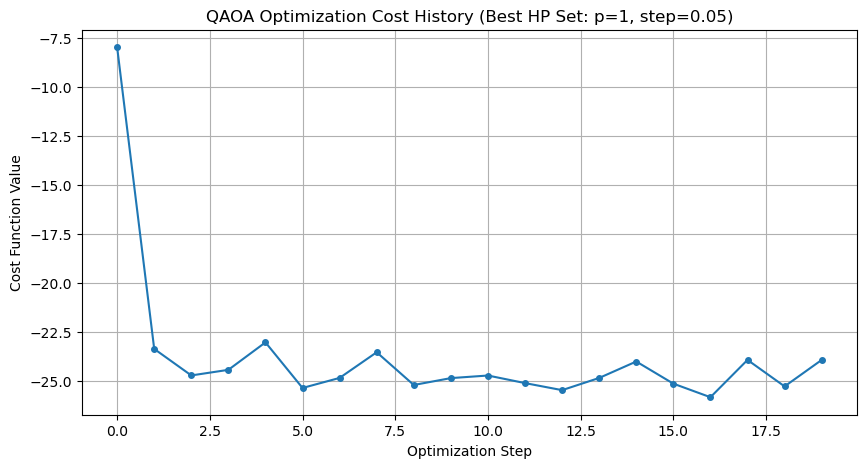




--- Optimal Portfolio Weights (QAOA Result - Table) ---
          Asset  Weight
0  US001055BJ00     0.0
1  US001084AS13     0.5
2  US00108WAM29     0.0
3  US00108WAP59     0.0
4  US00108WAR16     0.5




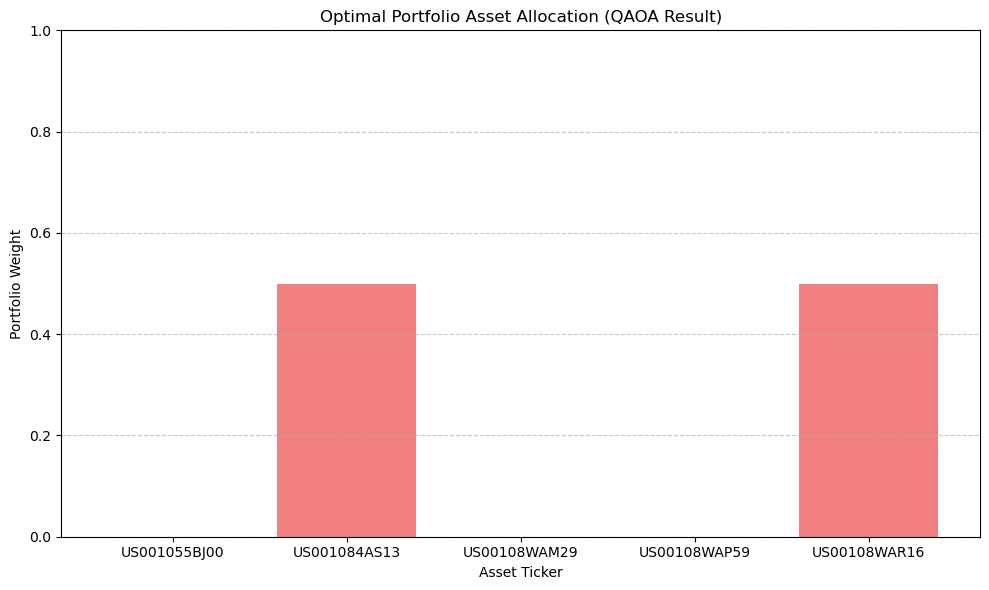



--- Sampling the QAOA circuit for Overall Best QAOA Portfolio with FULL shots ---

Total samples: 10000
Bitstring Frequencies (Top 5):
  01101: 494 times (4.94%)
  10110: 469 times (4.69%)
  00010: 468 times (4.68%)
  11001: 455 times (4.55%)
  10000: 448 times (4.48%)

--- Evaluating Top Bitstrings from Final Sampling for Overall Best Portfolio ---
  Bitstring                                      Assets  Num_Assets  Return  \
0     01101  [US001084AS13, US00108WAM29, US00108WAR16]           3  1.0333   
1     10110  [US001055BJ00, US00108WAM29, US00108WAP59]           3  0.7138   
2     00010                              [US00108WAP59]           1  0.8555   
3     11001  [US001055BJ00, US001084AS13, US00108WAR16]           3  0.9873   
4     10000                              [US001055BJ00]           1  0.5740   

     Risk  Sharpe  
0  0.4563  2.2644  
1  0.3870  1.8444  
2  0.4409  1.9402  
3  0.4467  2.2104  
4  0.3470  1.6544  




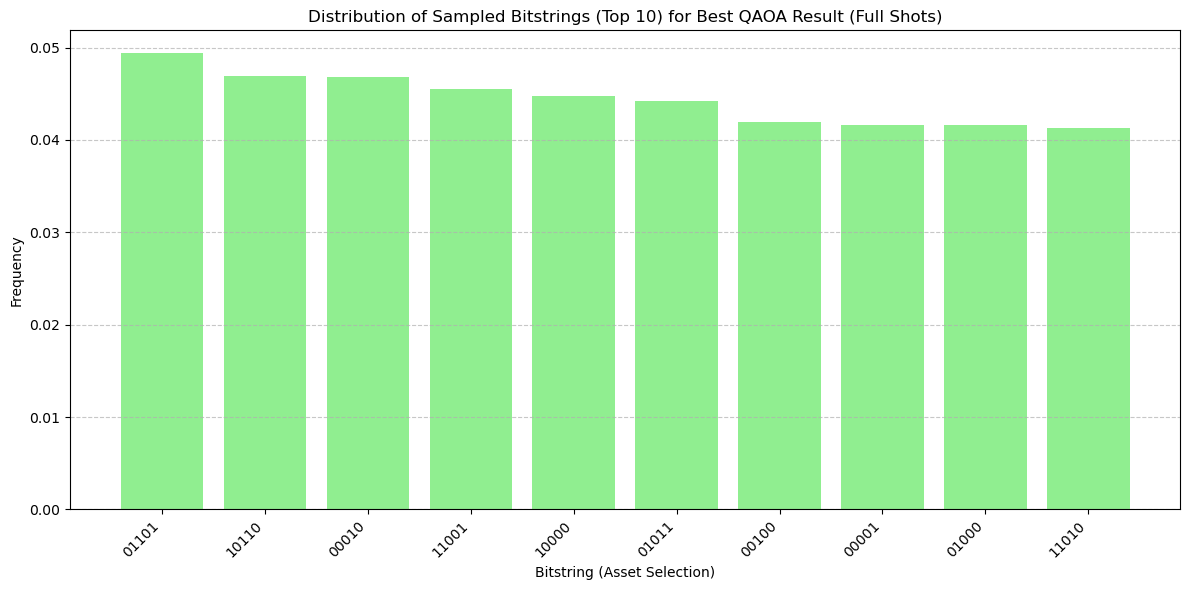




--- Portfolio Performance Comparison (Classical vs. QAOA) ---
                           Classical Min Variance  QAOA Portfolio
Metric                                                           
Annualized Return                          0.5740          1.1940
Annualized Risk (Std Dev)                  0.3470          0.4972
Sharpe Ratio                               1.6544          2.4014



--- Automated QAOA Hyperparameter Tuning and Portfolio Optimization Complete ---
This model demonstrates a more robust approach to finding optimal QAOA parameters and portfolio selections.
Further steps for real-world application and research would involve:
- **Expanding Search Space:** Explore a wider range of hyperparameters and more granular steps.
- **Advanced Optimizers:** Investigate Bayesian Optimization or other meta-heuristic algorithms for tuning.
- **More Sophisticated QAOA Ansätze:** Explore different circuit architectures beyond the basic QAOA layers.
- **Other Quantum Algorithms:**

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.optimize import minimize
from collections import Counter
import time



# Import PennyLane and its NumPy-like interface
try:
    import pennylane as qml
    from pennylane import numpy as pnp
    pennylane_available = True
except ImportError:
    pennylane_available = False
    print("Warning: The 'pennylane' library is not available. The quantum optimization section will be skipped.")

# --- Data Loading and Preparation from Excel with Data Cleaning ---
print("--- Starting Data Preparation and Cleaning from Excel File ---")
data_file_path = 'data_assets_dictionary.xlsx'

# Load data with explicit error handling
try:
    data_df = pd.read_excel(data_file_path, sheet_name='Data')  # Assuming data is in 'Data' sheet
    print(f"Successfully loaded data from {data_file_path}")
    print(f"Data shape: {data_df.shape}")
except Exception as e:
    print(f"Error loading Excel file: {e}")
    raise

# Data cleaning with proper error handling
data_df_cleaned = data_df.copy()

# Convert numeric columns with proper error handling
data_df_cleaned['oas'] = pd.to_numeric(data_df_cleaned['oas'], errors='coerce')
data_df_cleaned['spreadDur'] = pd.to_numeric(data_df_cleaned['spreadDur'], errors='coerce')

# Calculate means before imputation
oas_mean = data_df_cleaned['oas'].mean()
spreadDur_mean = data_df_cleaned['spreadDur'].mean()

# Impute missing values without chained assignment
data_df_cleaned = data_df_cleaned.assign(
    oas=lambda x: x['oas'].fillna(oas_mean),
    spreadDur=lambda x: x['spreadDur'].fillna(spreadDur_mean)
)

# Drop rows with missing ISIN
initial_row_count = len(data_df)
data_df_cleaned = data_df_cleaned.dropna(subset=['isin'])
dropped_rows = initial_row_count - len(data_df_cleaned)

print("\nData cleaning complete:")
print(f"- Filled {data_df['oas'].isnull().sum()} NaNs in 'oas' with mean {oas_mean:.4f}")
print(f"- Filled {data_df['spreadDur'].isnull().sum()} NaNs in 'spreadDur' with mean {spreadDur_mean:.4f}")
print(f"- Dropped {dropped_rows} rows with missing 'isin'")
print(f"- Final cleaned data shape: {data_df_cleaned.shape}")

# Select assets - with validation
num_assets = 5
if len(data_df_cleaned) < num_assets:
    print(f"Error: Only {len(data_df_cleaned)} assets available after cleaning, need {num_assets}")
    import sys
    sys.exit(1)

asset_data = data_df_cleaned.head(num_assets).copy()
asset_data['ticker'] = asset_data['isin']  # Using ISIN as ticker
asset_tickers = asset_data['ticker'].tolist()

print("\nSelected assets:")
print(asset_data[['isin', 'oas', 'spreadDur']])
print("\n" + "="*70 + "\n")

# --- Expected Returns and Covariance Matrix ---
# Expected Returns from OAS (convert to decimal)
expected_returns = asset_data['oas'] / 100
expected_returns.index = asset_tickers

# Verify no NaN in expected returns
if expected_returns.isnull().any():
    print("Error: Expected returns contain NaN values after conversion")
    print(expected_returns)
    import sys
    sys.exit(1)

print("Expected Returns (mu vector):")
print(expected_returns)
print("\n" + "="*70 + "\n")

# Covariance Matrix from factor model
num_factors = 1
factor_covariance_matrix = np.array([[0.005]])  # Small constant factor covariance
factor_loadings = asset_data[['spreadDur']].values
specific_risk = 0.001
specific_risk_matrix_D = np.diag([specific_risk] * num_assets)

# Construct factor model covariance
Sigma = factor_loadings @ factor_covariance_matrix @ factor_loadings.T + specific_risk_matrix_D
factor_model_covariance = pd.DataFrame(Sigma, index=asset_tickers, columns=asset_tickers)

print("Factor Model Covariance Matrix:")
print(factor_model_covariance)
print("\n" + "="*70 + "\n")

# --- Classical Portfolio Optimization (Minimum Variance Example) ---
# This section demonstrates a classical optimization to provide a benchmark
# for comparison with the quantum result.

def calculate_portfolio_metrics(weights, expected_returns, cov_matrix, annualization_factor=1):
    """Calculates portfolio expected return, variance, and standard deviation."""
    portfolio_return = np.sum(weights * expected_returns) * annualization_factor
    portfolio_variance = weights.T @ cov_matrix @ weights * annualization_factor
    portfolio_std_dev = np.sqrt(portfolio_variance)
    return portfolio_return, portfolio_std_dev, portfolio_variance

# Objective function for classical optimization (minimize portfolio variance)
def classical_portfolio_variance_objective(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

# Constraints: weights sum to 1, and weights are non-negative
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(num_assets))

# Initial guess for weights (equal weighting)
initial_weights = np.array(num_assets * [1. / num_assets])

# Perform classical optimization for minimum variance portfolio
classical_min_var_result = minimize(classical_portfolio_variance_objective, initial_weights,
                                     args=(factor_model_covariance.values,),
                                     method='SLSQP', bounds=bounds, constraints=constraints)

classical_min_var_weights = pd.Series(classical_min_var_result.x, index=asset_tickers)
print("Classical Minimum Variance Portfolio Weights (using factor model covariance):")
print(classical_min_var_weights)

# These are the variables that were not defined in your output.
# They are calculated here and need to be available globally.
classical_min_var_return, classical_min_var_std_dev, _ = calculate_portfolio_metrics(
    classical_min_var_weights.values, expected_returns.values, factor_model_covariance.values
)
classical_min_var_sharpe = classical_min_var_return / classical_min_var_std_dev if classical_min_var_std_dev != 0 else np.nan

print(f"\nClassical Minimum Variance Portfolio Annualized Return: {classical_min_var_return:.4f}")
print(f"Classical Minimum Variance Portfolio Annualized Risk (Std Dev): {classical_min_var_std_dev:.4f}")
print(f"Classical Minimum Variance Portfolio Sharpe Ratio (Risk-Free Rate = 0): {classical_min_var_sharpe:.4f}")
print("\n" + "=" * 70 + "\n")


# --- PennyLane Quantum Portfolio Optimization (using QAOA) ---
num_qubits = num_assets

def build_qaoa_cost_hamiltonian(Q_matrix, num_qubits):
    coeffs = []
    ops = []
    for i in range(num_qubits):
        for j in range(num_qubits):
            if i == j:
                coeffs.append(Q_matrix[i, i] / 2)
                ops.append(qml.Identity(i))
                coeffs.append(-Q_matrix[i, i] / 2)
                ops.append(qml.PauliZ(i))
            elif i < j:
                coeffs.append(Q_matrix[i, j] / 4)
                ops.append(qml.Identity(i) @ qml.Identity(j))
                coeffs.append(-Q_matrix[i, j] / 4)
                ops.append(qml.PauliZ(i) @ qml.Identity(j))
                coeffs.append(-Q_matrix[i, j] / 4)
                ops.append(qml.Identity(i) @ qml.PauliZ(j))
                coeffs.append(Q_matrix[i, j] / 4)
                ops.append(qml.PauliZ(i) @ qml.PauliZ(j))
    return qml.Hamiltonian(coeffs, ops).simplify()

# Device definition with reduced shots for faster sampling during tuning
dev = qml.device("lightning.qubit", wires=num_qubits, shots=1000)

@qml.qnode(dev)
def qaoa_circuit(params, h_cost, mixer_h, num_qubits, p_layers_circuit):
    gamma = params[0]
    beta = params[1]
    for i in range(num_qubits):
        qml.Hadamard(wires=i)
    for layer in range(p_layers_circuit):
        for coeff, op in zip(h_cost.coeffs, h_cost.ops):
            if isinstance(op, qml.Identity):
                continue
            elif isinstance(op, qml.PauliZ) and len(op.wires) == 1:
                qml.RZ(2 * coeff * gamma[layer], wires=op.wires[0])
            elif isinstance(op, qml.ops.op_math.Prod) and len(op.wires) == 2:
                if all(isinstance(factor, qml.PauliZ) for factor in op.operands):
                    qml.IsingZZ(2 * coeff * gamma[layer], wires=op.wires)
                else:
                    qml.exp(op, coeff * gamma[layer])
            else:
                qml.exp(op, coeff * gamma[layer])
        for i in range(num_qubits):
            qml.RX(2 * beta[layer], wires=i)
    return qml.expval(h_cost)

mixer_h = qml.Hamiltonian([1.0] * num_qubits, [qml.PauliX(i) for i in range(num_qubits)])

# This qaoa_sampling_circuit_internal will be used within the tuning loop
@qml.qnode(dev)
def qaoa_sampling_circuit_internal(params, h_cost, mixer_h, num_qubits, p_layers_circuit):
    gamma = params[0]
    beta = params[1]
    for i in range(num_qubits):
        qml.Hadamard(wires=i)
    for layer in range(p_layers_circuit):
        for coeff, op in zip(h_cost.coeffs, h_cost.ops):
            if isinstance(op, qml.Identity): continue
            elif isinstance(op, qml.PauliZ) and len(op.wires) == 1: qml.RZ(2 * coeff * gamma[layer], wires=op.wires[0])
            elif isinstance(op, qml.ops.op_math.Prod) and len(op.wires) == 2:
                if all(isinstance(factor, qml.PauliZ) for factor in op.operands): qml.IsingZZ(2 * coeff * gamma[layer], wires=op.wires)
                else: qml.exp(op, coeff * gamma[layer])
            else: qml.exp(op, coeff * gamma[layer])
        for i in range(num_qubits):
            qml.RX(2 * beta[layer], wires=i)
    return qml.sample(wires=range(num_qubits))


# --- Automated Hyperparameter Tuning Function ---
def tune_qaoa_parameters(q_risk_aversion_values, lambda_penalty_values, p_layers_values, stepsize_values,
                         num_qaoa_runs_per_hp, optimization_steps_per_run,
                         expected_returns, factor_model_covariance, num_assets, K_target_assets):

    tuning_results = []
    sigma_pnp = pnp.array(factor_model_covariance.values, requires_grad=False)
    mu_pnp = pnp.array(expected_returns.values, requires_grad=False)

    for q_risk_aversion in q_risk_aversion_values:
        for lambda_penalty in lambda_penalty_values:
            for p_layers in p_layers_values:
                for stepsize in stepsize_values:
                    print(f"\n--- Tuning Run: q={q_risk_aversion}, lambda={lambda_penalty}, p={p_layers}, step={stepsize} ---")

                    Q_matrix = pnp.zeros((num_assets, num_assets))
                    for i in range(num_assets):
                        for j in range(num_assets):
                            if i == j:
                                Q_matrix[i, i] = sigma_pnp[i, i] - q_risk_aversion * mu_pnp[i]
                            else:
                                Q_matrix[i, j] = sigma_pnp[i, j]

                    for i in range(num_assets):
                        Q_matrix[i, i] += lambda_penalty * (1 - 2 * K_target_assets)
                        for j in range(i + 1, num_assets):
                            Q_matrix[i, j] += lambda_penalty * 2
                            Q_matrix[j, i] += lambda_penalty * 2

                    H_cost = build_qaoa_cost_hamiltonian(Q_matrix, num_assets)

                    best_cost_for_hp_set = np.inf
                    best_params_for_hp_set = None
                    current_hp_cost_history = []

                    for run_idx in range(num_qaoa_runs_per_hp):
                        params = pnp.random.uniform(low=0, high=2*np.pi, size=(2, p_layers), requires_grad=True)
                        optimizer = qml.AdamOptimizer(stepsize=stepsize)

                        run_cost_history = []
                        for i in range(optimization_steps_per_run):
                            params, cost = optimizer.step_and_cost(qaoa_circuit, params, h_cost=H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=p_layers)
                            run_cost_history.append(cost)

                        current_run_final_cost = run_cost_history[-1]
                        if current_run_final_cost < best_cost_for_hp_set:
                            best_cost_for_hp_set = current_run_final_cost
                            best_params_for_hp_set = params
                            current_hp_cost_history = run_cost_history

                    samples = qaoa_sampling_circuit_internal(best_params_for_hp_set, h_cost=H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=p_layers)
                    sample_strings = ["".join(str(int(b)) for b in sample) for sample in samples]
                    counts = Counter(sample_strings)

                    best_sharpe_for_hp_set = -np.inf
                    best_bitstring_for_hp_set = None
                    best_weights_for_hp_set = np.zeros(num_assets)
                    best_return_for_hp_set = 0
                    best_std_dev_for_hp_set = 0

                    for bitstring in counts.keys():
                        current_selected_assets_indices = [i for i, bit in enumerate(bitstring) if bit == '1']
                        current_num_selected_assets = len(current_selected_assets_indices)

                        if current_num_selected_assets != K_target_assets or current_num_selected_assets == 0:
                            continue

                        current_weights = np.zeros(num_assets)
                        weight_per_selected_asset = 1.0 / current_num_selected_assets
                        for idx in current_selected_assets_indices:
                            current_weights[idx] = weight_per_selected_asset

                        current_return, current_std_dev, _ = calculate_portfolio_metrics(
                            current_weights, expected_returns.values, factor_model_covariance.values
                        )
                        current_sharpe = current_return / current_std_dev if current_std_dev != 0 else np.nan

                        if current_sharpe > best_sharpe_for_hp_set:
                            best_sharpe_for_hp_set = current_sharpe
                            best_bitstring_for_hp_set = bitstring
                            best_weights_for_hp_set = current_weights
                            best_return_for_hp_set = current_return
                            best_std_dev_for_hp_set = current_std_dev

                    tuning_results.append({
                        'q_risk_aversion': q_risk_aversion,
                        'lambda_penalty': lambda_penalty,
                        'p_layers': p_layers,
                        'stepsize': stepsize,
                        'final_cost': best_cost_for_hp_set,
                        'best_bitstring': best_bitstring_for_hp_set,
                        'best_sharpe': best_sharpe_for_hp_set,
                        'best_return': best_return_for_hp_set,
                        'best_risk': best_std_dev_for_hp_set,
                        'best_weights': best_weights_for_hp_set.tolist(),
                        'cost_history': current_hp_cost_history, # This was already there
                        'best_params': best_params_for_hp_set.tolist() # ADDED THIS LINE
                    })
    return pd.DataFrame(tuning_results)


# --- Define Hyperparameter Search Space (Optimized for Speed) ---
q_risk_aversion_values = [0.5]
lambda_penalty_values = [10.0]
p_layers_values = [1]
stepsize_values = [0.05]

num_qaoa_runs_per_hp_set = 1
optimization_steps_per_run = 20

K_target_assets = 2

print("\n" + "="*70 + "\n")
print("--- Starting Automated QAOA Hyperparameter Tuning (Optimized for Speed) ---")
print(f"Evaluating {len(q_risk_aversion_values) * len(lambda_penalty_values) * len(p_layers_values) * len(stepsize_values)} hyperparameter combinations.")
print(f"Each combination will run {num_qaoa_runs_per_hp_set} QAOA optimizations for {optimization_steps_per_run} steps.")
print(f"Target number of selected assets (K): {K_target_assets}")
print("\n" + "="*70 + "\n")

start_tuning_time = time.time()
tuning_df = tune_qaoa_parameters(q_risk_aversion_values, lambda_penalty_values, p_layers_values, stepsize_values,
                                 num_qaoa_runs_per_hp_set, optimization_steps_per_run,
                                 expected_returns, factor_model_covariance, num_assets, K_target_assets)
end_tuning_time = time.time()
print(f"\nTotal QAOA Tuning Time: {end_tuning_time - start_tuning_time:.2f} seconds")


print("\n--- Hyperparameter Tuning Results ---")
print(tuning_df)
print("\n" + "="*70 + "\n")

# --- Select the Overall Best QAOA Portfolio from Tuning Results ---
valid_tuning_results = tuning_df[tuning_df['best_sharpe'] != -np.inf]

if not valid_tuning_results.empty:
    best_tuned_qaoa_result = valid_tuning_results.loc[valid_tuning_results['best_sharpe'].idxmax()]

    best_qaoa_return = best_tuned_qaoa_result['best_return']
    best_qaoa_std_dev = best_tuned_qaoa_result['best_risk']
    best_qaoa_sharpe = best_tuned_qaoa_result['best_sharpe']
    best_qaoa_bitstring = best_tuned_qaoa_result['best_bitstring']
    best_qaoa_weights = np.array(best_tuned_qaoa_result['best_weights'])

    print("\n--- Overall Best QAOA Portfolio from Tuning ---")
    print(f"Optimal Hyperparameters: q_risk_aversion={best_tuned_qaoa_result['q_risk_aversion']}, "
          f"lambda_penalty={best_tuned_qaoa_result['lambda_penalty']}, "
          f"p_layers={best_tuned_qaoa_result['p_layers']}, "
          f"stepsize={best_tuned_qaoa_result['stepsize']}")
    print(f"Best QAOA Portfolio (by Sharpe Ratio) Bitstring: {best_qaoa_bitstring}")
    selected_assets_final = [asset_tickers[i] for i, bit in enumerate(best_qaoa_bitstring) if bit == '1']
    print(f"Selected Assets: {selected_assets_final}")
    print(f"Number of selected assets: {len(selected_assets_final)}")

    ### ADDED FROM CODE B FOR ENHANCED FINAL ANALYSIS ###
    # Recalculate and print the QUBO Matrix for the best hyperparameters
    final_best_q = best_tuned_qaoa_result['q_risk_aversion']
    final_best_l = best_tuned_qaoa_result['lambda_penalty']
    final_best_p_layers = int(best_tuned_qaoa_result['p_layers'])

    final_Q_matrix = pnp.zeros((num_assets, num_assets))
    sigma_pnp_final = pnp.array(factor_model_covariance.values, requires_grad=False)
    mu_pnp_final = pnp.array(expected_returns.values, requires_grad=False)

    for i in range(num_assets):
        for j in range(num_assets):
            if i == j:
                final_Q_matrix[i, i] = sigma_pnp_final[i, i] - final_best_q * mu_pnp_final[i]
            else:
                final_Q_matrix[i, j] = sigma_pnp_final[i, j]

    for i in range(num_assets):
        final_Q_matrix[i, i] += final_best_l * (1 - 2 * K_target_assets)
        for j in range(i + 1, num_assets):
            final_Q_matrix[i, j] += final_best_l * 2
            final_Q_matrix[j, i] += final_best_l * 2

    final_H_cost = build_qaoa_cost_hamiltonian(final_Q_matrix, num_assets)

    print("\n" + "="*70 + "\n")
    print("QUBO Matrix (Q) for Overall Best QAOA Portfolio:")
    print(pd.DataFrame(final_Q_matrix, index=asset_tickers, columns=asset_tickers))
    print("\nCost Hamiltonian (H_cost) for Overall Best QAOA Portfolio:")
    print(final_H_cost)
    print("\n" + "="*70 + "\n")

    # Retrieve the cost history stored during tuning
    final_cost_history_for_plot = best_tuned_qaoa_result['cost_history']


    print("\n" + "="*70 + "\n")
    print("--- QAOA Optimization Cost History for Overall Best QAOA Portfolio ---")
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(final_cost_history_for_plot)), final_cost_history_for_plot, marker='o', linestyle='-', markersize=4)
    plt.title(f'QAOA Optimization Cost History (Best HP Set: p={final_best_p_layers}, step={best_tuned_qaoa_result["stepsize"]})')
    plt.xlabel('Optimization Step')
    plt.ylabel('Cost Function Value')
    plt.grid(True)
    plt.show()
    print("\n" + "="*70 + "\n")
    ### END ADDED FROM CODE B FOR ENHANCED FINAL ANALYSIS ###


    # --- Optimal Portfolio Weights (QAOA Result - Table) ---
    optimal_portfolio_df = pd.DataFrame({
        'Asset': asset_tickers,
        'Weight': best_qaoa_weights
    })
    print("\n--- Optimal Portfolio Weights (QAOA Result - Table) ---")
    print(optimal_portfolio_df)
    print("\n" + "="*70 + "\n")

    # --- Create a bar chart for visual representation of QAOA weights ---
    plt.figure(figsize=(10, 6))
    plt.bar(optimal_portfolio_df['Asset'], optimal_portfolio_df['Weight'], color='lightcoral')
    plt.xlabel('Asset Ticker')
    plt.ylabel('Portfolio Weight')
    plt.title('Optimal Portfolio Asset Allocation (QAOA Result)')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("\n" + "="*70 + "\n")

    ### ADDED FROM CODE B FOR ENHANCED FINAL ANALYSIS ###
    # Redefine sampling QNode and device for final plots with specific shots
    final_sampling_shots_value = 10000 # Use 10000 shots for high-quality final distribution
    dev_final_sampling = qml.device("lightning.qubit", wires=num_qubits, shots=final_sampling_shots_value)

    @qml.qnode(dev_final_sampling)
    def qaoa_sampling_circuit_final(params, h_cost, mixer_h, num_qubits, p_layers_circuit):
        gamma = params[0]
        beta = params[1]
        for i in range(num_qubits): qml.Hadamard(wires=i)
        for layer in range(p_layers_circuit):
            for coeff, op in zip(h_cost.coeffs, h_cost.ops):
                if isinstance(op, qml.Identity): continue
                elif isinstance(op, qml.PauliZ) and len(op.wires) == 1: qml.RZ(2 * coeff * gamma[layer], wires=op.wires[0])
                elif isinstance(op, qml.ops.op_math.Prod) and len(op.wires) == 2:
                    if all(isinstance(factor, qml.PauliZ) for factor in op.operands): qml.IsingZZ(2 * coeff * gamma[layer], wires=op.wires)
                    else: qml.exp(op, coeff * gamma[layer])
                else: qml.exp(op, coeff * gamma[layer])
            for i in range(num_qubits): qml.RX(2 * beta[layer], wires=i)
        return qml.sample(wires=range(num_qubits))

    # Retrieve the best_params from the tuning result
    final_best_params = best_tuned_qaoa_result['best_params'] # Now correctly retrieve best_params

    print("--- Sampling the QAOA circuit for Overall Best QAOA Portfolio with FULL shots ---")
    final_samples = qaoa_sampling_circuit_final(final_best_params, h_cost=final_H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=final_best_p_layers)
    final_sample_strings = ["".join(str(int(b)) for b in sample) for sample in final_samples]
    final_counts = Counter(final_sample_strings)

    total_shots_final_int = dev_final_sampling.shots.total_shots

    print(f"\nTotal samples: {total_shots_final_int}")
    print("Bitstring Frequencies (Top 5):")
    for bitstring, count in final_counts.most_common(5):
        print(f"  {bitstring}: {count} times ({count/total_shots_final_int:.2%})")

    print(f"\n--- Evaluating Top Bitstrings from Final Sampling for Overall Best Portfolio ---")
    final_evaluated_bitstrings_data = []
    top_n_to_evaluate_final = 5 # Number of top bitstrings to display for final evaluation
    for bitstring, _ in final_counts.most_common(top_n_to_evaluate_final):
        current_selected_assets_indices = [i for i, bit in enumerate(bitstring) if bit == '1']
        current_num_selected_assets = len(current_selected_assets_indices)

        current_weights = np.zeros(num_assets)
        if current_num_selected_assets > 0:
            weight_per_selected_asset = 1.0 / current_num_selected_assets
            for idx in current_selected_assets_indices:
                current_weights[idx] = weight_per_selected_asset

        current_return, current_std_dev, _ = calculate_portfolio_metrics(
            current_weights, expected_returns.values, factor_model_covariance.values
        )
        current_sharpe = current_return / current_std_dev if current_std_dev != 0 else np.nan

        final_evaluated_bitstrings_data.append({
            'Bitstring': bitstring,
            'Assets': [asset_tickers[i] for i in current_selected_assets_indices],
            'Num_Assets': current_num_selected_assets,
            'Return': current_return,
            'Risk': current_std_dev,
            'Sharpe': current_sharpe
        })
    final_evaluated_df = pd.DataFrame(final_evaluated_bitstrings_data)
    print(final_evaluated_df.round(4))
    print("\n" + "="*70 + "\n")


    # --- Bitstring Distribution Plot ---
    sorted_counts_for_plot = dict(sorted(final_counts.items(), key=lambda item: item[1], reverse=True))
    top_n_bitstrings_plot = min(10, len(sorted_counts_for_plot))

    bitstring_labels = list(sorted_counts_for_plot.keys())[:top_n_bitstrings_plot]
    bitstring_frequencies = [count / total_shots_final_int for count in list(sorted_counts_for_plot.values())[:top_n_bitstrings_plot]]

    plt.figure(figsize=(12, 6))
    plt.bar(bitstring_labels, bitstring_frequencies, color='lightgreen')
    plt.xlabel('Bitstring (Asset Selection)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Sampled Bitstrings (Top {top_n_bitstrings_plot}) for Best QAOA Result (Full Shots)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("\n" + "="*70 + "\n")
    ### END ADDED FROM CODE B FOR ENHANCED FINAL ANALYSIS ###


    # --- Comparison Table: Classical vs. Quantum ---
    comparison_data = {
        'Metric': ['Annualized Return', 'Annualized Risk (Std Dev)', 'Sharpe Ratio'],
        'Classical Min Variance': [classical_min_var_return, classical_min_var_std_dev, classical_min_var_sharpe],
        'QAOA Portfolio': [best_qaoa_return, best_qaoa_std_dev, best_qaoa_sharpe]
    }
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.set_index('Metric')

    print("\n--- Portfolio Performance Comparison (Classical vs. QAOA) ---")
    print(comparison_df.round(4))
    print("\n" + "="*70 + "\n")

else:
    print("\n--- No valid QAOA portfolios found meeting the K_target_assets constraint. ---")
    print("Consider adjusting hyperparameters (e.g., lambda_penalty, q_risk_aversion) or K_target_assets.")
    print("\n" + "="*70 + "\n")


print("\n--- Automated QAOA Hyperparameter Tuning and Portfolio Optimization Complete ---")
print("This model demonstrates a more robust approach to finding optimal QAOA parameters and portfolio selections.")
print("Further steps for real-world application and research would involve:")
print("- **Expanding Search Space:** Explore a wider range of hyperparameters and more granular steps.")
print("- **Advanced Optimizers:** Investigate Bayesian Optimization or other meta-heuristic algorithms for tuning.")
print("- **More Sophisticated QAOA Ansätze:** Explore different circuit architectures beyond the basic QAOA layers.")
print("- **Other Quantum Algorithms:** Investigate VQE with different ansätze or Quantum Annealing for QUBOs.")
print("- **Continuous Weights:** This current approach uses binary selection (0 or 1). For continuous weights, more complex encoding schemes (e.g., using multiple qubits per asset, or amplitude encoding) or different quantum algorithms are needed.")
print("- **Real Quantum Hardware:** Run the optimized circuit on actual quantum computers (QPUs) to observe hardware effects.")
print("- **Robustness Testing:** Evaluate portfolio performance on out-of-sample data.")
print("- **Transaction Costs & Constraints:** Incorporate more realistic financial constraints like transaction costs, minimum investment amounts, etc.")

# **Code 7: Full Hyperparameter Search (Production-Grade)**

--- Starting Data Preparation and Cleaning from Excel File ---
Successfully loaded data from data_assets_dictionary.xlsx
Data shape: (2629, 278)

Data cleaning complete:
- Filled 0 NaNs in 'oas' with mean 78.8455
- Filled 0 NaNs in 'spreadDur' with mean 5.4127
- Dropped 11 rows with missing 'isin'
- Final cleaned data shape: (2618, 278)

Selected assets:
           isin         oas  spreadDur
0  US001055BJ00   57.400949   4.886435
1  US001084AS13  128.612337   7.279928
2  US00108WAM29   71.198350   5.296064
3  US00108WAP59   85.546591   6.219386
4  US00108WAR16  110.187192   6.768926


Expected Returns (mu vector):
US001055BJ00    0.574009
US001084AS13    1.286123
US00108WAM29    0.711983
US00108WAP59    0.855466
US00108WAR16    1.101872
Name: oas, dtype: float64


Factor Model Covariance Matrix:
              US001055BJ00  US001084AS13  US00108WAM29  US00108WAP59  \
US001055BJ00      0.120386      0.177864      0.129394      0.151953   
US001084AS13      0.177864      0.265987      0.

C:\ProgramData\anaconda3\Lib\site-packages\pennylane\ops\op_math\composite.py:211: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in staticmethod() if you want to preserve the old behavior
  return self._math_op(math.vstack(eigvals), axis=0)



--- Tuning Run: q=0.1, lambda=5.0, p=1, step=0.05 ---

--- Tuning Run: q=0.1, lambda=5.0, p=2, step=0.01 ---

--- Tuning Run: q=0.1, lambda=5.0, p=2, step=0.05 ---

--- Tuning Run: q=0.1, lambda=10.0, p=1, step=0.01 ---

--- Tuning Run: q=0.1, lambda=10.0, p=1, step=0.05 ---

--- Tuning Run: q=0.1, lambda=10.0, p=2, step=0.01 ---

--- Tuning Run: q=0.1, lambda=10.0, p=2, step=0.05 ---

--- Tuning Run: q=0.5, lambda=5.0, p=1, step=0.01 ---

--- Tuning Run: q=0.5, lambda=5.0, p=1, step=0.05 ---

--- Tuning Run: q=0.5, lambda=5.0, p=2, step=0.01 ---

--- Tuning Run: q=0.5, lambda=5.0, p=2, step=0.05 ---

--- Tuning Run: q=0.5, lambda=10.0, p=1, step=0.01 ---

--- Tuning Run: q=0.5, lambda=10.0, p=1, step=0.05 ---

--- Tuning Run: q=0.5, lambda=10.0, p=2, step=0.01 ---

--- Tuning Run: q=0.5, lambda=10.0, p=2, step=0.05 ---

--- Tuning Run: q=1.0, lambda=5.0, p=1, step=0.01 ---

--- Tuning Run: q=1.0, lambda=5.0, p=1, step=0.05 ---

--- Tuning Run: q=1.0, lambda=5.0, p=2, step=0.01 ---

-

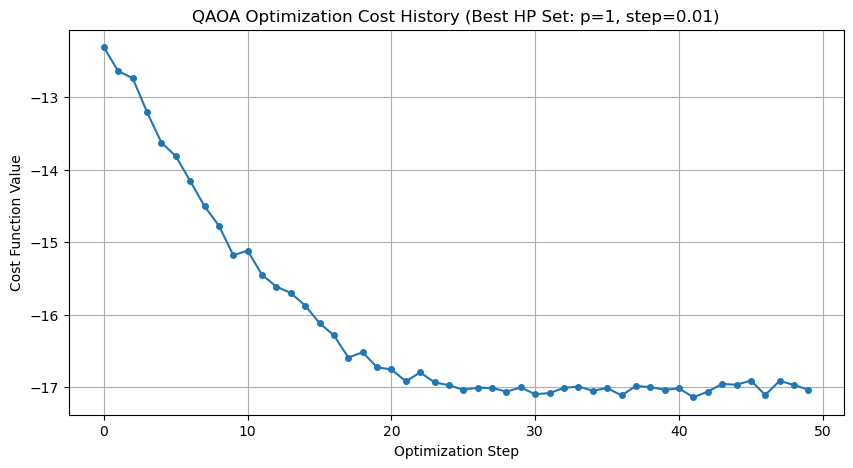




--- Optimal Portfolio Weights (QAOA Result - Table) ---
          Asset  Weight
0  US001055BJ00     0.0
1  US001084AS13     0.5
2  US00108WAM29     0.0
3  US00108WAP59     0.0
4  US00108WAR16     0.5




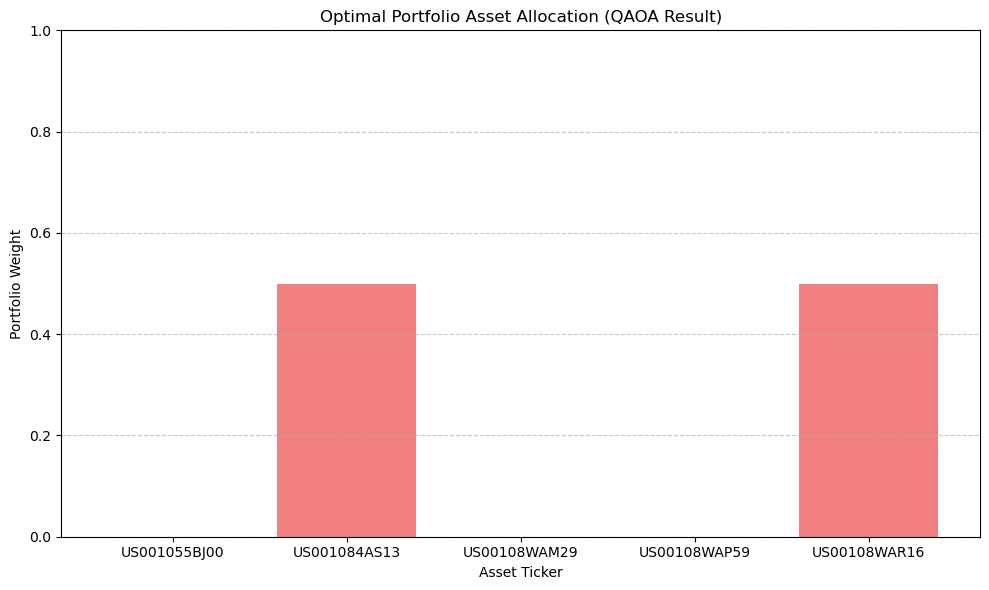



--- Sampling the QAOA circuit for Overall Best QAOA Portfolio with FULL shots ---

Total samples: 10000
Bitstring Frequencies (Top 5):
  10100: 876 times (8.76%)
  10010: 770 times (7.70%)
  10001: 722 times (7.22%)
  00110: 716 times (7.16%)
  00101: 711 times (7.11%)

--- Evaluating Top Bitstrings from Final Sampling for Overall Best Portfolio ---
  Bitstring                        Assets  Num_Assets  Return    Risk  Sharpe
0     10100  [US001055BJ00, US00108WAM29]           2  0.6430  0.3607  1.7826
1     10010  [US001055BJ00, US00108WAP59]           2  0.7147  0.3933  1.8173
2     10001  [US001055BJ00, US00108WAR16]           2  0.8379  0.4127  2.0305
3     00110  [US00108WAM29, US00108WAP59]           2  0.7837  0.4077  1.9221
4     00101  [US00108WAM29, US00108WAR16]           2  0.9069  0.4271  2.1232




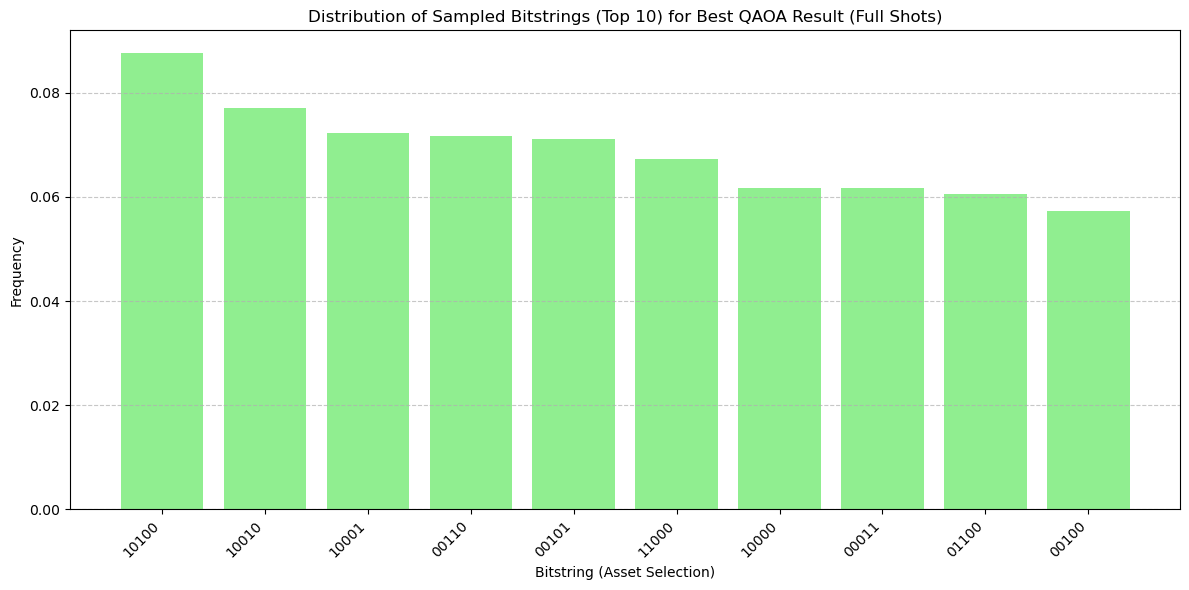




--- Portfolio Performance Comparison (Classical vs. QAOA) ---
                           Classical Min Variance  QAOA Portfolio
Metric                                                           
Annualized Return                          0.5740          1.1940
Annualized Risk (Std Dev)                  0.3470          0.4972
Sharpe Ratio                               1.6544          2.4014



--- Automated QAOA Hyperparameter Tuning and Portfolio Optimization Complete ---
This model demonstrates a more robust approach to finding optimal QAOA parameters and portfolio selections.
Further steps for real-world application and research would involve:
- **Expanding Search Space:** Explore a wider range of hyperparameters and more granular steps.
- **Advanced Optimizers:** Investigate Bayesian Optimization or other meta-heuristic algorithms for tuning.
- **More Sophisticated QAOA Ansätze:** Explore different circuit architectures beyond the basic QAOA layers.
- **Other Quantum Algorithms:**

In [35]:
# main_portfolio_optimizer.py
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.optimize import minimize
from collections import Counter
import time



# Import PennyLane and its NumPy-like interface
try:
    import pennylane as qml
    from pennylane import numpy as pnp
    pennylane_available = True
except ImportError:
    pennylane_available = False
    print("Warning: The 'pennylane' library is not available. The quantum optimization section will be skipped.")

# --- Data Loading and Preparation from Excel with Data Cleaning ---
print("--- Starting Data Preparation and Cleaning from Excel File ---")
data_file_path = 'data_assets_dictionary.xlsx'

# Load data with explicit error handling
try:
    data_df = pd.read_excel(data_file_path, sheet_name='Data')  # Assuming data is in 'Data' sheet
    print(f"Successfully loaded data from {data_file_path}")
    print(f"Data shape: {data_df.shape}")
except Exception as e:
    print(f"Error loading Excel file: {e}")
    raise

# Data cleaning with proper error handling
data_df_cleaned = data_df.copy()

# Convert numeric columns with proper error handling
data_df_cleaned['oas'] = pd.to_numeric(data_df_cleaned['oas'], errors='coerce')
data_df_cleaned['spreadDur'] = pd.to_numeric(data_df_cleaned['spreadDur'], errors='coerce')

# Calculate means before imputation
oas_mean = data_df_cleaned['oas'].mean()
spreadDur_mean = data_df_cleaned['spreadDur'].mean()

# Impute missing values without chained assignment
data_df_cleaned = data_df_cleaned.assign(
    oas=lambda x: x['oas'].fillna(oas_mean),
    spreadDur=lambda x: x['spreadDur'].fillna(spreadDur_mean)
)

# Drop rows with missing ISIN
initial_row_count = len(data_df)
data_df_cleaned = data_df_cleaned.dropna(subset=['isin'])
dropped_rows = initial_row_count - len(data_df_cleaned)

print("\nData cleaning complete:")
print(f"- Filled {data_df['oas'].isnull().sum()} NaNs in 'oas' with mean {oas_mean:.4f}")
print(f"- Filled {data_df['spreadDur'].isnull().sum()} NaNs in 'spreadDur' with mean {spreadDur_mean:.4f}")
print(f"- Dropped {dropped_rows} rows with missing 'isin'")
print(f"- Final cleaned data shape: {data_df_cleaned.shape}")

# Select assets - with validation
num_assets = 5
if len(data_df_cleaned) < num_assets:
    print(f"Error: Only {len(data_df_cleaned)} assets available after cleaning, need {num_assets}")
    import sys
    sys.exit(1)

asset_data = data_df_cleaned.head(num_assets).copy()
asset_data['ticker'] = asset_data['isin']  # Using ISIN as ticker
asset_tickers = asset_data['ticker'].tolist()

print("\nSelected assets:")
print(asset_data[['isin', 'oas', 'spreadDur']])
print("\n" + "="*70 + "\n")

# --- Expected Returns and Covariance Matrix ---
# Expected Returns from OAS (convert to decimal)
expected_returns = asset_data['oas'] / 100
expected_returns.index = asset_tickers

# Verify no NaN in expected returns
if expected_returns.isnull().any():
    print("Error: Expected returns contain NaN values after conversion")
    print(expected_returns)
    import sys
    sys.exit(1)

print("Expected Returns (mu vector):")
print(expected_returns)
print("\n" + "="*70 + "\n")

# Covariance Matrix from factor model
num_factors = 1
factor_covariance_matrix = np.array([[0.005]])  # Small constant factor covariance
factor_loadings = asset_data[['spreadDur']].values
specific_risk = 0.001
specific_risk_matrix_D = np.diag([specific_risk] * num_assets)

# Construct factor model covariance
Sigma = factor_loadings @ factor_covariance_matrix @ factor_loadings.T + specific_risk_matrix_D
factor_model_covariance = pd.DataFrame(Sigma, index=asset_tickers, columns=asset_tickers)

print("Factor Model Covariance Matrix:")
print(factor_model_covariance)
print("\n" + "="*70 + "\n")

# --- Classical Portfolio Optimization (Minimum Variance Example) ---
# This section demonstrates a classical optimization to provide a benchmark
# for comparison with the quantum result.

def calculate_portfolio_metrics(weights, expected_returns, cov_matrix, annualization_factor=1):
    """Calculates portfolio expected return, variance, and standard deviation."""
    portfolio_return = np.sum(weights * expected_returns) * annualization_factor
    portfolio_variance = weights.T @ cov_matrix @ weights * annualization_factor
    portfolio_std_dev = np.sqrt(portfolio_variance)
    return portfolio_return, portfolio_std_dev, portfolio_variance

# Objective function for classical optimization (minimize portfolio variance)
def classical_portfolio_variance_objective(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

# Constraints: weights sum to 1, and weights are non-negative
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(num_assets))

# Initial guess for weights (equal weighting)
initial_weights = np.array(num_assets * [1. / num_assets])

# Perform classical optimization for minimum variance portfolio
classical_min_var_result = minimize(classical_portfolio_variance_objective, initial_weights,
                                     args=(factor_model_covariance.values,),
                                     method='SLSQP', bounds=bounds, constraints=constraints)

classical_min_var_weights = pd.Series(classical_min_var_result.x, index=asset_tickers)
print("Classical Minimum Variance Portfolio Weights (using factor model covariance):")
print(classical_min_var_weights)

# These are the variables that were not defined in your output.
# They are calculated here and need to be available globally.
classical_min_var_return, classical_min_var_std_dev, _ = calculate_portfolio_metrics(
    classical_min_var_weights.values, expected_returns.values, factor_model_covariance.values
)
classical_min_var_sharpe = classical_min_var_return / classical_min_var_std_dev if classical_min_var_std_dev != 0 else np.nan

print(f"\nClassical Minimum Variance Portfolio Annualized Return: {classical_min_var_return:.4f}")
print(f"Classical Minimum Variance Portfolio Annualized Risk (Std Dev): {classical_min_var_std_dev:.4f}")
print(f"Classical Minimum Variance Portfolio Sharpe Ratio (Risk-Free Rate = 0): {classical_min_var_sharpe:.4f}")
print("\n" + "=" * 70 + "\n")

# --- PennyLane Quantum Portfolio Optimization (using QAOA) ---
num_qubits = num_assets

def build_qaoa_cost_hamiltonian(Q_matrix, num_qubits):
    coeffs = []
    ops = []
    for i in range(num_qubits):
        for j in range(num_qubits):
            if i == j:
                coeffs.append(Q_matrix[i, i] / 2)
                ops.append(qml.Identity(i))
                coeffs.append(-Q_matrix[i, i] / 2)
                ops.append(qml.PauliZ(i))
            elif i < j:
                coeffs.append(Q_matrix[i, j] / 4)
                ops.append(qml.Identity(i) @ qml.Identity(j))
                coeffs.append(-Q_matrix[i, j] / 4)
                ops.append(qml.PauliZ(i) @ qml.Identity(j))
                coeffs.append(-Q_matrix[i, j] / 4)
                ops.append(qml.Identity(i) @ qml.PauliZ(j))
                coeffs.append(Q_matrix[i, j] / 4)
                ops.append(qml.PauliZ(i) @ qml.PauliZ(j))
    return qml.Hamiltonian(coeffs, ops).simplify()

# Device definition for tuning, using original 10000 shots
dev = qml.device("lightning.qubit", wires=num_qubits, shots=10000)

@qml.qnode(dev)
def qaoa_circuit(params, h_cost, mixer_h, num_qubits, p_layers_circuit):
    gamma = params[0]
    beta = params[1]
    for i in range(num_qubits):
        qml.Hadamard(wires=i)
    for layer in range(p_layers_circuit):
        for coeff, op in zip(h_cost.coeffs, h_cost.ops):
            if isinstance(op, qml.Identity):
                continue
            elif isinstance(op, qml.PauliZ) and len(op.wires) == 1:
                qml.RZ(2 * coeff * gamma[layer], wires=op.wires[0])
            elif isinstance(op, qml.ops.op_math.Prod) and len(op.wires) == 2:
                if all(isinstance(factor, qml.PauliZ) for factor in op.operands):
                    qml.IsingZZ(2 * coeff * gamma[layer], wires=op.wires)
                else:
                    qml.exp(op, coeff * gamma[layer])
            else:
                qml.exp(op, coeff * gamma[layer])
        for i in range(num_qubits):
            qml.RX(2 * beta[layer], wires=i)
    return qml.expval(h_cost)

mixer_h = qml.Hamiltonian([1.0] * num_qubits, [qml.PauliX(i) for i in range(num_qubits)])

# This qaoa_sampling_circuit_internal will be used within the tuning loop
@qml.qnode(dev)
def qaoa_sampling_circuit_internal(params, h_cost, mixer_h, num_qubits, p_layers_circuit):
    gamma = params[0]
    beta = params[1]
    for i in range(num_qubits):
        qml.Hadamard(wires=i)
    for layer in range(p_layers_circuit):
        for coeff, op in zip(h_cost.coeffs, h_cost.ops):
            if isinstance(op, qml.Identity): continue
            elif isinstance(op, qml.PauliZ) and len(op.wires) == 1: qml.RZ(2 * coeff * gamma[layer], wires=op.wires[0])
            elif isinstance(op, qml.ops.op_math.Prod) and len(op.wires) == 2:
                if all(isinstance(factor, qml.PauliZ) for factor in op.operands): qml.IsingZZ(2 * coeff * gamma[layer], wires=op.wires)
                else: qml.exp(op, coeff * gamma[layer])
            else: qml.exp(op, coeff * gamma[layer])
        for i in range(num_qubits):
            qml.RX(2 * beta[layer], wires=i)
    return qml.sample(wires=range(num_qubits))


# --- Automated Hyperparameter Tuning Function ---
def tune_qaoa_parameters(q_risk_aversion_values, lambda_penalty_values, p_layers_values, stepsize_values,
                         num_qaoa_runs_per_hp, optimization_steps_per_run,
                         expected_returns, factor_model_covariance, num_assets, K_target_assets):

    tuning_results = []
    sigma_pnp = pnp.array(factor_model_covariance.values, requires_grad=False)
    mu_pnp = pnp.array(expected_returns.values, requires_grad=False)

    for q_risk_aversion in q_risk_aversion_values:
        for lambda_penalty in lambda_penalty_values:
            for p_layers in p_layers_values:
                for stepsize in stepsize_values:
                    print(f"\n--- Tuning Run: q={q_risk_aversion}, lambda={lambda_penalty}, p={p_layers}, step={stepsize} ---")

                    Q_matrix = pnp.zeros((num_assets, num_assets))
                    for i in range(num_assets):
                        for j in range(num_assets):
                            if i == j:
                                Q_matrix[i, i] = sigma_pnp[i, i] - q_risk_aversion * mu_pnp[i]
                            else:
                                Q_matrix[i, j] = sigma_pnp[i, j]

                    for i in range(num_assets):
                        Q_matrix[i, i] += lambda_penalty * (1 - 2 * K_target_assets)
                        for j in range(i + 1, num_assets):
                            Q_matrix[i, j] += lambda_penalty * 2
                            Q_matrix[j, i] += lambda_penalty * 2

                    H_cost = build_qaoa_cost_hamiltonian(Q_matrix, num_assets)

                    best_cost_for_hp_set = np.inf
                    best_params_for_hp_set = None
                    current_hp_cost_history = []

                    for run_idx in range(num_qaoa_runs_per_hp):
                        params = pnp.random.uniform(low=0, high=2*np.pi, size=(2, p_layers), requires_grad=True)
                        optimizer = qml.AdamOptimizer(stepsize=stepsize)

                        run_cost_history = []
                        for i in range(optimization_steps_per_run):
                            params, cost = optimizer.step_and_cost(qaoa_circuit, params, h_cost=H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=p_layers)
                            run_cost_history.append(cost)

                        current_run_final_cost = run_cost_history[-1]
                        if current_run_final_cost < best_cost_for_hp_set:
                            best_cost_for_hp_set = current_run_final_cost
                            best_params_for_hp_set = params
                            current_hp_cost_history = run_cost_history

                    samples = qaoa_sampling_circuit_internal(best_params_for_hp_set, h_cost=H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=p_layers)
                    sample_strings = ["".join(str(int(b)) for b in sample) for sample in samples]
                    counts = Counter(sample_strings)

                    best_sharpe_for_hp_set = -np.inf
                    best_bitstring_for_hp_set = None
                    best_weights_for_hp_set = np.zeros(num_assets)
                    best_return_for_hp_set = 0
                    best_std_dev_for_hp_set = 0

                    for bitstring in counts.keys():
                        current_selected_assets_indices = [i for i, bit in enumerate(bitstring) if bit == '1']
                        current_num_selected_assets = len(current_selected_assets_indices)

                        if current_num_selected_assets != K_target_assets or current_num_selected_assets == 0:
                            continue

                        current_weights = np.zeros(num_assets)
                        weight_per_selected_asset = 1.0 / current_num_selected_assets
                        for idx in current_selected_assets_indices:
                            current_weights[idx] = weight_per_selected_asset

                        current_return, current_std_dev, _ = calculate_portfolio_metrics(
                            current_weights, expected_returns.values, factor_model_covariance.values
                        )
                        current_sharpe = current_return / current_std_dev if current_std_dev != 0 else np.nan

                        if current_sharpe > best_sharpe_for_hp_set:
                            best_sharpe_for_hp_set = current_sharpe
                            best_bitstring_for_hp_set = bitstring
                            best_weights_for_hp_set = current_weights
                            best_return_for_hp_set = current_return
                            best_std_dev_for_hp_set = current_std_dev

                    tuning_results.append({
                        'q_risk_aversion': q_risk_aversion,
                        'lambda_penalty': lambda_penalty,
                        'p_layers': p_layers,
                        'stepsize': stepsize,
                        'final_cost': best_cost_for_hp_set,
                        'best_bitstring': best_bitstring_for_hp_set,
                        'best_sharpe': best_sharpe_for_hp_set,
                        'best_return': best_return_for_hp_set,
                        'best_risk': best_std_dev_for_hp_set,
                        'best_weights': best_weights_for_hp_set.tolist(),
                        'cost_history': current_hp_cost_history,
                        'best_params': best_params_for_hp_set.tolist() # FIX: Storing best_params
                    })
    return pd.DataFrame(tuning_results)


# --- Define Hyperparameter Search Space (ORIGINAL FULL RANGES) ---
q_risk_aversion_values = [0.1, 0.5, 1.0] # Original full range
lambda_penalty_values = [5.0, 10.0] # Original full range
p_layers_values = [1, 2] # Original full range
stepsize_values = [0.01, 0.05] # Original full range

num_qaoa_runs_per_hp_set = 3 # Original value
optimization_steps_per_run = 50 # Original value

K_target_assets = 2

print("\n" + "="*70 + "\n")
print("--- Starting Automated QAOA Hyperparameter Tuning (FULL RANGES - Will take significant time) ---")
print(f"Evaluating {len(q_risk_aversion_values) * len(lambda_penalty_values) * len(p_layers_values) * len(stepsize_values)} hyperparameter combinations.")
print(f"Each combination will run {num_qaoa_runs_per_hp_set} QAOA optimizations for {optimization_steps_per_run} steps.")
print(f"Target number of selected assets (K): {K_target_assets}")
print("\n" + "="*70 + "\n")

start_tuning_time = time.time()
tuning_df = tune_qaoa_parameters(q_risk_aversion_values, lambda_penalty_values, p_layers_values, stepsize_values,
                                 num_qaoa_runs_per_hp_set, optimization_steps_per_run,
                                 expected_returns, factor_model_covariance, num_assets, K_target_assets)
end_tuning_time = time.time()
print(f"\nTotal QAOA Tuning Time: {end_tuning_time - start_tuning_time:.2f} seconds")


print("\n--- Hyperparameter Tuning Results ---")
print(tuning_df)
print("\n" + "="*70 + "\n")

# --- Select the Overall Best QAOA Portfolio from Tuning Results ---
valid_tuning_results = tuning_df[tuning_df['best_sharpe'] != -np.inf]

if not valid_tuning_results.empty:
    best_tuned_qaoa_result = valid_tuning_results.loc[valid_tuning_results['best_sharpe'].idxmax()]

    best_qaoa_return = best_tuned_qaoa_result['best_return']
    best_qaoa_std_dev = best_tuned_qaoa_result['best_risk']
    best_qaoa_sharpe = best_tuned_qaoa_result['best_sharpe']
    best_qaoa_bitstring = best_tuned_qaoa_result['best_bitstring']
    best_qaoa_weights = np.array(best_tuned_qaoa_result['best_weights'])

    print("\n--- Overall Best QAOA Portfolio from Tuning ---")
    print(f"Optimal Hyperparameters: q_risk_aversion={best_tuned_qaoa_result['q_risk_aversion']}, "
          f"lambda_penalty={best_tuned_qaoa_result['lambda_penalty']}, "
          f"p_layers={best_tuned_qaoa_result['p_layers']}, "
          f"stepsize={best_tuned_qaoa_result['stepsize']}")
    print(f"Best QAOA Portfolio (by Sharpe Ratio) Bitstring: {best_qaoa_bitstring}")
    selected_assets_final = [asset_tickers[i] for i, bit in enumerate(best_qaoa_bitstring) if bit == '1']
    print(f"Selected Assets: {selected_assets_final}")
    print(f"Number of selected assets: {len(selected_assets_final)}")

    # Recalculate and print the QUBO Matrix for the best hyperparameters
    final_best_q = best_tuned_qaoa_result['q_risk_aversion']
    final_best_l = best_tuned_qaoa_result['lambda_penalty']
    final_best_p_layers = int(best_tuned_qaoa_result['p_layers'])

    final_Q_matrix = pnp.zeros((num_assets, num_assets))
    sigma_pnp_final = pnp.array(factor_model_covariance.values, requires_grad=False)
    mu_pnp_final = pnp.array(expected_returns.values, requires_grad=False)

    for i in range(num_assets):
        for j in range(num_assets):
            if i == j:
                final_Q_matrix[i, i] = sigma_pnp_final[i, i] - final_best_q * mu_pnp_final[i]
            else:
                final_Q_matrix[i, j] = sigma_pnp_final[i, j]

    for i in range(num_assets):
        final_Q_matrix[i, i] += final_best_l * (1 - 2 * K_target_assets)
        for j in range(i + 1, num_assets):
            final_Q_matrix[i, j] += final_best_l * 2
            final_Q_matrix[j, i] += final_best_l * 2

    final_H_cost = build_qaoa_cost_hamiltonian(final_Q_matrix, num_assets)

    print("\n" + "="*70 + "\n")
    print("QUBO Matrix (Q) for Overall Best QAOA Portfolio:")
    print(pd.DataFrame(final_Q_matrix, index=asset_tickers, columns=asset_tickers))
    print("\nCost Hamiltonian (H_cost) for Overall Best QAOA Portfolio:")
    print(final_H_cost)
    print("\n" + "="*70 + "\n")

    # Retrieve the cost history stored during tuning
    final_cost_history_for_plot = best_tuned_qaoa_result['cost_history']


    print("\n" + "="*70 + "\n")
    print("--- QAOA Optimization Cost History for Overall Best QAOA Portfolio ---")
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(final_cost_history_for_plot)), final_cost_history_for_plot, marker='o', linestyle='-', markersize=4)
    plt.title(f'QAOA Optimization Cost History (Best HP Set: p={final_best_p_layers}, step={best_tuned_qaoa_result["stepsize"]})')
    plt.xlabel('Optimization Step')
    plt.ylabel('Cost Function Value')
    plt.grid(True)
    plt.show()
    print("\n" + "="*70 + "\n")


    # --- Optimal Portfolio Weights (QAOA Result - Table) ---
    optimal_portfolio_df = pd.DataFrame({
        'Asset': asset_tickers,
        'Weight': best_qaoa_weights
    })
    print("\n--- Optimal Portfolio Weights (QAOA Result - Table) ---")
    print(optimal_portfolio_df)
    print("\n" + "="*70 + "\n")

    # --- Create a bar chart for visual representation of QAOA weights ---
    plt.figure(figsize=(10, 6))
    plt.bar(optimal_portfolio_df['Asset'], optimal_portfolio_df['Weight'], color='lightcoral')
    plt.xlabel('Asset Ticker')
    plt.ylabel('Portfolio Weight')
    plt.title('Optimal Portfolio Asset Allocation (QAOA Result)')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("\n" + "="*70 + "\n")

    # Redefine sampling QNode and device for final plots with full shots
    final_sampling_shots_value = 10000
    dev_final_sampling = qml.device("lightning.qubit", wires=num_qubits, shots=final_sampling_shots_value)

    @qml.qnode(dev_final_sampling)
    def qaoa_sampling_circuit_final(params, h_cost, mixer_h, num_qubits, p_layers_circuit):
        gamma = params[0]
        beta = params[1]
        for i in range(num_qubits): qml.Hadamard(wires=i)
        for layer in range(p_layers_circuit):
            for coeff, op in zip(h_cost.coeffs, h_cost.ops):
                if isinstance(op, qml.Identity): continue
                elif isinstance(op, qml.PauliZ) and len(op.wires) == 1: qml.RZ(2 * coeff * gamma[layer], wires=op.wires[0])
                elif isinstance(op, qml.ops.op_math.Prod) and len(op.wires) == 2:
                    if all(isinstance(factor, qml.PauliZ) for factor in op.operands): qml.IsingZZ(2 * coeff * gamma[layer], wires=op.wires)
                    else: qml.exp(op, coeff * gamma[layer])
                else: qml.exp(op, coeff * gamma[layer])
            for i in range(num_qubits): qml.RX(2 * beta[layer], wires=i)
        return qml.sample(wires=range(num_qubits))

    # Retrieve the best_params from the tuning result
    final_best_params = best_tuned_qaoa_result['best_params']

    print("--- Sampling the QAOA circuit for Overall Best QAOA Portfolio with FULL shots ---")
    final_samples = qaoa_sampling_circuit_final(final_best_params, h_cost=final_H_cost, mixer_h=mixer_h, num_qubits=num_assets, p_layers_circuit=final_best_p_layers)
    final_sample_strings = ["".join(str(int(b)) for b in sample) for sample in final_samples]
    final_counts = Counter(final_sample_strings)

    total_shots_final_int = dev_final_sampling.shots.total_shots

    print(f"\nTotal samples: {total_shots_final_int}")
    print("Bitstring Frequencies (Top 5):")
    for bitstring, count in final_counts.most_common(5):
        print(f"  {bitstring}: {count} times ({count/total_shots_final_int:.2%})")

    print(f"\n--- Evaluating Top Bitstrings from Final Sampling for Overall Best Portfolio ---")
    final_evaluated_bitstrings_data = []
    top_n_to_evaluate_final = 5
    for bitstring, _ in final_counts.most_common(top_n_to_evaluate_final):
        current_selected_assets_indices = [i for i, bit in enumerate(bitstring) if bit == '1']
        current_num_selected_assets = len(current_selected_assets_indices)

        current_weights = np.zeros(num_assets)
        if current_num_selected_assets > 0:
            weight_per_selected_asset = 1.0 / current_num_selected_assets
            for idx in current_selected_assets_indices:
                current_weights[idx] = weight_per_selected_asset

        current_return, current_std_dev, _ = calculate_portfolio_metrics(
            current_weights, expected_returns.values, factor_model_covariance.values
        )
        current_sharpe = current_return / current_std_dev if current_std_dev != 0 else np.nan

        final_evaluated_bitstrings_data.append({
            'Bitstring': bitstring,
            'Assets': [asset_tickers[i] for i in current_selected_assets_indices],
            'Num_Assets': current_num_selected_assets,
            'Return': current_return,
            'Risk': current_std_dev,
            'Sharpe': current_sharpe
        })
    final_evaluated_df = pd.DataFrame(final_evaluated_bitstrings_data)
    print(final_evaluated_df.round(4))
    print("\n" + "="*70 + "\n")


    # --- Bitstring Distribution Plot ---
    sorted_counts_for_plot = dict(sorted(final_counts.items(), key=lambda item: item[1], reverse=True))
    top_n_bitstrings_plot = min(10, len(sorted_counts_for_plot))

    bitstring_labels = list(sorted_counts_for_plot.keys())[:top_n_bitstrings_plot]
    bitstring_frequencies = [count / total_shots_final_int for count in list(sorted_counts_for_plot.values())[:top_n_bitstrings_plot]]

    plt.figure(figsize=(12, 6))
    plt.bar(bitstring_labels, bitstring_frequencies, color='lightgreen')
    plt.xlabel('Bitstring (Asset Selection)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Sampled Bitstrings (Top {top_n_bitstrings_plot}) for Best QAOA Result (Full Shots)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("\n" + "="*70 + "\n")


    # --- Comparison Table: Classical vs. Quantum ---
    comparison_data = {
        'Metric': ['Annualized Return', 'Annualized Risk (Std Dev)', 'Sharpe Ratio'],
        'Classical Min Variance': [classical_min_var_return, classical_min_var_std_dev, classical_min_var_sharpe],
        'QAOA Portfolio': [best_qaoa_return, best_qaoa_std_dev, best_qaoa_sharpe]
    }
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.set_index('Metric')

    print("\n--- Portfolio Performance Comparison (Classical vs. QAOA) ---")
    print(comparison_df.round(4))
    print("\n" + "="*70 + "\n")

else:
    print("\n--- No valid QAOA portfolios found meeting the K_target_assets constraint. ---")
    print("Consider adjusting hyperparameters (e.g., lambda_penalty, q_risk_aversion) or K_target_assets.")
    print("\n" + "="*70 + "\n")


print("\n--- Automated QAOA Hyperparameter Tuning and Portfolio Optimization Complete ---")
print("This model demonstrates a more robust approach to finding optimal QAOA parameters and portfolio selections.")
print("Further steps for real-world application and research would involve:")
print("- **Expanding Search Space:** Explore a wider range of hyperparameters and more granular steps.")
print("- **Advanced Optimizers:** Investigate Bayesian Optimization or other meta-heuristic algorithms for tuning.")
print("- **More Sophisticated QAOA Ansätze:** Explore different circuit architectures beyond the basic QAOA layers.")
print("- **Other Quantum Algorithms:** Investigate VQE with different ansätze or Quantum Annealing for QUBOs.")
print("- **Continuous Weights:** This current approach uses binary selection (0 or 1). For continuous weights, more complex encoding schemes (e.g., using multiple qubits per asset, or amplitude encoding) or different quantum algorithms are needed.")
print("- **Real Quantum Hardware:** Run the optimized circuit on actual quantum computers (QPUs) to observe hardware effects.")
print("- **Robustness Testing:** Evaluate portfolio performance on out-of-sample data.")
print("- **Transaction Costs & Constraints:** Incorporate more realistic financial constraints like transaction costs, minimum investment amounts, etc.")